<a href="https://colab.research.google.com/github/PauSanchoBeneyto/Mercadona_Pontia/blob/main/PREGUNTAS_MERCADONA_PONTIA_JUPYTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGAMOS EL CSV

In [35]:
import numpy as np
import pandas as pd
import math as mat

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [36]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [37]:
df_compras = pd.read_csv('df.compras.csv')
df_supermercados = pd.read_excel('/content/Supermercado_final_20072024.xlsx')
df_competidores = pd.read_csv('Super_competitors.csv')

In [38]:
supermercado_df=df_supermercados.copy()

# **Dataframe Compras**

In [39]:
# Comenzamos realizando una comprobación de los datos que contienen los dataframes.
# Primero observamos el Dataframe creado de la union de Raw_data y Compras.

df_compras.head()

Unnamed: 0  id_compra fecha_compra  id_cliente  \
0           0          0   2022-06-02          19   
1           1          1   2022-08-02          27   
2           2          2   2022-07-09          20   
3           3          3   2022-08-18           5   
4           4          4   2022-06-27           3   

                        id_producto  \
0  f65b04468e58cc9f604cb097236872fe   
1  ce43ded19a577ac0aaa1e3b0cf2b5f1a   
2  0a56c32642021feae8049bbb840a6153   
3  2f8af1c55f93e0b3e4a0b03e5e0f28b4   
4  d7382d624ca08e4459996938e65935e8   

                                            category  \
0  alimentacion_caldos_sopas_y_pures_caldo_concen...   
1                desayuno_dulces_y_pan_cafe_capsulas   
2  alimentacion_dieteticos_complementos_nutricion...   
3  alimentacion_dieteticos_complementos_nutricion...   
4  alimentacion_dieteticos_complementos_nutricion...   

                                                name description  price  \
0  KNORR doble caldo de carne estuche 24 pastilla...         NaN   2.89   
1         DIA café con leche 16 cápsulas caja 160 gr         NaN   3.89   
2              VIVISIMA+ colageno envase 50 capsulas         NaN   3.90   
3     NATUR TIERRA óleo de onagra envase 60 cápsulas         NaN   4.75   
4  NATUR TIERRA arándano rojo americano antioxida...         NaN   6.25   

   reference_price reference_unit          insert_date  \
0             0.12             ud  2021-03-06 00:00:00   
1             0.24             ud  2021-03-06 00:00:00   
2             0.08             ud  2021-03-06 00:00:00   
3             0.08             ud  2021-03-06 00:00:00   
4             0.21             ud  2021-03-06 00:00:00   

  id_reference_supermarket    categorias  \
0                       M3  alimentacion   
1                       M3      desayuno   
2                       M3  alimentacion   
3                       M3  alimentacion   
4                       M3  alimentacion   

                                       subcategorias  
0   caldos sopas y pures caldo concentrado y past...  
1                         dulces y pan cafe capsulas  
2              dieteticos complementos nutricionales  
3              dieteticos complementos nutricionales  
4              dieteticos complementos nutricionales

In [40]:
df_compras.columns

Index(['Unnamed: 0', 'id_compra', 'fecha_compra', 'id_cliente', 'id_producto',
       'category', 'name', 'description', 'price', 'reference_price',
       'reference_unit', 'insert_date', 'id_reference_supermarket',
       'categorias', 'subcategorias'],
      dtype='object')

In [41]:
df_compras.shape

(100000, 15)

In [42]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   id_compra                 100000 non-null  int64  
 2   fecha_compra              100000 non-null  object 
 3   id_cliente                100000 non-null  int64  
 4   id_producto               100000 non-null  object 
 5   category                  100000 non-null  object 
 6   name                      100000 non-null  object 
 7   description               28605 non-null   object 
 8   price                     100000 non-null  float64
 9   reference_price           100000 non-null  float64
 10  reference_unit            100000 non-null  object 
 11  insert_date               100000 non-null  object 
 12  id_reference_supermarket  100000 non-null  object 
 13  categorias                100000 non-null  ob

In [43]:
df_compras.drop(columns=['description'], inplace=True)

In [44]:
df_compras.dtypes

Unnamed: 0                    int64
id_compra                     int64
fecha_compra                 object
id_cliente                    int64
id_producto                  object
category                     object
name                         object
price                       float64
reference_price             float64
reference_unit               object
insert_date                  object
id_reference_supermarket     object
categorias                   object
subcategorias                object
dtype: object

In [45]:
# Convertimos la columna 'fecha_compra' al tipo de datos datetime, ya que esta en formato object.

df_compras['fecha_compra'] = pd.to_datetime(df_compras['fecha_compra'], format="%Y-%m-%d", errors='coerce')

# Verificamos que se haya hecho correctamente la conversión.
df_compras.info()
df_compras.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   id_compra                 100000 non-null  int64         
 2   fecha_compra              100000 non-null  datetime64[ns]
 3   id_cliente                100000 non-null  int64         
 4   id_producto               100000 non-null  object        
 5   category                  100000 non-null  object        
 6   name                      100000 non-null  object        
 7   price                     100000 non-null  float64       
 8   reference_price           100000 non-null  float64       
 9   reference_unit            100000 non-null  object        
 10  insert_date               100000 non-null  object        
 11  id_reference_supermarket  100000 non-null  object        
 12  cat

Unnamed: 0  id_compra fecha_compra  id_cliente  \
0           0          0   2022-06-02          19   
1           1          1   2022-08-02          27   
2           2          2   2022-07-09          20   
3           3          3   2022-08-18           5   
4           4          4   2022-06-27           3   

                        id_producto  \
0  f65b04468e58cc9f604cb097236872fe   
1  ce43ded19a577ac0aaa1e3b0cf2b5f1a   
2  0a56c32642021feae8049bbb840a6153   
3  2f8af1c55f93e0b3e4a0b03e5e0f28b4   
4  d7382d624ca08e4459996938e65935e8   

                                            category  \
0  alimentacion_caldos_sopas_y_pures_caldo_concen...   
1                desayuno_dulces_y_pan_cafe_capsulas   
2  alimentacion_dieteticos_complementos_nutricion...   
3  alimentacion_dieteticos_complementos_nutricion...   
4  alimentacion_dieteticos_complementos_nutricion...   

                                                name  price  reference_price  \
0  KNORR doble caldo de carne estuche 24 pastilla...   2.89             0.12   
1         DIA café con leche 16 cápsulas caja 160 gr   3.89             0.24   
2              VIVISIMA+ colageno envase 50 capsulas   3.90             0.08   
3     NATUR TIERRA óleo de onagra envase 60 cápsulas   4.75             0.08   
4  NATUR TIERRA arándano rojo americano antioxida...   6.25             0.21   

  reference_unit          insert_date id_reference_supermarket    categorias  \
0             ud  2021-03-06 00:00:00                       M3  alimentacion   
1             ud  2021-03-06 00:00:00                       M3      desayuno   
2             ud  2021-03-06 00:00:00                       M3  alimentacion   
3             ud  2021-03-06 00:00:00                       M3  alimentacion   
4             ud  2021-03-06 00:00:00                       M3  alimentacion   

                                       subcategorias  
0   caldos sopas y pures caldo concentrado y past...  
1                         dulces y pan cafe capsulas  
2              dieteticos complementos nutricionales  
3              dieteticos complementos nutricionales  
4              dieteticos complementos nutricionales

In [46]:
# Comprobamos el cambio.

df_compras.dtypes

Unnamed: 0                           int64
id_compra                            int64
fecha_compra                datetime64[ns]
id_cliente                           int64
id_producto                         object
category                            object
name                                object
price                              float64
reference_price                    float64
reference_unit                      object
insert_date                         object
id_reference_supermarket            object
categorias                          object
subcategorias                       object
dtype: object

In [47]:
# Convertimos 'insert_date' a datetime
df_compras['insert_date'] = pd.to_datetime(df_compras['insert_date'])

# Formateamos 'insert_date' para quitar las horas
df_compras['insert_date'] = df_compras['insert_date'].dt.strftime('%Y-%m-%d')

# Verificamos el cambio
print(df_compras['insert_date'].head())

0    2021-03-06
1    2021-03-06
2    2021-03-06
3    2021-03-06
4    2021-03-06
Name: insert_date, dtype: object


In [48]:
df_compras.dtypes

Unnamed: 0                           int64
id_compra                            int64
fecha_compra                datetime64[ns]
id_cliente                           int64
id_producto                         object
category                            object
name                                object
price                              float64
reference_price                    float64
reference_unit                      object
insert_date                         object
id_reference_supermarket            object
categorias                          object
subcategorias                       object
dtype: object

In [49]:
# Al no modificarse el formato, realizamos nuevamente la conversión datetime.

df_compras['insert_date'] = pd.to_datetime(df_compras['insert_date'])

In [50]:
df_compras.head()

Unnamed: 0  id_compra fecha_compra  id_cliente  \
0           0          0   2022-06-02          19   
1           1          1   2022-08-02          27   
2           2          2   2022-07-09          20   
3           3          3   2022-08-18           5   
4           4          4   2022-06-27           3   

                        id_producto  \
0  f65b04468e58cc9f604cb097236872fe   
1  ce43ded19a577ac0aaa1e3b0cf2b5f1a   
2  0a56c32642021feae8049bbb840a6153   
3  2f8af1c55f93e0b3e4a0b03e5e0f28b4   
4  d7382d624ca08e4459996938e65935e8   

                                            category  \
0  alimentacion_caldos_sopas_y_pures_caldo_concen...   
1                desayuno_dulces_y_pan_cafe_capsulas   
2  alimentacion_dieteticos_complementos_nutricion...   
3  alimentacion_dieteticos_complementos_nutricion...   
4  alimentacion_dieteticos_complementos_nutricion...   

                                                name  price  reference_price  \
0  KNORR doble caldo de carne estuche 24 pastilla...   2.89             0.12   
1         DIA café con leche 16 cápsulas caja 160 gr   3.89             0.24   
2              VIVISIMA+ colageno envase 50 capsulas   3.90             0.08   
3     NATUR TIERRA óleo de onagra envase 60 cápsulas   4.75             0.08   
4  NATUR TIERRA arándano rojo americano antioxida...   6.25             0.21   

  reference_unit insert_date id_reference_supermarket    categorias  \
0             ud  2021-03-06                       M3  alimentacion   
1             ud  2021-03-06                       M3      desayuno   
2             ud  2021-03-06                       M3  alimentacion   
3             ud  2021-03-06                       M3  alimentacion   
4             ud  2021-03-06                       M3  alimentacion   

                                       subcategorias  
0   caldos sopas y pures caldo concentrado y past...  
1                         dulces y pan cafe capsulas  
2              dieteticos complementos nutricionales  
3              dieteticos complementos nutricionales  
4              dieteticos complementos nutricionales

Para la realización de este proyecto de análisis de datos, se nos proporcionó un conjunto de fuentes de información de las cuales extraer todos los datos necesarios para dicho proyecto. Dos de estas fuentes fueron: un dataframe con información sobre los productos de nuestro cliente, así como de los otros dos supermercados de la competencia, y otro dataframe con información sobre las ventas realizadas. Para resolver las dudas o cuestiones planteadas por nuestro cliente, se tomó la decisión de combinar ambos dataframes, a fin de consolidar toda la información necesaria en uno solo.

# **Dataframe Competidores**

In [51]:
df_competidores.head()

ID       Name
0  M1  Mercadona
1  M2  Carrefour
2  M3        Dia

In [25]:
df_competidores.columns

Index(['ID', 'Name'], dtype='object')

In [52]:
df_competidores.shape

(3, 2)

In [53]:
df_competidores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3 non-null      object
 1   Name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [54]:
df_competidores.dtypes

ID      object
Name    object
dtype: object

# **Dataframe Supermercados**

In [55]:
# Por último, tenemos el dataframe construido con la unión del catálogo de productos de cada supermercado.

df_supermercados.head()

Nombre  Precio  Precio_unidad  \
0  Aceite de oliva virgen extra Hacendado   28.80           9.60   
1        Aceite de oliva virgen Hacendado   26.30           8.77   
2         Aceite de oliva suave Hacendado   23.90           7.97   
3       Aceite de oliva intenso Hacendado   23.90           7.97   
4  Aceite de oliva virgen extra Hacendado    9.65           9.65   

                   Categoria           Subcategoria      Marca Tipo de Marca  \
0  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
1  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
2  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
3  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
4  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   

  Unidad Medida Supermercado Precio_Estatus  
0         LITRO    Mercadona        Outlier  
1         LITRO    Mercadona        Outlier  
2         LITRO    Mercadona        Outlier  
3         LITRO    Mercadona        Outlier  
4         LITRO    Mercadona         Inlier

In [56]:
df_supermercados.columns

Index(['Nombre', 'Precio', 'Precio_unidad', 'Categoria', 'Subcategoria',
       'Marca', 'Tipo de Marca', 'Unidad Medida', 'Supermercado',
       'Precio_Estatus'],
      dtype='object')

In [57]:
df_supermercados.shape

(21472, 10)

In [58]:
df_supermercados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21472 entries, 0 to 21471
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nombre          21472 non-null  object 
 1   Precio          21472 non-null  float64
 2   Precio_unidad   21470 non-null  float64
 3   Categoria       21472 non-null  object 
 4   Subcategoria    21472 non-null  object 
 5   Marca           21472 non-null  object 
 6   Tipo de Marca   21472 non-null  object 
 7   Unidad Medida   21472 non-null  object 
 8   Supermercado    21472 non-null  object 
 9   Precio_Estatus  21472 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [59]:
df_supermercados.head()

Nombre  Precio  Precio_unidad  \
0  Aceite de oliva virgen extra Hacendado   28.80           9.60   
1        Aceite de oliva virgen Hacendado   26.30           8.77   
2         Aceite de oliva suave Hacendado   23.90           7.97   
3       Aceite de oliva intenso Hacendado   23.90           7.97   
4  Aceite de oliva virgen extra Hacendado    9.65           9.65   

                   Categoria           Subcategoria      Marca Tipo de Marca  \
0  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
1  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
2  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
3  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
4  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   

  Unidad Medida Supermercado Precio_Estatus  
0         LITRO    Mercadona        Outlier  
1         LITRO    Mercadona        Outlier  
2         LITRO    Mercadona        Outlier  
3         LITRO    Mercadona        Outlier  
4         LITRO    Mercadona         Inlier

In [60]:
df_supermercados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21472 entries, 0 to 21471
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nombre          21472 non-null  object 
 1   Precio          21472 non-null  float64
 2   Precio_unidad   21470 non-null  float64
 3   Categoria       21472 non-null  object 
 4   Subcategoria    21472 non-null  object 
 5   Marca           21472 non-null  object 
 6   Tipo de Marca   21472 non-null  object 
 7   Unidad Medida   21472 non-null  object 
 8   Supermercado    21472 non-null  object 
 9   Precio_Estatus  21472 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [61]:
# Comprobamos si existen más datos nulos en el dataframe de Supermercados.

df_supermercados.isnull().sum()

Nombre            0
Precio            0
Precio_unidad     2
Categoria         0
Subcategoria      0
Marca             0
Tipo de Marca     0
Unidad Medida     0
Supermercado      0
Precio_Estatus    0
dtype: int64

In [62]:
# Para poder tratar los datos nulos que se encuentran en el campo Precio_unidad_outliers, los sustituiremos por el valor 0.00.

df_supermercados['Precio_unidad'] = df_supermercados['Precio_unidad'].fillna(0.00).astype(float)

In [63]:
df_supermercados.head()

Nombre  Precio  Precio_unidad  \
0  Aceite de oliva virgen extra Hacendado   28.80           9.60   
1        Aceite de oliva virgen Hacendado   26.30           8.77   
2         Aceite de oliva suave Hacendado   23.90           7.97   
3       Aceite de oliva intenso Hacendado   23.90           7.97   
4  Aceite de oliva virgen extra Hacendado    9.65           9.65   

                   Categoria           Subcategoria      Marca Tipo de Marca  \
0  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
1  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
2  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
3  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
4  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   

  Unidad Medida Supermercado Precio_Estatus  
0         LITRO    Mercadona        Outlier  
1         LITRO    Mercadona        Outlier  
2         LITRO    Mercadona        Outlier  
3         LITRO    Mercadona        Outlier  
4         LITRO    Mercadona         Inlier

In [64]:
df_supermercados.isnull().sum()

Nombre            0
Precio            0
Precio_unidad     0
Categoria         0
Subcategoria      0
Marca             0
Tipo de Marca     0
Unidad Medida     0
Supermercado      0
Precio_Estatus    0
dtype: int64

Este dataframe de Supermercados es una tabla general con la información actualizada de los proudctos de los tres supermercados que son objeto de analisis. Esta información ha sido obtenida por medio de un ejercicio de web scrapping.

# **Resolución de hipótesis o cuestiones a analizar**

1.	¿Está la API de Mercadona actualizada?

In [65]:
# En primer lugar, es esencial garantizar que estamos utilizando datos actualizados para poder extraer conclusiones precisas de nuestro análisis.
# Para ello, realizamos una verificación exhaustiva tanto de los datos del dataframe 'raw_data' proporcionado por nuestro cliente, como de los datos recogidos de la API, también proporcionada por nuestro cliente.

fecha_mas_actual_raw_data = df_compras['insert_date'].max()
print(f" El registro de datos más actualizado en el dataframe de Raw_data es de fecha del: {fecha_mas_actual_raw_data}")

 El registro de datos más actualizado en el dataframe de Raw_data es de fecha del: 2021-03-06 00:00:00


In [66]:
# Teniendo en cuenta que los datos obtenidos de la API se han integrado con la información de otros supermercados de la competencia para generar un dataset completo con todos los productos y sus respectivas informaciones,
# procederemos primero a aplicar un filtro para mostrar únicamente los productos de nuestro cliente. Esto nos permitirá seleccionar uno al azar y verificar que la información obtenida de la API esté actualizada.

filtro_mercadona = df_supermercados.loc[df_supermercados["Supermercado"]=="Mercadona"]
test_precio_producto= filtro_mercadona.loc[filtro_mercadona["Precio_Estatus"]=="Inlier"]
test_precio_producto

Nombre  Precio  \
4                 Aceite de oliva virgen extra Hacendado    9.65   
5                       Aceite De Oliva Virgen Hacendado    8.95   
6      Aceite De Oliva Virgen Extra Hacendado Gran Se...    8.10   
7                         Aceite De Oliva 0,4º Hacendado    8.00   
8                           Aceite De Oliva 1º Hacendado    8.00   
...                                                  ...     ...   
21467              Danonino Sabor Fresa Y Plátano Danone    1.30   
21468  Postre Lácteo Infantil De Cereales Y Miel +12 ...    0.85   
21469  Postre Lácteo Infantil De Fresa Y Plátano Hace...    0.85   
21470  Postre Lácteo Infantil De Galleta Hacendado +8...    0.85   
21471  Postre Lácteo Infantil De Pera Hacendado +8 Meses    0.85   

       Precio_unidad                  Categoria                  Subcategoria  \
4               9.65  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
5               8.95  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
6              10.80  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
7               8.00  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
8               8.00  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
...              ...                        ...                           ...   
21467           4.33          Postres y yogures  Yogures Y Postres Infantiles   
21468           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21469           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21470           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21471           8.50          Postres y yogures  Yogures Y Postres Infantiles   

           Marca Tipo de Marca Unidad Medida Supermercado Precio_Estatus  
4      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
5      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
6      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
7      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
8      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
...          ...           ...           ...          ...            ...  
21467     Danone     COMERCIAL          KILO    Mercadona         Inlier  
21468  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21469  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21470  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21471  Hacendado        BLANCA          KILO    Mercadona         Inlier  

[4893 rows x 10 columns]

In [67]:
# Seleccionaremos uno de estos productos al azar para verificar su precio en la página web correspondiente, asegurándonos así de que la información de precios obtenida a través de la API está actualizada.

producto_prueba=test_precio_producto.loc[test_precio_producto['Nombre']=="Postre Lácteo Infantil De Pera Hacendado +8 Meses"]
producto_prueba

Nombre  Precio  \
2187   Postre Lácteo Infantil De Pera Hacendado +8 Meses    0.85   
21471  Postre Lácteo Infantil De Pera Hacendado +8 Meses    0.85   

       Precio_unidad          Categoria                  Subcategoria  \
2187             8.5               Bebé         Alimentación Infantil   
21471            8.5  Postres y yogures  Yogures Y Postres Infantiles   

           Marca Tipo de Marca Unidad Medida Supermercado Precio_Estatus  
2187    Deliplus        BLANCA          KILO    Mercadona         Inlier  
21471  Hacendado        BLANCA          KILO    Mercadona         Inlier

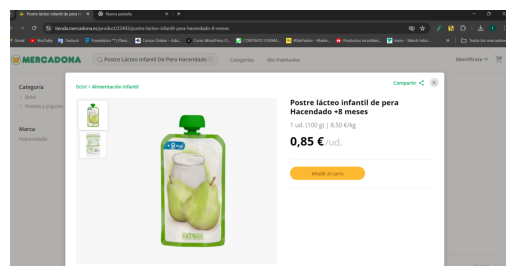

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Cargamos la imagen

img = mpimg.imread('/content/Producto_Mercadona.png')

#Mostramos la imagen

plt.imshow(img)
plt.axis('off')  # Quitamos los ejes
plt.show()

In [ ]:
#Incluimos la URL de la página de venta del producto para facilitar la verificación

#https://tienda.mercadona.es/product/22443/postre-lacteo-infantil-pera-hacendado-8-meses

2.¿Cómo me posiciono según precio y variedad de productos en las principales categorías con respecto a todas las marcas?

In [72]:
supermercado_df['Precio_Estatus'].unique()

array(['Outlier', 'Inlier'], dtype=object)

In [73]:
supermercado_df['Categoria'].unique()

array(['Aceite, especias y salsas', 'Aperitivos', 'Cuidado del cabello',
       'Fitoterapia y parafarmacia', 'Agua y refrescos', 'Zumos',
       'Cacao, café e infusiones', 'Cuidado facial y corporal',
       'Charcutería y quesos', 'Marisco y pescado', 'Bodega',
       'Arroz, legumbres y pasta', 'Conservas, caldos y cremas',
       'Cereales y galletas', 'Bebé', 'Mascotas', 'Limpieza y hogar',
       'Carne', 'Congelados', 'Azúcar, caramelos y chocolate',
       'Maquillaje', 'Papelería', 'Postres y yogures',
       'Panadería y pastelería', 'Pizzas y platos preparados',
       'Fruta y verdura', 'Huevos, leche y mantequilla'], dtype=object)

In [78]:
supermercado_df.info()
supermercado_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21472 entries, 0 to 21471
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nombre          21472 non-null  object 
 1   Precio          21472 non-null  float64
 2   Precio_unidad   21470 non-null  float64
 3   Categoria       21472 non-null  object 
 4   Subcategoria    21472 non-null  object 
 5   Marca           21472 non-null  object 
 6   Tipo de Marca   21472 non-null  object 
 7   Unidad Medida   21472 non-null  object 
 8   Supermercado    21472 non-null  object 
 9   Precio_Estatus  21472 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


Precio  Precio_unidad
count  21472.000000   21470.000000
mean       3.987630      11.310992
std        5.509496      19.829915
min        0.170000       0.010000
25%        1.790000       2.490000
50%        2.890000       6.450000
75%        4.690000      13.330000
max      481.500000    1419.100000

PREGUNTA 2

In [79]:
mercadona_df = supermercado_df[(supermercado_df['Supermercado'].str.contains('Mercadona', case=False, na=False)) & (supermercado_df['Precio_Estatus'] == 'Inlier')]
carrefour_df = supermercado_df[(supermercado_df['Supermercado'].str.contains('Carrefour', case=False, na=False)) & (supermercado_df['Precio_Estatus'] == 'Inlier')]


In [80]:
mercadona_df['Categoria'].unique()

array(['Aceite, especias y salsas', 'Aperitivos', 'Cuidado del cabello',
       'Agua y refrescos', 'Charcutería y quesos', 'Bebé', 'Mascotas',
       'Bodega', 'Carne', 'Arroz, legumbres y pasta', 'Congelados',
       'Conservas, caldos y cremas', 'Azúcar, caramelos y chocolate',
       'Marisco y pescado', 'Maquillaje', 'Postres y yogures',
       'Panadería y pastelería', 'Cacao, café e infusiones',
       'Cuidado facial y corporal', 'Cereales y galletas',
       'Limpieza y hogar', 'Pizzas y platos preparados',
       'Fitoterapia y parafarmacia', 'Fruta y verdura', 'Zumos',
       'Huevos, leche y mantequilla'], dtype=object)

In [81]:
carrefour_df['Categoria'].unique()

array(['Zumos', 'Agua y refrescos', 'Cacao, café e infusiones',
       'Cuidado facial y corporal', 'Bodega',
       'Fitoterapia y parafarmacia', 'Aceite, especias y salsas',
       'Arroz, legumbres y pasta', 'Conservas, caldos y cremas',
       'Cereales y galletas', 'Bebé', 'Limpieza y hogar', 'Aperitivos',
       'Papelería', 'Cuidado del cabello', 'Carne',
       'Charcutería y quesos', 'Mascotas',
       'Azúcar, caramelos y chocolate', 'Fruta y verdura', 'Congelados',
       'Postres y yogures', 'Huevos, leche y mantequilla',
       'Marisco y pescado', 'Panadería y pastelería',
       'Pizzas y platos preparados'], dtype=object)

Obtenemos el precio medio del supermercado de mercadona como de carrefour por seperada, pero a posteriori hacer una comparación

In [82]:
mercadona_precio_medio = mercadona_df.groupby('Categoria')['Precio'].mean().reset_index()
mercadona_precio_medio.columns = ['Categoria', 'Precio_Medio_Mercadona']

carrefour_precio_medio = carrefour_df.groupby('Categoria')['Precio'].mean().reset_index()
carrefour_precio_medio.columns = ['Categoria', 'Precio_Medio_Carrefour']


Unimos ambos supermercados en un mismo dataframe para realizar un gráfico

In [83]:
precio_medio_comparacion = pd.merge(mercadona_precio_medio, carrefour_precio_medio, on='Categoria', how='outer')
precio_medio_comparacion


Categoria  Precio_Medio_Mercadona  \
0       Aceite, especias y salsas                1.898138   
1                Agua y refrescos                2.240262   
2                      Aperitivos                1.793063   
3        Arroz, legumbres y pasta                1.485876   
4   Azúcar, caramelos y chocolate                1.920123   
5                            Bebé                4.797059   
6                          Bodega                4.310325   
7        Cacao, café e infusiones                3.011040   
8                           Carne                4.397182   
9             Cereales y galletas                1.832368   
10           Charcutería y quesos                3.104918   
11                     Congelados                5.473898   
12     Conservas, caldos y cremas                2.007059   
13            Cuidado del cabello                3.964368   
14      Cuidado facial y corporal                4.216874   
15     Fitoterapia y parafarmacia                3.270303   
16                Fruta y verdura                1.934268   
17    Huevos, leche y mantequilla                3.321925   
18               Limpieza y hogar                2.416218   
19                     Maquillaje                4.757466   
20              Marisco y pescado                5.380424   
21                       Mascotas                3.339419   
22         Panadería y pastelería                2.346993   
23     Pizzas y platos preparados                3.314651   
24              Postres y yogures                2.031646   
25                          Zumos                1.470577   
26                      Papelería                     NaN   

    Precio_Medio_Carrefour  
0                 4.065499  
1                 1.932857  
2                 2.652393  
3                 2.366443  
4                 3.447179  
5                 6.125376  
6                 7.254888  
7                 6.304545  
8                 5.403412  
9                 3.899861  
10                4.286158  
11                3.261647  
12                3.561514  
13                6.099472  
14                6.170824  
15                8.470183  
16                2.679459  
17                2.445675  
18                4.616442  
19                     NaN  
20                7.023808  
21                4.944781  
22                3.035171  
23                4.108564  
24                2.809095  
25                2.314570  
26                4.480588

Obtenemos la diferencia entre la media de los productos por categoría

In [84]:
precio_medio_comparacion['Diferencia_Precio'] = precio_medio_comparacion['Precio_Medio_Mercadona'] - precio_medio_comparacion['Precio_Medio_Carrefour']

In [85]:
precio_medio_comparacion

Categoria  Precio_Medio_Mercadona  \
0       Aceite, especias y salsas                1.898138   
1                Agua y refrescos                2.240262   
2                      Aperitivos                1.793063   
3        Arroz, legumbres y pasta                1.485876   
4   Azúcar, caramelos y chocolate                1.920123   
5                            Bebé                4.797059   
6                          Bodega                4.310325   
7        Cacao, café e infusiones                3.011040   
8                           Carne                4.397182   
9             Cereales y galletas                1.832368   
10           Charcutería y quesos                3.104918   
11                     Congelados                5.473898   
12     Conservas, caldos y cremas                2.007059   
13            Cuidado del cabello                3.964368   
14      Cuidado facial y corporal                4.216874   
15     Fitoterapia y parafarmacia                3.270303   
16                Fruta y verdura                1.934268   
17    Huevos, leche y mantequilla                3.321925   
18               Limpieza y hogar                2.416218   
19                     Maquillaje                4.757466   
20              Marisco y pescado                5.380424   
21                       Mascotas                3.339419   
22         Panadería y pastelería                2.346993   
23     Pizzas y platos preparados                3.314651   
24              Postres y yogures                2.031646   
25                          Zumos                1.470577   
26                      Papelería                     NaN   

    Precio_Medio_Carrefour  Diferencia_Precio  
0                 4.065499          -2.167361  
1                 1.932857           0.307405  
2                 2.652393          -0.859331  
3                 2.366443          -0.880567  
4                 3.447179          -1.527056  
5                 6.125376          -1.328317  
6                 7.254888          -2.944562  
7                 6.304545          -3.293505  
8                 5.403412          -1.006230  
9                 3.899861          -2.067493  
10                4.286158          -1.181240  
11                3.261647           2.212251  
12                3.561514          -1.554455  
13                6.099472          -2.135104  
14                6.170824          -1.953951  
15                8.470183          -5.199880  
16                2.679459          -0.745191  
17                2.445675           0.876251  
18                4.616442          -2.200224  
19                     NaN                NaN  
20                7.023808          -1.643383  
21                4.944781          -1.605362  
22                3.035171          -0.688178  
23                4.108564          -0.793913  
24                2.809095          -0.777450  
25                2.314570          -0.843993  
26                4.480588                NaN

In [86]:
categories = precio_medio_comparacion['Categoria']
precio_mercadona = precio_medio_comparacion['Precio_Medio_Mercadona']
precio_carrefour = precio_medio_comparacion['Precio_Medio_Carrefour']

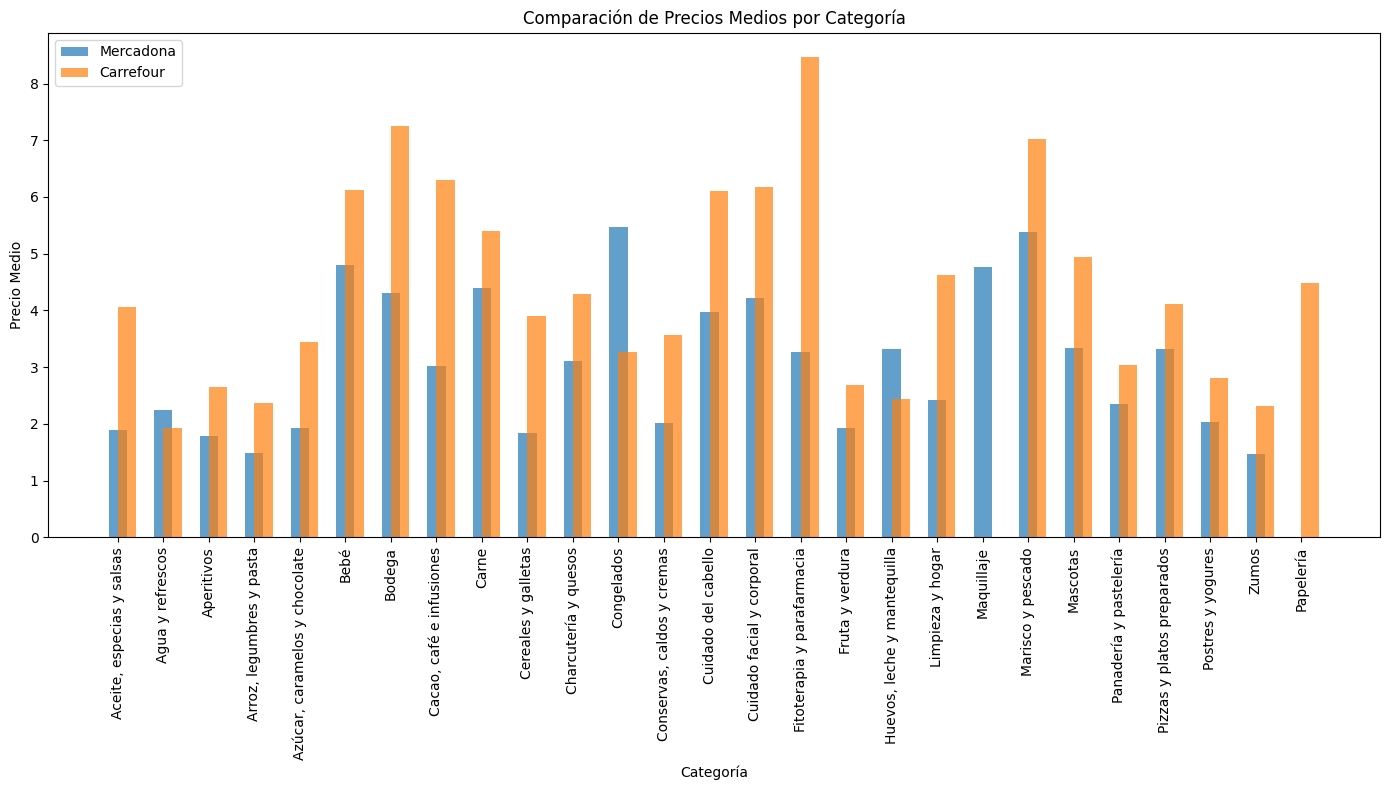

In [87]:
x = range(len(categories))

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x, precio_mercadona, width=0.4, label='Mercadona', align='center', alpha=0.7)
ax.bar(x, precio_carrefour, width=0.4, label='Carrefour', align='edge', alpha=0.7)

ax.set_xlabel('Categoría')
ax.set_ylabel('Precio Medio')
ax.set_title('Comparación de Precios Medios por Categoría')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

Gráfico que muestra las 5 máximas diferencias de precio medio por categoría

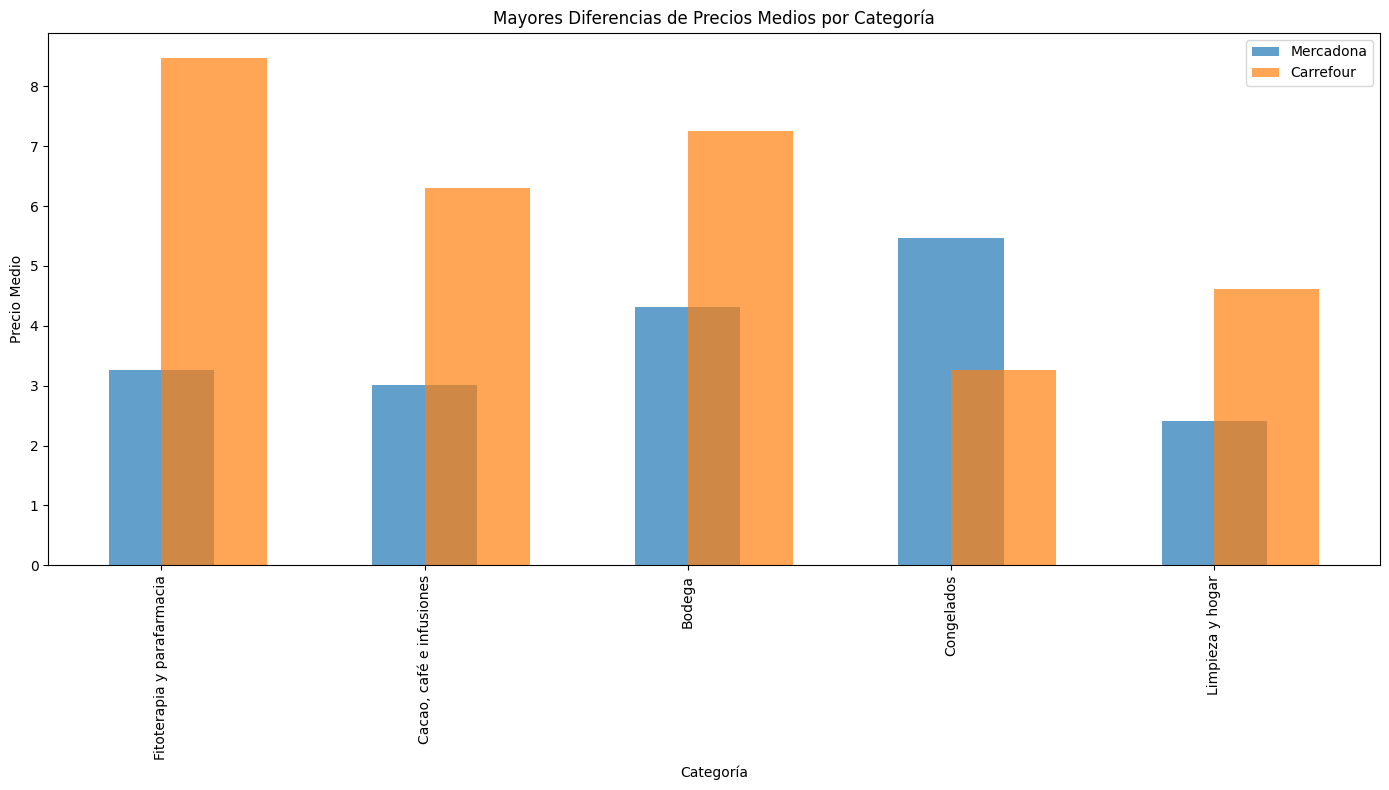

In [88]:
precio_medio_comparacion_sorted = precio_medio_comparacion.sort_values(by='Diferencia_Precio', key=abs, ascending=False).reset_index(drop=True)
diferencias_mayores = precio_medio_comparacion_sorted.head(5)

categories = diferencias_mayores['Categoria']
precio_mercadona = diferencias_mayores['Precio_Medio_Mercadona']
precio_carrefour = diferencias_mayores['Precio_Medio_Carrefour']

x = range(len(categories))

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x, precio_mercadona, width=0.4, label='Mercadona', align='center', alpha=0.7)
ax.bar(x, precio_carrefour, width=0.4, label='Carrefour', align='edge', alpha=0.7)

ax.set_xlabel('Categoría')
ax.set_ylabel('Precio Medio')
ax.set_title('Mayores Diferencias de Precios Medios por Categoría')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

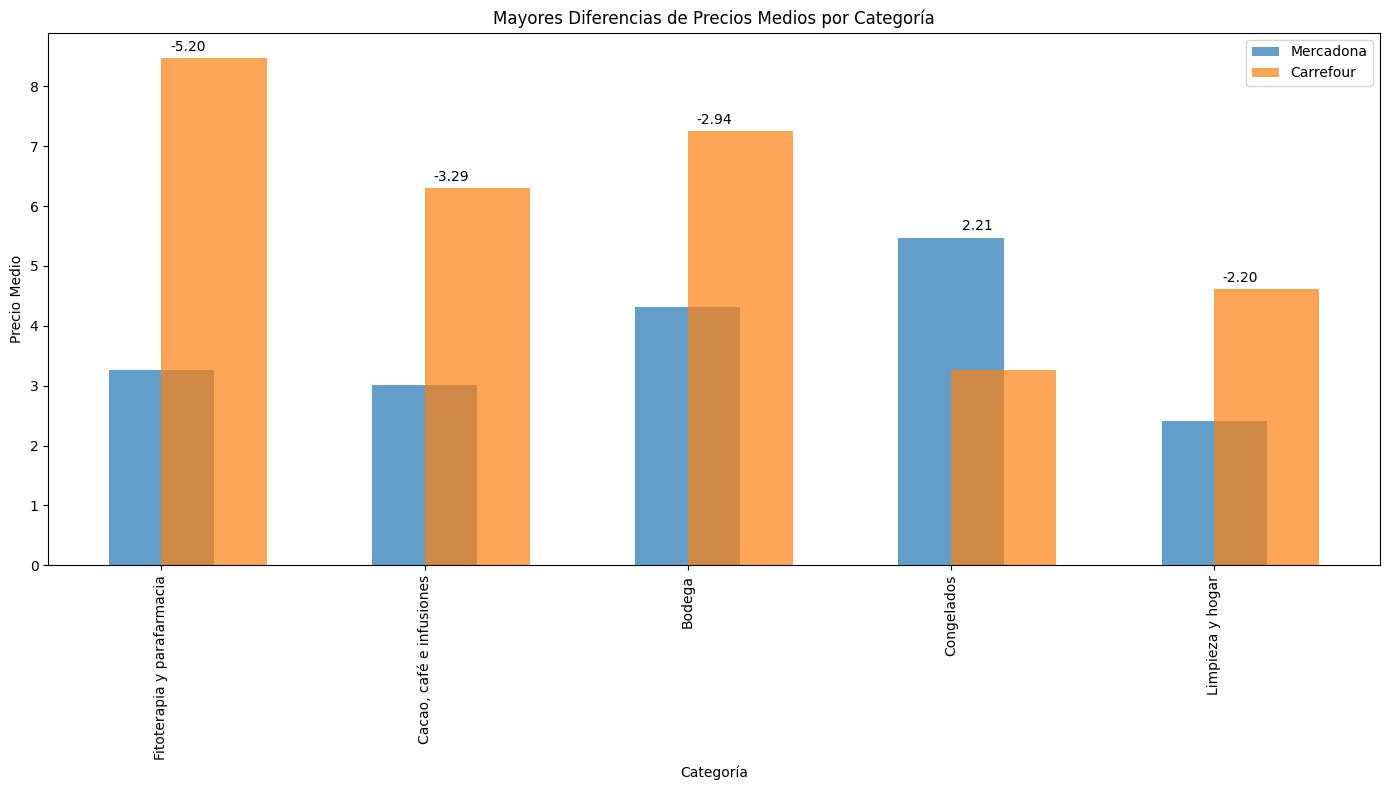

In [89]:
categories = diferencias_mayores['Categoria']
precio_mercadona = diferencias_mayores['Precio_Medio_Mercadona']
precio_carrefour = diferencias_mayores['Precio_Medio_Carrefour']
diferencias_precio = diferencias_mayores['Diferencia_Precio']

x = range(len(categories))

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x, precio_mercadona, width=0.4, label='Mercadona', align='center', alpha=0.7)
bars2 = ax.bar(x, precio_carrefour, width=0.4, label='Carrefour', align='edge', alpha=0.7)

for bar1, bar2, diff in zip(bars1, bars2, diferencias_precio):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{diff:.2f}',
                xy=((bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2, max(height1, height2)),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Categoría')
ax.set_ylabel('Precio Medio')
ax.set_title('Mayores Diferencias de Precios Medios por Categoría')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

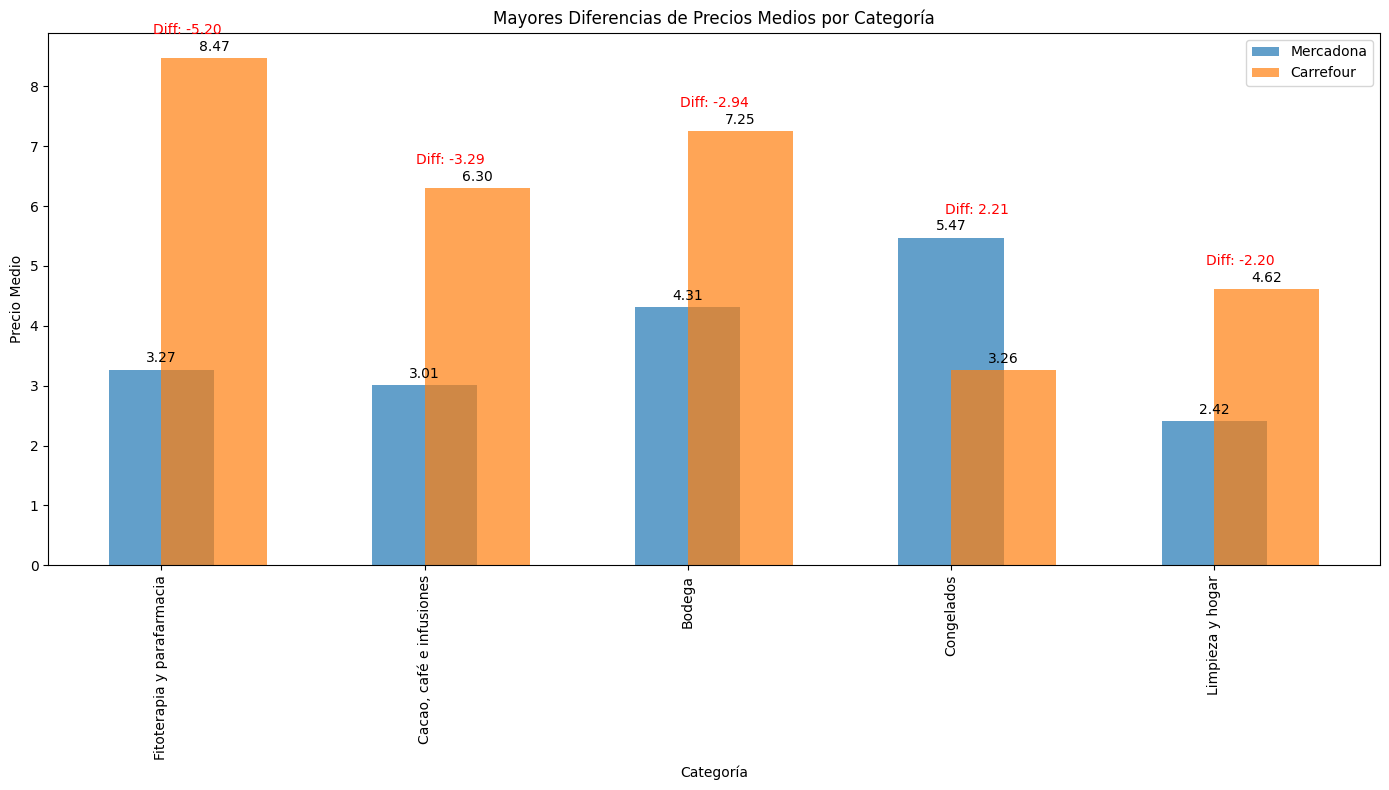

In [90]:
fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x, precio_mercadona, width=0.4, label='Mercadona', align='center', alpha=0.7)
bars2 = ax.bar(x, precio_carrefour, width=0.4, label='Carrefour', align='edge', alpha=0.7)

for bar1, bar2, diff in zip(bars1, bars2, diferencias_precio):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}',
                xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    ax.annotate(f'{height2:.2f}',
                xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    ax.annotate(f'Diff: {diff:.2f}',
                xy=((bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2, max(height1, height2)),
                xytext=(0, 15),
                textcoords="offset points",
                ha='center', va='bottom', color='red')

ax.set_xlabel('Categoría')
ax.set_ylabel('Precio Medio')
ax.set_title('Mayores Diferencias de Precios Medios por Categoría')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

Se mejora el gráfico añadiendole el precio medio por categoria en cada uno de los supermercados y además la diferencia escrita en rojo.
Se puede observar que el precio medio es superior en carrefour, excepto en la categoria de congelados, aunque esto hay que estudiar con mayor detenimiento

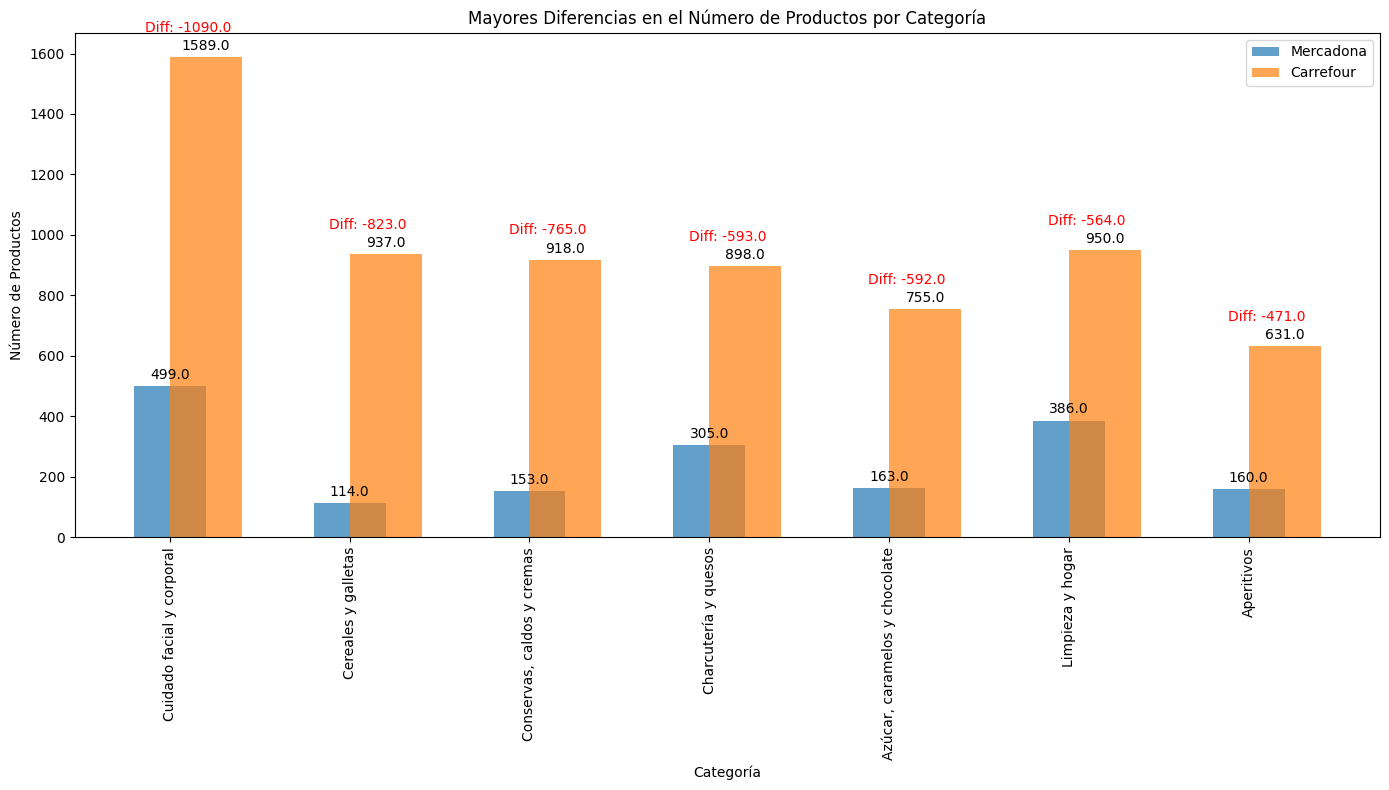

In [91]:
mercadona_count = mercadona_df.groupby('Categoria').size().reset_index(name='Count_Mercadona')
carrefour_count = carrefour_df.groupby('Categoria').size().reset_index(name='Count_Carrefour')

producto_count_comparacion = pd.merge(mercadona_count, carrefour_count, on='Categoria', how='outer')

producto_count_comparacion['Diferencia_Productos'] = producto_count_comparacion['Count_Mercadona'] - producto_count_comparacion['Count_Carrefour']

producto_count_comparacion_sorted = producto_count_comparacion.sort_values(by='Diferencia_Productos', key=abs, ascending=False).reset_index(drop=True)

diferencias_productos_mayores = producto_count_comparacion_sorted.head(7)

categories = diferencias_productos_mayores['Categoria']
count_mercadona = diferencias_productos_mayores['Count_Mercadona']
count_carrefour = diferencias_productos_mayores['Count_Carrefour']
diferencias_productos = diferencias_productos_mayores['Diferencia_Productos']

x = range(len(categories))

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x, count_mercadona, width=0.4, label='Mercadona', align='center', alpha=0.7)
bars2 = ax.bar(x, count_carrefour, width=0.4, label='Carrefour', align='edge', alpha=0.7)

for bar1, bar2, diff in zip(bars1, bars2, diferencias_productos):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1}',
                xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    ax.annotate(f'{height2}',
                xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    ax.annotate(f'Diff: {diff}',
                xy=((bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2, max(height1, height2)),
                xytext=(0, 16),
                textcoords="offset points",
                ha='center', va='bottom', color='red')

ax.set_xlabel('Categoría')
ax.set_ylabel('Número de Productos')
ax.set_title('Mayores Diferencias en el Número de Productos por Categoría')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

Como se puede observar, carrefour tiene una amplia gama de productos superior a Mercadona. Es por eso que puede que tengan productos más caros. Se pondrá el foco en los productos con mayor diferencia y se realizará un boxplot para ver si es verdad.

<ipython-input-92-4a2d7a4a2eb8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)
<ipython-input-92-4a2d7a4a2eb8>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)


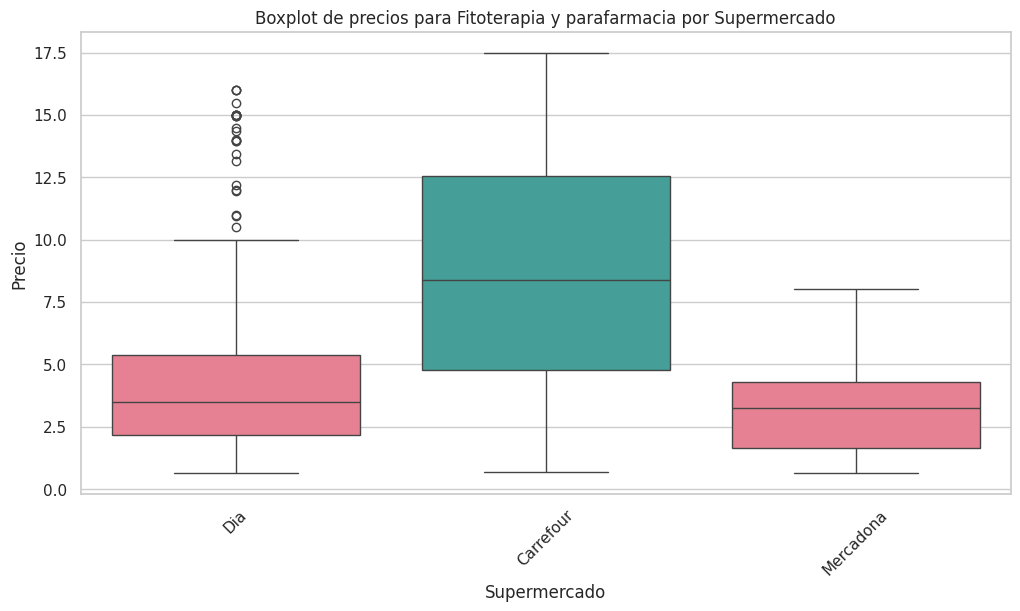

<ipython-input-92-4a2d7a4a2eb8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)
<ipython-input-92-4a2d7a4a2eb8>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)


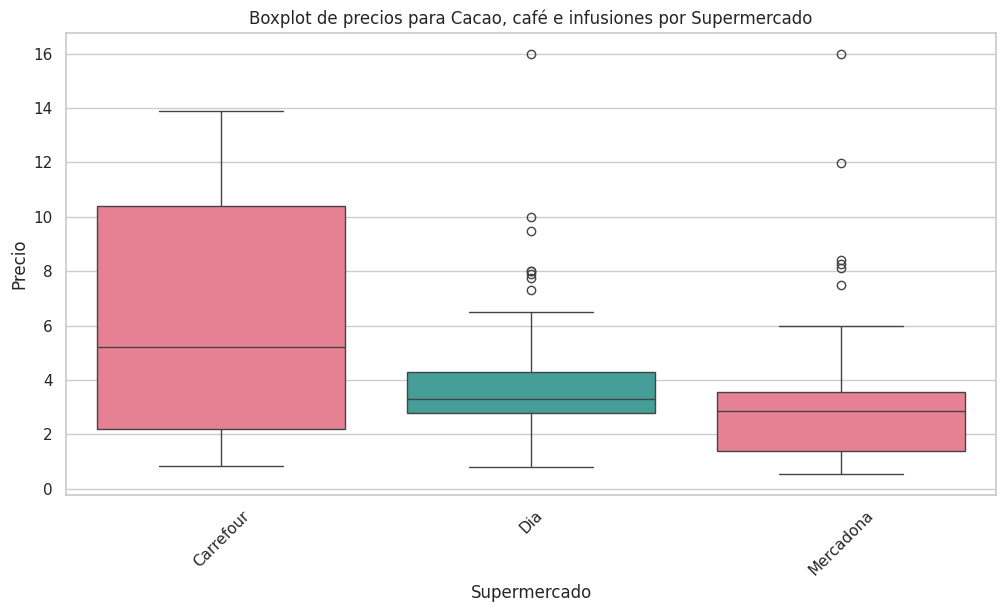

<ipython-input-92-4a2d7a4a2eb8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)
<ipython-input-92-4a2d7a4a2eb8>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)


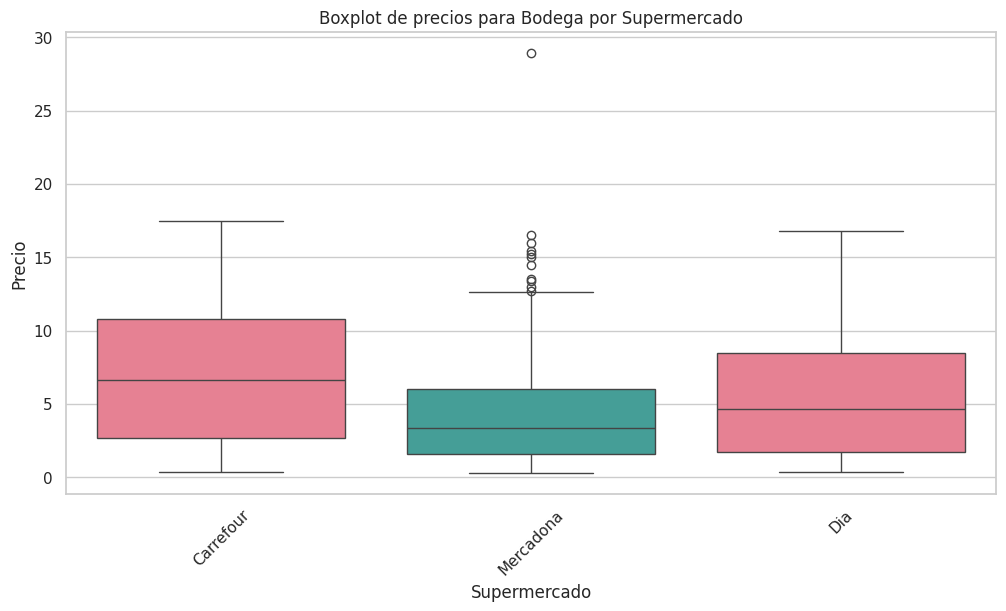

<ipython-input-92-4a2d7a4a2eb8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)
<ipython-input-92-4a2d7a4a2eb8>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)


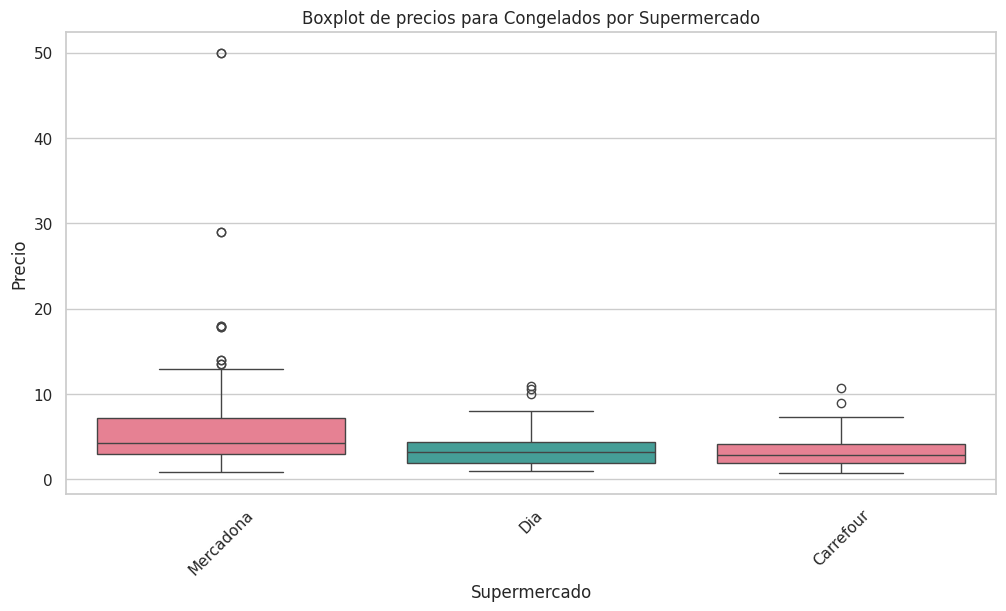

<ipython-input-92-4a2d7a4a2eb8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)
<ipython-input-92-4a2d7a4a2eb8>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)


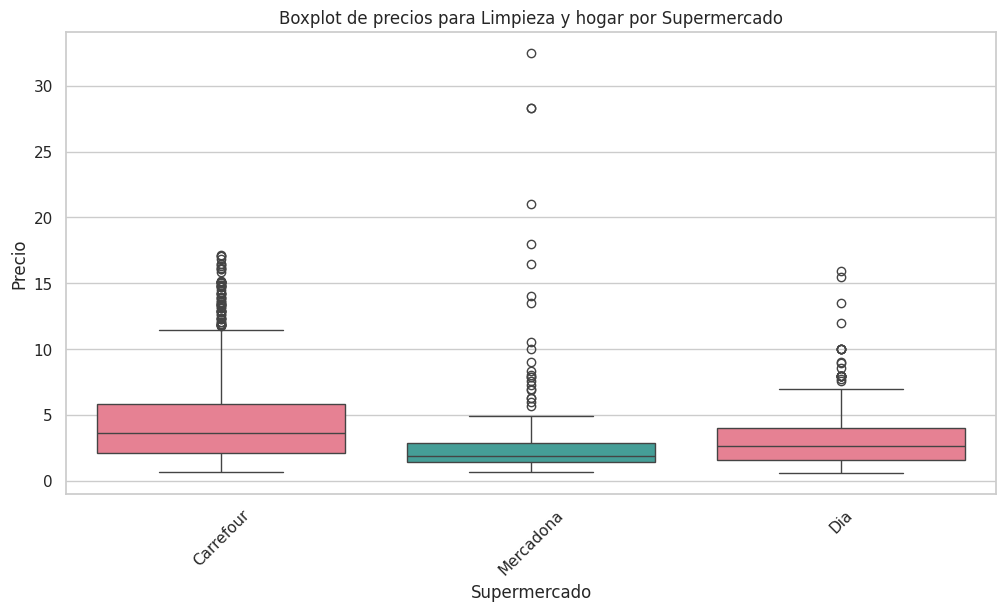

In [92]:
categories = ['Fitoterapia y parafarmacia', 'Cacao, café e infusiones', 'Bodega', 'Congelados', 'Limpieza y hogar']
filtered_df = supermercado_df[supermercado_df['Categoria'].isin(categories)]

sns.set(style="whitegrid")
palette = sns.color_palette("husl", 2)

for category in categories:
    plt.figure(figsize=(12, 6))
    filtered_df_category = filtered_df[filtered_df['Categoria'] == category]
    sns.boxplot(x='Supermercado', y='Precio', data=filtered_df_category, palette=palette)
    plt.title(f'Boxplot de precios para {category} por Supermercado')
    plt.xlabel('Supermercado')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)
    plt.show()

El boxplot no es muy representativo en este caso, aunque se puede apreciar que la media de nuestro competidor Carrefour es más alta, pero tiene productos con una gran variedad de precios, por otra parte se observa que Mercadona es constante con precios bajos y destaca por tener outlayers que se salen de la media.

3.	¿Cómo nos encontramos posicionados según precio y variedad de productos en las principales categorías con respecto a todas las marcas?

In [93]:
df_supermercados.head()

Nombre  Precio  Precio_unidad  \
0  Aceite de oliva virgen extra Hacendado   28.80           9.60   
1        Aceite de oliva virgen Hacendado   26.30           8.77   
2         Aceite de oliva suave Hacendado   23.90           7.97   
3       Aceite de oliva intenso Hacendado   23.90           7.97   
4  Aceite de oliva virgen extra Hacendado    9.65           9.65   

                   Categoria           Subcategoria      Marca Tipo de Marca  \
0  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
1  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
2  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
3  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   
4  Aceite, especias y salsas  Aceite, Vinagre Y Sal  Hacendado        BLANCA   

  Unidad Medida Supermercado Precio_Estatus  
0         LITRO    Mercadona        Outlier  
1         LITRO    Mercadona        Outlier  
2         LITRO    Mercadona        Outlier  
3         LITRO    Mercadona        Outlier  
4         LITRO    Mercadona         Inlier

In [94]:
# Creamos un filtro para mostrar solamente los productos que vamos a tener en cuenta para el analisis.

Supermercados_sin_outliers=df_supermercados.loc[df_supermercados["Precio_Estatus"]=="Inlier"]

In [95]:
Supermercados_sin_outliers

Nombre  Precio  \
4                 Aceite de oliva virgen extra Hacendado    9.65   
5                       Aceite De Oliva Virgen Hacendado    8.95   
6      Aceite De Oliva Virgen Extra Hacendado Gran Se...    8.10   
7                         Aceite De Oliva 0,4º Hacendado    8.00   
8                           Aceite De Oliva 1º Hacendado    8.00   
...                                                  ...     ...   
21467              Danonino Sabor Fresa Y Plátano Danone    1.30   
21468  Postre Lácteo Infantil De Cereales Y Miel +12 ...    0.85   
21469  Postre Lácteo Infantil De Fresa Y Plátano Hace...    0.85   
21470  Postre Lácteo Infantil De Galleta Hacendado +8...    0.85   
21471  Postre Lácteo Infantil De Pera Hacendado +8 Meses    0.85   

       Precio_unidad                  Categoria                  Subcategoria  \
4               9.65  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
5               8.95  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
6              10.80  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
7               8.00  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
8               8.00  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
...              ...                        ...                           ...   
21467           4.33          Postres y yogures  Yogures Y Postres Infantiles   
21468           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21469           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21470           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21471           8.50          Postres y yogures  Yogures Y Postres Infantiles   

           Marca Tipo de Marca Unidad Medida Supermercado Precio_Estatus  
4      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
5      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
6      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
7      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
8      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
...          ...           ...           ...          ...            ...  
21467     Danone     COMERCIAL          KILO    Mercadona         Inlier  
21468  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21469  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21470  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21471  Hacendado        BLANCA          KILO    Mercadona         Inlier  

[21420 rows x 10 columns]

In [96]:
# A partir del filtro aplicado en el df_supermercados, utilizaremos este dataframe para crear otro que muestre el precio promedio y la cantidad de productos,
# categorizados por tipo de marcas, categorías y supermercados.

df_variedad_precio_cat = Supermercados_sin_outliers.groupby(['Supermercado', 'Categoria', 'Tipo de Marca']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Cantidad_Productos=('Nombre', 'count')
).round(2).reset_index()


In [97]:
# Mostrar el DataFrame agrupado
df_variedad_precio_cat

Supermercado                   Categoria Tipo de Marca  Precio_Promedio  \
0      Carrefour   Aceite, especias y salsas        BLANCA             2.81   
1      Carrefour   Aceite, especias y salsas     COMERCIAL             4.71   
2      Carrefour            Agua y refrescos        BLANCA             1.01   
3      Carrefour            Agua y refrescos     COMERCIAL             2.23   
4      Carrefour                  Aperitivos        BLANCA             2.58   
..           ...                         ...           ...              ...   
146    Mercadona  Pizzas y platos preparados     COMERCIAL             3.93   
147    Mercadona           Postres y yogures        BLANCA             1.94   
148    Mercadona           Postres y yogures     COMERCIAL             2.77   
149    Mercadona                       Zumos        BLANCA             1.42   
150    Mercadona                       Zumos     COMERCIAL             1.99   

     Cantidad_Productos  
0                   173  
1                   338  
2                    56  
3                   175  
4                   363  
..                  ...  
146                  13  
147                 210  
148                  27  
149                  47  
150                   5  

[151 rows x 5 columns]

In [98]:
# A continuación, mostraremos cómo crear el nuevo dataframe df_variedad_precio_cat y visualizaremos los resultados mediante un gráfico de líneas para presentar la información de manera más clara.

# Primero, importamos las bibliotecas necesarias y creamos el dataframe con las agregaciones requeridas. Luego, generaremos el gráfico de líneas.

import plotly.express as px

# Filtramos el DataFrame primero por marcas blancas y las categorias de Maquillaje y Papeleria ya que son dos categorias en las que solamente tienen productos un supermercado.
df_marcas_blancas = df_variedad_precio_cat[df_variedad_precio_cat["Tipo de Marca"] == "BLANCA"]
df_marcas_blancas1 = df_marcas_blancas[(df_marcas_blancas["Categoria"] !="Maquillaje") & (df_marcas_blancas["Categoria"] !="Papelería")]


# Creamos el gráfico de líneas para marcas blancas
fig_blancas = px.line(df_marcas_blancas1, x="Categoria", y="Precio_Promedio", color="Supermercado",
                      hover_data=["Cantidad_Productos"], markers=True)

# Personalizamos el gráfico de marcas blancas
fig_blancas.update_traces(hovertemplate="<b>%{x}</b><br>Precio Promedio: %{y}€<br>Cantidad Productos: %{customdata[0]}")
fig_blancas.update_layout(
    title="Precio Promedio por Categoría y Supermercado (Marcas Blancas)",
    xaxis_title="Categoría",
    yaxis_title="Precio Promedio (€)",
    legend_title="Supermercado",
    hovermode="closest"
)

# Filtramos también los productos con marcas comerciales
df_marcas_comerciales = df_variedad_precio_cat[df_variedad_precio_cat["Tipo de Marca"] == "COMERCIAL"]
df_marcas_comerciales1 = df_marcas_comerciales[(df_marcas_comerciales["Categoria"] !="Maquillaje") & (df_marcas_comerciales["Categoria"] !="Papelería")]


# Creamos el gráfico de líneas para marcas comerciales
fig_comerciales = px.line(df_marcas_comerciales1, x="Categoria", y="Precio_Promedio", color="Supermercado",
                        hover_data=["Cantidad_Productos"], markers=True)

# Personalizamos el gráfico de marcas comerciales
fig_comerciales.update_traces(hovertemplate="<b>%{x}</b><br>Precio Promedio: %{y}€<br>Cantidad Productos: %{customdata[0]}")
fig_comerciales.update_layout(
    title="Precio Promedio por Categoría y Supermercado (Marcas Comerciales)",
    xaxis_title="Categoría",
    yaxis_title="Precio Promedio (€)",
    legend_title="Supermercado",
    hovermode="closest"
)

# Mostramos los gráficos
fig_blancas.show()
fig_comerciales.show()

A la hora de analizar los precios medios de las **marcas blancas** de Mercadona revela una diversidad significativa en los precios por categorías. En general, Mercadona mantiene una paridad de precios con el supermercado DIA en una amplia gama de categorías. Además, las ofertas de Mercadona suelen ser más competitivas en términos de precios que las de Carrefour, con algunas excepciones notables. Estas excepciones incluyen las categorías de “Congelados”, “Huevo, leche y mantequilla”, “Cuidado del cabello” y “Mascotas”, donde Carrefour parece tener una ventaja en términos de precios.

En otro aspecto, Mercadona ostenta una posición sólida en lo que respecta a los precios en las categorías de “Azúcar, caramelos y chocolate” y “Fruta y verdura”.

En relación a las conclusiones extraídas sobre los precios medios de las **marcas comerciales** ofrecidas por Mercadona en cada categoría, observamos principalmente que sigue manteniendo los precios de sus ofertas por debajo de los de Carrefour, incluso consiguiendo esta en algunas categorias por debajo del precio medio de DIA. También podemos observar como en la comparativa entre ambas grásficas, Mercadona tiene algunas categorias con marcas comericales con precios medios por debajo de sus marcas blancas, como es el caso de categorias como: "Conservas, caldos y cremas", "Marisco y pescado" las cuales debido a la gran diferencia de cantidad de productos que tienen de marca blanca con respecto a la cantidad de productos que tienen de marca comercial hace que la media de los precios de las marcas blancas sea superior.

In [99]:
# Para tener más información acerca de la diferencia entre la variedad de productos de los supermercados,
# creamos un Dataframe con la variedad de productos por categoria y supermercado
df_supermercado_sin_outliers_ni_maq_pap = Supermercados_sin_outliers[(Supermercados_sin_outliers["Categoria"] != "Maquillaje") & (Supermercados_sin_outliers["Categoria"] != "Papeleria")]

df_variedad_prd_cat = df_supermercado_sin_outliers_ni_maq_pap.groupby(['Supermercado', 'Categoria']).agg(
    Cantidad_productos=('Nombre', 'count')
).unstack(fill_value=0).stack().reset_index()

# Calculamos el promedio de productos por categoría
df_total_categoria = df_variedad_prd_cat.groupby('Categoria')['Cantidad_productos'].sum().reset_index()
df_total_categoria.rename(columns={'Cantidad_productos': 'Total_productos_por_categoria'}, inplace=True)

# Unimos el DataFrame original con el DataFrame de promedios por categoría
df_variedad_prd_cat = pd.merge(df_variedad_prd_cat, df_total_categoria, on='Categoria')

# Calculamos la diferencia porcentual
df_variedad_prd_cat['Proporcion_porcentual'] = (((df_variedad_prd_cat['Cantidad_productos']) * 100)/df_variedad_prd_cat['Total_productos_por_categoria']).round(2)


In [100]:
df_variedad_prd_cat

Supermercado                  Categoria  Cantidad_productos  \
0     Carrefour  Aceite, especias y salsas                 511   
1           Dia  Aceite, especias y salsas                 134   
2     Mercadona  Aceite, especias y salsas                 145   
3     Carrefour           Agua y refrescos                 231   
4           Dia           Agua y refrescos                 223   
..          ...                        ...                 ...   
73          Dia          Postres y yogures                 187   
74    Mercadona          Postres y yogures                 237   
75    Carrefour                      Zumos                 151   
76          Dia                      Zumos                  19   
77    Mercadona                      Zumos                  52   

    Total_productos_por_categoria  Proporcion_porcentual  
0                             790                  64.68  
1                             790                  16.96  
2                             790                  18.35  
3                             645                  35.81  
4                             645                  34.57  
..                            ...                    ...  
73                           1076                  17.38  
74                           1076                  22.03  
75                            222                  68.02  
76                            222                   8.56  
77                            222                  23.42  

[78 rows x 5 columns]

In [101]:
# En base al Dataframe creado de variedad de productos, creamos una gráfica de columnas en las que tengan cada columna una etiqueta con el campo de Diferencia_porcentual

# Creamos el gráfico de barras
fig = px.bar(df_variedad_prd_cat, x="Categoria", y="Proporcion_porcentual", color="Supermercado",
             text="Proporcion_porcentual", barmode="relative", hover_data={"Cantidad_productos": True, "Proporcion_porcentual": True})

# Personalizamos el gráfico
fig.update_traces(texttemplate='%{text}%', textposition='inside', insidetextanchor='middle', textfont=dict(size=12))
fig.update_layout(
    title="Variedad de Productos por Categoría y Supermercado",
    xaxis_title="Categoría",
    yaxis_title="Proporcion_porcentual(%)",
    legend_title="Supermercado",
    width=1250,
    height=800
)

# Mostramos el gráfico
fig.show()

Observando el gráfico de barras, se puede ver a simple vista que Carrefour es el supermercado con la mayor variedad de productos y ofertas en las diferentes categorias de supermercado, lo que la hace la mejor posicionada en este aspecto. Mercadona se mantiene por detrás teniendo unicamente en la categoria de "Cacao, café e infusiones" una mayor variedad de productos.

Esto sugiere que Mercadona podría estar adoptando una estrategia de concentración en ciertas categorías clave, posiblemente basada en la demanda del consumidor, las tendencias del mercado o las fortalezas internas. Sin embargo, esta estrategia puede limitar la diversidad de la oferta de productos de Mercadona en comparación con Carrefour.


In [102]:
# Veamos ahora como se posiciona nuestro cliente en base al precio por categorias en el mercado:

df_precio_cat = Supermercados_sin_outliers.groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean')
).round(2).reset_index()
df_precio_cat

Supermercado                      Categoria  Precio_Promedio
0     Carrefour      Aceite, especias y salsas             4.07
1     Carrefour               Agua y refrescos             1.93
2     Carrefour                     Aperitivos             2.65
3     Carrefour       Arroz, legumbres y pasta             2.37
4     Carrefour  Azúcar, caramelos y chocolate             3.45
..          ...                            ...              ...
71    Mercadona                       Mascotas             3.34
72    Mercadona         Panadería y pastelería             2.35
73    Mercadona     Pizzas y platos preparados             3.31
74    Mercadona              Postres y yogures             2.03
75    Mercadona                          Zumos             1.47

[76 rows x 3 columns]

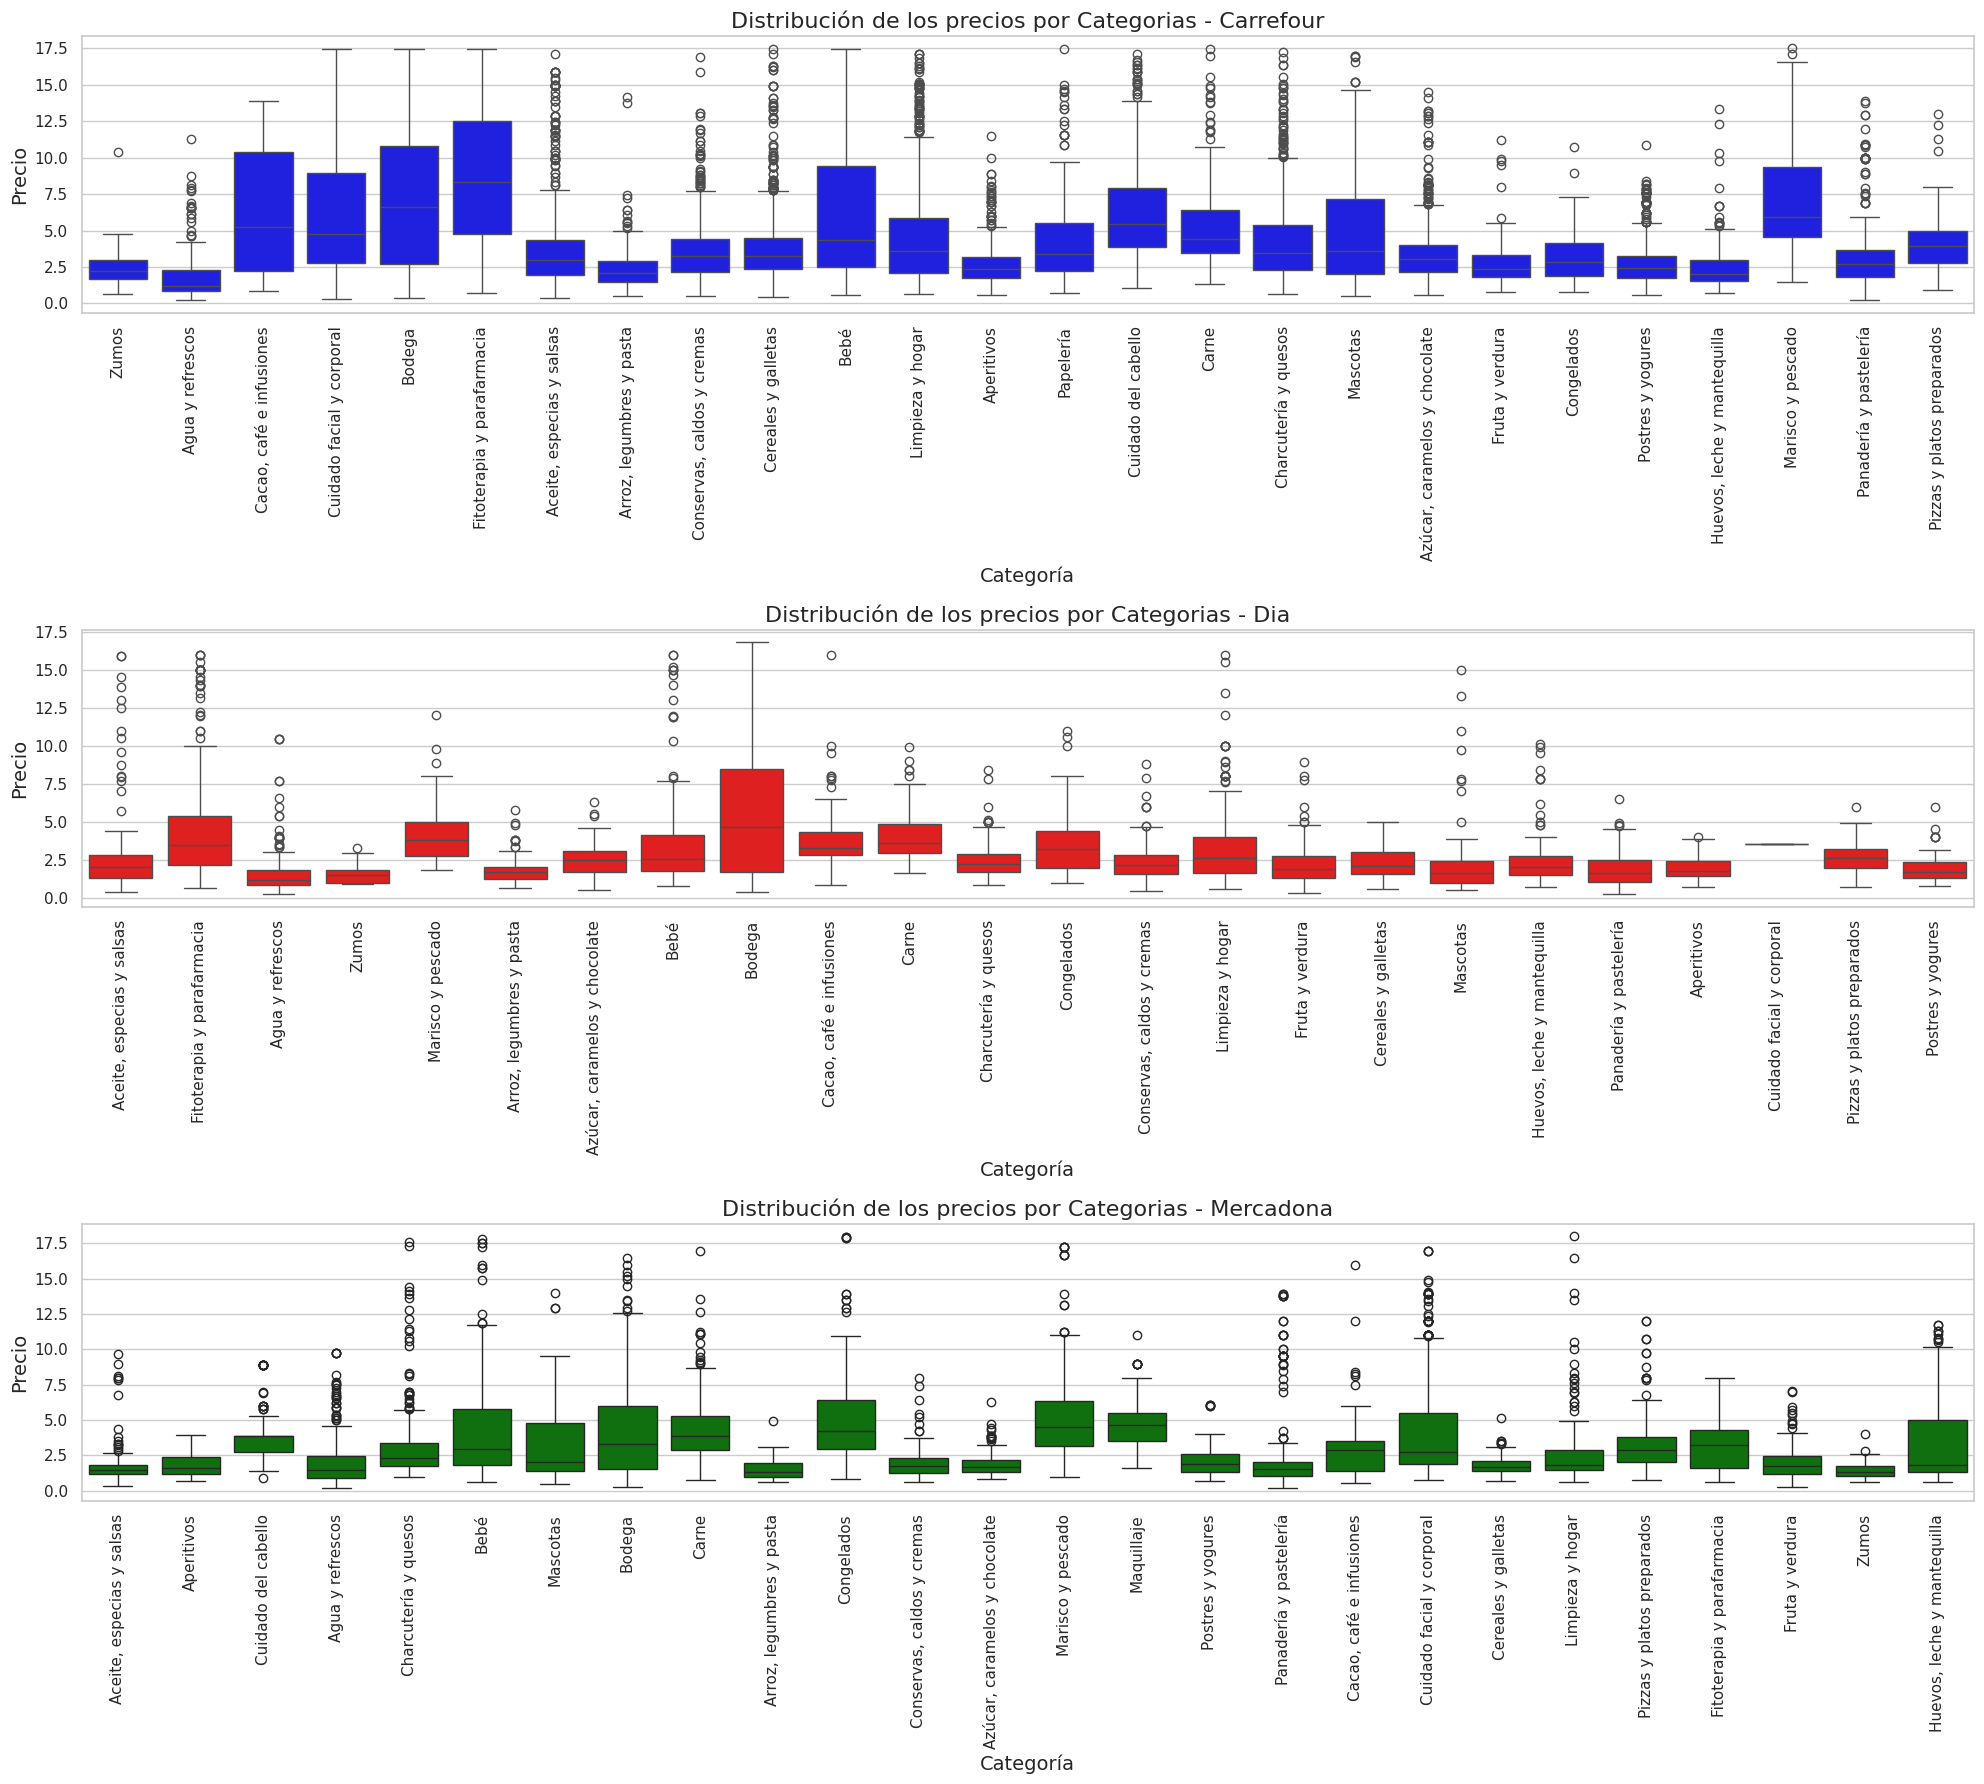

In [103]:
# Configurar la figura y los ejes con mayor ancho
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18))

# Crear el boxplot para Carrefour en azul
sns.boxplot(ax=axes[0], x='Categoria', y='Precio', data=Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == "Carrefour"], color='blue')
axes[0].set_title('Distribución de los precios por Categorias - Carrefour', fontsize=16)
axes[0].set_xlabel('Categoría', fontsize=14)
axes[0].set_ylabel('Precio', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# Crear el boxplot para Dia en rojo
sns.boxplot(ax=axes[1], x='Categoria', y='Precio', data=Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == "Dia"], color='red')
axes[1].set_title('Distribución de los precios por Categorias - Dia', fontsize=16)
axes[1].set_xlabel('Categoría', fontsize=14)
axes[1].set_ylabel('Precio', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Crear el boxplot para Mercadona en verde
sns.boxplot(ax=axes[2], x='Categoria', y='Precio', data=Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == "Mercadona"], color='green')
axes[2].set_title('Distribución de los precios por Categorias - Mercadona', fontsize=16)
axes[2].set_xlabel('Categoría', fontsize=14)
axes[2].set_ylabel('Precio', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Si observamos primero de manera individual cada supermercado, podemos apreciar que Carrefour parece tener una distribución de precios más amplia en la mayoría de las categorías, lo que indica una mayor variabilidad en sus precios, tambien debido a la gran cantidad de oferta que tiene por categoria, lo cual supone una gran diferencia con respecto al resto.
Dia, Por otro lado, muestra una distribución de precios más estrecha en comparación con Carrefour, lo que indica una menor variabilidad en sus precios, debido también a la menor cantidad de productos ofertados. Esto podría sugerir una estrategia de precios más uniforme en todas las categorías.
Mientras que Mercadona muestra una distribución de precios similar a la de Dia en las diferentes categorias, pero con una variabilidad ligeramente mayor en ciertas categorías.

En términos generales, Mercadona y Dia mantienen una mediana de precios en todas las categorías que se sitúa por debajo de los 5€. Esto indica una estrategia de precios altamente competitiva en comparación con Carrefour. Sin embargo, al comparar los precios medios de Mercadona con los de Dia, se observa una mayor cantidad de valores atípicos en las diferentes categorías de Mercadona. Esto sugiere que, aunque Mercadona ofrece una amplia gama de productos a precios competitivos, también puede tener líneas de productos premium que elevan los precios por encima de la media.

4.¿Cuál es el producto en el que somos más caros? ¿Y el más barato?

In [104]:
producto_mas_caro = supermercado_df.loc[supermercado_df['Precio'].idxmax()]
producto_mas_barato = supermercado_df.loc[supermercado_df['Precio'].idxmin()]
producto_mas_barato_precio_unidades = supermercado_df.loc[supermercado_df['Precio_unidad'].idxmin()]

In [105]:
print("El producto más caro es: ")
producto_mas_caro

El producto más caro es: 


Nombre            Jamón bellota ibérico 100% Covap
Precio                                       481.5
Precio_unidad                                 53.5
Categoria                     Charcutería y quesos
Subcategoria                         Jamón Serrano
Marca                                        Covap
Tipo de Marca                            COMERCIAL
Unidad Medida                                 KILO
Supermercado                             Mercadona
Precio_Estatus                             Outlier
Name: 13173, dtype: object

In [106]:
print("El producto más barato es: ")
producto_mas_barato

El producto más barato es: 


Nombre                          Pulguita
Precio                              0.17
Precio_unidad                       4.25
Categoria         Panadería y pastelería
Subcategoria                Pan De Horno
Marca                          Hacendado
Tipo de Marca                     BLANCA
Unidad Medida                       KILO
Supermercado                   Mercadona
Precio_Estatus                    Inlier
Name: 15136, dtype: object

In [107]:
print("El producto más barato por precio unidad es: ")
producto_mas_barato_precio_unidades

El producto más barato por precio unidad es: 


Nombre            Edulcorante Natreen Caja 400 Unidades
Precio                                             4.09
Precio_unidad                                      0.01
Categoria                 Azúcar, caramelos y chocolate
Subcategoria             Azúcar, Chocolates Y Caramelos
Marca                                           Natreen
Tipo de Marca                                 COMERCIAL
Unidad Medida                                    UNIDAD
Supermercado                                        Dia
Precio_Estatus                                   Inlier
Name: 3263, dtype: object

Para determinar el producto más caro por precio unidad tendremos que multiplicar la parte de las unidades representivas a la unidad de medida a una unidad de referencia global como es el KILO o LITRO, es decir, los productos que contengan 100 Gr se multiplicaran por 10.

In [108]:
supermercado_df['Unidad Medida'].unique()

array(['LITRO', 'KILO', 'UNIDAD', '100 GR', '100 ML', 'GRAMO', 'METRO',
       'LAVADO', 'DOCENA'], dtype=object)

In [109]:
supermercado_unidades_medida=supermercado_df.copy()

In [110]:
supermercado_unidades_medida.loc[supermercado_unidades_medida['Unidad Medida'].isin(['100 ML', '100 GR']), 'Precio_unidad'] *= 10

In [111]:
filtered_df = supermercado_unidades_medida[~supermercado_unidades_medida['Unidad Medida'].isin(['UNIDAD', 'LAVADO', 'METRO'])]

In [112]:
min_value = filtered_df['Precio_unidad'].min()
max_value = supermercado_df['Precio_unidad'].max()

min_row = filtered_df[filtered_df['Precio_unidad'] == min_value]
max_row = supermercado_df[supermercado_df['Precio_unidad'] == max_value]

In [113]:
max_row

Nombre  Precio  Precio_unidad  \
982  Azafrán de la Mancha en hebras De Nuestra Tier...   14.19         1419.1   

                     Categoria  Subcategoria      Marca Tipo de Marca  \
982  Aceite, especias y salsas  Alimentacion  Carrefour        BLANCA   

    Unidad Medida Supermercado Precio_Estatus  
982        100 GR    Carrefour        Outlier

De esta forma el prodcuto más caro, en este caso por KILO es el Azafrán

5.	Actualmente queremos destinar dinero para igualar los mejores precios de la competencia. ¿Cuál es la cantidad total a invertir?

In [114]:
# Calculamos el precio medio de los Precio_unidad por supermercado y por categoria
df_precio_Dia = Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == 'Dia'].groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Producto_precio_max=('Precio', 'max'),
    Producto_precio_min=('Precio', 'min'),
).round(2).reset_index()


df_precio_Carrefour = Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == 'Carrefour'].groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Producto_precio_max=('Precio', 'max'),
    Producto_precio_min=('Precio', 'min'),
).round(2).reset_index()


df_precio_Mercadona = Supermercados_sin_outliers[Supermercados_sin_outliers['Supermercado'] == 'Mercadona'].groupby(['Supermercado', 'Categoria']).agg(
    Precio_Promedio=('Precio', 'mean'),
    Producto_precio_max=('Precio', 'max'),
    Producto_precio_min=('Precio', 'min'),
).round(2).reset_index()


In [115]:
df_precio_Dia

Supermercado                      Categoria  Precio_Promedio  \
0           Dia      Aceite, especias y salsas             2.90   
1           Dia               Agua y refrescos             1.65   
2           Dia                     Aperitivos             1.88   
3           Dia       Arroz, legumbres y pasta             1.82   
4           Dia  Azúcar, caramelos y chocolate             2.50   
5           Dia                           Bebé             3.85   
6           Dia                         Bodega             5.65   
7           Dia       Cacao, café e infusiones             3.83   
8           Dia                          Carne             4.10   
9           Dia            Cereales y galletas             2.25   
10          Dia           Charcutería y quesos             2.39   
11          Dia                     Congelados             3.47   
12          Dia     Conservas, caldos y cremas             2.34   
13          Dia      Cuidado facial y corporal             3.55   
14          Dia     Fitoterapia y parafarmacia             4.21   
15          Dia                Fruta y verdura             2.19   
16          Dia    Huevos, leche y mantequilla             2.59   
17          Dia               Limpieza y hogar             3.20   
18          Dia              Marisco y pescado             4.28   
19          Dia                       Mascotas             2.62   
20          Dia         Panadería y pastelería             1.87   
21          Dia     Pizzas y platos preparados             2.62   
22          Dia              Postres y yogures             1.85   
23          Dia                          Zumos             1.53   

    Producto_precio_max  Producto_precio_min  
0                 15.89                 0.35  
1                 10.44                 0.22  
2                  3.99                 0.70  
3                  5.79                 0.65  
4                  6.29                 0.49  
5                 15.95                 0.75  
6                 16.79                 0.35  
7                 15.99                 0.81  
8                  9.89                 1.65  
9                  4.99                 0.59  
10                 8.40                 0.85  
11                10.95                 0.98  
12                 8.80                 0.44  
13                 3.55                 3.55  
14                15.99                 0.65  
15                 8.95                 0.29  
16                10.14                 0.70  
17                15.95                 0.60  
18                11.99                 1.79  
19                14.99                 0.50  
20                 6.49                 0.27  
21                 5.99                 0.69  
22                 5.99                 0.79  
23                 3.25                 0.89

In [116]:
df_precio_Carrefour

Supermercado                      Categoria  Precio_Promedio  \
0     Carrefour      Aceite, especias y salsas             4.07   
1     Carrefour               Agua y refrescos             1.93   
2     Carrefour                     Aperitivos             2.65   
3     Carrefour       Arroz, legumbres y pasta             2.37   
4     Carrefour  Azúcar, caramelos y chocolate             3.45   
5     Carrefour                           Bebé             6.13   
6     Carrefour                         Bodega             7.25   
7     Carrefour       Cacao, café e infusiones             6.30   
8     Carrefour                          Carne             5.40   
9     Carrefour            Cereales y galletas             3.90   
10    Carrefour           Charcutería y quesos             4.29   
11    Carrefour                     Congelados             3.26   
12    Carrefour     Conservas, caldos y cremas             3.56   
13    Carrefour            Cuidado del cabello             6.10   
14    Carrefour      Cuidado facial y corporal             6.17   
15    Carrefour     Fitoterapia y parafarmacia             8.47   
16    Carrefour                Fruta y verdura             2.68   
17    Carrefour    Huevos, leche y mantequilla             2.45   
18    Carrefour               Limpieza y hogar             4.62   
19    Carrefour              Marisco y pescado             7.02   
20    Carrefour                       Mascotas             4.94   
21    Carrefour         Panadería y pastelería             3.04   
22    Carrefour                      Papelería             4.48   
23    Carrefour     Pizzas y platos preparados             4.11   
24    Carrefour              Postres y yogures             2.81   
25    Carrefour                          Zumos             2.31   

    Producto_precio_max  Producto_precio_min  
0                 17.09                 0.35  
1                 11.28                 0.22  
2                 11.50                 0.60  
3                 14.19                 0.49  
4                 14.49                 0.59  
5                 17.49                 0.60  
6                 17.49                 0.35  
7                 13.89                 0.85  
8                 17.45                 1.30  
9                 17.45                 0.43  
10                17.25                 0.66  
11                10.75                 0.78  
12                16.89                 0.51  
13                17.09                 1.05  
14                17.49                 0.31  
15                17.49                 0.70  
16                11.21                 0.75  
17                13.35                 0.70  
18                17.15                 0.65  
19                17.50                 1.49  
20                16.95                 0.49  
21                13.90                 0.21  
22                17.49                 0.69  
23                13.00                 0.95  
24                10.89                 0.58  
25                10.39                 0.65

In [117]:
df_precio_Mercadona

Supermercado                      Categoria  Precio_Promedio  \
0     Mercadona      Aceite, especias y salsas             1.90   
1     Mercadona               Agua y refrescos             2.24   
2     Mercadona                     Aperitivos             1.79   
3     Mercadona       Arroz, legumbres y pasta             1.49   
4     Mercadona  Azúcar, caramelos y chocolate             1.92   
5     Mercadona                           Bebé             4.80   
6     Mercadona                         Bodega             4.31   
7     Mercadona       Cacao, café e infusiones             3.01   
8     Mercadona                          Carne             4.40   
9     Mercadona            Cereales y galletas             1.83   
10    Mercadona           Charcutería y quesos             3.10   
11    Mercadona                     Congelados             5.47   
12    Mercadona     Conservas, caldos y cremas             2.01   
13    Mercadona            Cuidado del cabello             3.96   
14    Mercadona      Cuidado facial y corporal             4.22   
15    Mercadona     Fitoterapia y parafarmacia             3.27   
16    Mercadona                Fruta y verdura             1.93   
17    Mercadona    Huevos, leche y mantequilla             3.32   
18    Mercadona               Limpieza y hogar             2.42   
19    Mercadona                     Maquillaje             4.76   
20    Mercadona              Marisco y pescado             5.38   
21    Mercadona                       Mascotas             3.34   
22    Mercadona         Panadería y pastelería             2.35   
23    Mercadona     Pizzas y platos preparados             3.31   
24    Mercadona              Postres y yogures             2.03   
25    Mercadona                          Zumos             1.47   

    Producto_precio_max  Producto_precio_min  
0                  9.65                 0.35  
1                  9.72                 0.22  
2                  3.95                 0.70  
3                  4.90                 0.65  
4                  6.30                 0.85  
5                 17.85                 0.60  
6                 16.50                 0.29  
7                 15.99                 0.55  
8                 17.00                 0.77  
9                  5.15                 0.70  
10                17.60                 0.95  
11                17.95                 0.85  
12                 8.00                 0.65  
13                 8.90                 0.90  
14                16.95                 0.75  
15                 8.00                 0.65  
16                 7.09                 0.25  
17                11.70                 0.65  
18                18.00                 0.65  
19                11.00                 1.60  
20                17.22                 0.99  
21                14.00                 0.45  
22                13.90                 0.17  
23                12.00                 0.75  
24                 6.10                 0.70  
25                 3.99                 0.65

In [118]:
# Unir los DataFrames por categoría
df_precio_comparacion = pd.merge(df_precio_Dia, df_precio_Carrefour, on='Categoria', suffixes=('_Dia', '_Carrefour'))
df_precio_comparacion = pd.merge(df_precio_comparacion, df_precio_Mercadona, on='Categoria', suffixes=('', '_Mercadona'))

# Renombrar la columna Precio_Promedio en df_precio_und_Mercadona a Precio_Promedio_Mercadona
df_precio_comparacion = df_precio_comparacion.rename(columns={'Precio_Promedio': 'Precio_Promedio_Mercadona'})

# Calcular las diferencias de precios medios
df_precio_comparacion['Diferencia_Dia_Carrefour'] = df_precio_comparacion['Precio_Promedio_Dia'] - df_precio_comparacion['Precio_Promedio_Carrefour']
df_precio_comparacion['Diferencia_Dia_Mercadona'] = df_precio_comparacion['Precio_Promedio_Dia'] - df_precio_comparacion['Precio_Promedio_Mercadona']
df_precio_comparacion['Diferencia_Carrefour_Mercadona'] = df_precio_comparacion['Precio_Promedio_Carrefour'] - df_precio_comparacion['Precio_Promedio_Mercadona']

# Seleccionar solo las columnas relevantes
df_precio_comparacion = df_precio_comparacion[['Categoria', 'Precio_Promedio_Dia', 'Precio_Promedio_Carrefour', 'Precio_Promedio_Mercadona',
                                                      'Diferencia_Dia_Carrefour', 'Diferencia_Dia_Mercadona', 'Diferencia_Carrefour_Mercadona']]

# Mostrar el DataFrame resultante
df_precio_comparacion

Categoria  Precio_Promedio_Dia  \
0       Aceite, especias y salsas                 2.90   
1                Agua y refrescos                 1.65   
2                      Aperitivos                 1.88   
3        Arroz, legumbres y pasta                 1.82   
4   Azúcar, caramelos y chocolate                 2.50   
5                            Bebé                 3.85   
6                          Bodega                 5.65   
7        Cacao, café e infusiones                 3.83   
8                           Carne                 4.10   
9             Cereales y galletas                 2.25   
10           Charcutería y quesos                 2.39   
11                     Congelados                 3.47   
12     Conservas, caldos y cremas                 2.34   
13      Cuidado facial y corporal                 3.55   
14     Fitoterapia y parafarmacia                 4.21   
15                Fruta y verdura                 2.19   
16    Huevos, leche y mantequilla                 2.59   
17               Limpieza y hogar                 3.20   
18              Marisco y pescado                 4.28   
19                       Mascotas                 2.62   
20         Panadería y pastelería                 1.87   
21     Pizzas y platos preparados                 2.62   
22              Postres y yogures                 1.85   
23                          Zumos                 1.53   

    Precio_Promedio_Carrefour  Precio_Promedio_Mercadona  \
0                        4.07                       1.90   
1                        1.93                       2.24   
2                        2.65                       1.79   
3                        2.37                       1.49   
4                        3.45                       1.92   
5                        6.13                       4.80   
6                        7.25                       4.31   
7                        6.30                       3.01   
8                        5.40                       4.40   
9                        3.90                       1.83   
10                       4.29                       3.10   
11                       3.26                       5.47   
12                       3.56                       2.01   
13                       6.17                       4.22   
14                       8.47                       3.27   
15                       2.68                       1.93   
16                       2.45                       3.32   
17                       4.62                       2.42   
18                       7.02                       5.38   
19                       4.94                       3.34   
20                       3.04                       2.35   
21                       4.11                       3.31   
22                       2.81                       2.03   
23                       2.31                       1.47   

    Diferencia_Dia_Carrefour  Diferencia_Dia_Mercadona  \
0                      -1.17                      1.00   
1                      -0.28                     -0.59   
2                      -0.77                      0.09   
3                      -0.55                      0.33   
4                      -0.95                      0.58   
5                      -2.28                     -0.95   
6                      -1.60                      1.34   
7                      -2.47                      0.82   
8                      -1.30                     -0.30   
9                      -1.65                      0.42   
10                     -1.90                     -0.71   
11                      0.21                     -2.00   
12                     -1.22                      0.33   
13                     -2.62                     -0.67   
14                     -4.26                      0.94   
15                     -0.49                      0.26   
16                      0.14                     -0.73   
17                     -1.42

In [124]:
import plotly.express as px

# Creamos un nuevo DataFrame con las columnas necesarias para el gráfico
df_grafico_dif_precio_und = df_precio_comparacion.melt(
    id_vars=['Categoria'],
    value_vars=['Diferencia_Dia_Mercadona', 'Diferencia_Carrefour_Mercadona'],
    var_name='Tipo_Diferencia',
    value_name='Diferencia_Precio'
)

# Creamos el gráfico de barras agrupadas
fig = px.bar(df_grafico_dif_precio_und, x='Categoria', y='Diferencia_Precio', color='Tipo_Diferencia',
             labels={'Categoria':'Categoría', 'Diferencia_Precio':'Diferencia de Precio'},
             title='Diferencia de Precio por Categoría (Mercadona vs. Dia y Carrefour)',
             hover_data=['Diferencia_Precio'], color_discrete_sequence=['red', 'blue'])

fig.update_layout(barmode='group')
fig.show()



En base al grafico de barras expuesto, sobore la diferencia de precios por categorías en diferentes supermercados, hemos identificado varias categorías clave en las que Mercadona muestra una diferencia de precio medio notable en comparación con sus competidores. Estas categorías incluyen Agua y refrescos, Bebé (solo en comparación con DIA), Carne (solo en comparación con DIA), Charcutería y quesos (solo en comparación con DIA), Congelados, Cuidado facial y corporal (solo en comparación con DIA), Huevos, leche y mantequilla, Marisco y pescado (solo en comparación con DIA), Mascotas (solo en comparación con DIA), Panadería y pastelería (solo en comparación con DIA), y Pizzas y platos preparados (solo en comparación con DIA). Estas observaciones sugieren que Mercadona no está posicionado en términos de precios en estas categorías. Para igualar los precios más competitivos de la competencia, sugerimos realizar un análisis adicional para determinar cuáles de estas categorías han generado más ventas para la competencia. Esto permitirá a Mercadona invertir de manera estratégica en estas categorías y potencialmente aumentar las ventas.

In [125]:
# Calcular las diferencias absolutas entre Mercadona y Dia
df_precio_comparacion['Diferencia_Mercadona_Dia'] = (df_precio_comparacion['Precio_Promedio_Mercadona'] - df_precio_comparacion['Precio_Promedio_Dia'])

# Calcular las diferencias absolutas entre Mercadona y Carrefour
df_precio_comparacion['Diferencia_Mercadona_Carrefour'] = (df_precio_comparacion['Precio_Promedio_Mercadona'] - df_precio_comparacion['Precio_Promedio_Carrefour'])

# Encontrar la mayor diferencia por categoría
df_precio_comparacion['Max_Diferencia_Mercadona'] = df_precio_comparacion[['Diferencia_Mercadona_Dia', 'Diferencia_Mercadona_Carrefour']].max(axis=1)

# Obtener las categorías con las mayores diferencias
categorias_max_diferencia = df_precio_comparacion.loc[df_precio_comparacion['Max_Diferencia_Mercadona'] == df_precio_comparacion['Max_Diferencia_Mercadona'].max()]

# Mostrar los resultados
print(f"Categoría con mayor diferencia de precio medio de Mercadona respecto a Dia y Carrefour:")
print(categorias_max_diferencia[['Categoria', 'Max_Diferencia_Mercadona']])

Categoría con mayor diferencia de precio medio de Mercadona respecto a Dia y Carrefour:
     Categoria  Max_Diferencia_Mercadona
11  Congelados                      2.21


In [126]:
df_max_ventas_cat = df_compras.groupby(['id_reference_supermarket', 'category']).agg(
    Cantidad_total_vendida=('category', 'count'),
    Precio_medio_categoria=('price', 'mean'),
).round(2).reset_index()

In [127]:
df_max_ventas_cat = df_max_ventas_cat.sort_values('Cantidad_total_vendida', ascending=False)

In [128]:
df_max_ventas_cat

id_reference_supermarket  \
10                       M3   
0                        M1   
1                        M1   
3                        M3   
16                       M3   
2                        M3   
15                       M3   
21                       M3   
22                       M3   
12                       M3   
4                        M3   
14                       M3   
26                       M3   
17                       M3   
25                       M3   
13                       M3   
8                        M3   
5                        M3   
7                        M3   
11                       M3   
6                        M3   
9                        M3   
23                       M3   
19                       M3   
20                       M3   
18                       M3   
24                       M3   

                                             category  Cantidad_total_vendida  \
10                desayuno_dulces_y_pan_cafe_capsulas                   21402   
0             agua_y_refrescos_isotonico_y_energetico                   15545   
1                   agua_y_refrescos_refresco_de_cola                   14089   
3   alimentacion_dieteticos_complementos_nutricion...                    8801   
16      desayuno_dulces_y_pan_infusiones_terapeuticas                    7097   
2   alimentacion_caldos_sopas_y_pures_caldo_concen...                    5568   
15                desayuno_dulces_y_pan_infusiones_te                    5080   
21    frescos_verdura_y_hortalizas_lechuga_y_endibias                    3039   
22               lacteos_y_huevos_horchatas_horchatas                    2543   
12        desayuno_dulces_y_pan_infusiones_manzanilla                    2409   
4             alimentacion_dieteticos_control_de_peso                    1994   
14  desayuno_dulces_y_pan_infusiones_otras_infusiones                    1902   
26  platos_preparados_nuestra_cocina_al_dia_nuestr...                    1066   
17              desayuno_dulces_y_pan_infusiones_tila                    1032   
25            lacteos_y_huevos_huevos_huevos_medianos                    1005   
13       desayuno_dulces_y_pan_infusiones_menta_poleo                     962   
8   desayuno_dulces_y_pan_bolleria_pastelitos_y_do...                     958   
5            alimentacion_dieteticos_para_deportistas                     956   
7   desayuno_dulces_y_pan_azucar_y_edulcorantes_ed...                     524   
11  desayuno_dulces_y_pan_caramelos_y_chicles_cara...                     521   
6   alimentacion_sal_especias_y_sazonadores_sazona...                     519   
9   desayuno_dulces_y_pan_bolleria_productos_regio...                     518   
23       lacteos_y_huevos_huevos_huevos_extra_grandes                     513   
19  frescos_verdura_y_hortalizas_ajo_cebolla_y_puerro                     510   
20  frescos_verdura_y_hortalizas_brocoli_coliflor_...                     493   
18      frescos_pescado_y_marisco_pescado_fresco_azul                     490   
24             lacteos_y_huevos_huevos_huevos_grandes                     464   

    Precio_medio_categoria  
10                    4.14  
0                     1.56  
1                     2.42  
3                     4.34  
16                    2.18  
2                     1.50  
15                    1.90  
21                    1.27  
22                    1.68  
12                    1.61  
4                     3.37  
14                    2.26  
26                    2.00  
17                    1.71  
25                    1.49  
13                    1.64  
8                     1.69  
5                     3.82  
7                     2.59  
11                    1.35  
6                     1.19  
9                     2.09  
23                    0.99  
19                    1.19  
20                    1.89  
18                    2.99  
24                    1.59

Nuestro análisis de precios indica que Mercadona, en comparación con sus competidores, muestra una diferencia notable en el precio medio de productos dentro de las subcategorías de lácteos y huevos, así como en la categoría de platos preparados (Nuestra Cocina al Día). Además, es importante destacar que estas categorías se encuentran entre las de mayor volumen de ventas en los competidores. Esta situación representa una oportunidad estratégica para Mercadona. Ajustar la política de precios en estas categorías específicas podría ser una medida efectiva para mejorar la competitividad de Mercadona en el mercado. Este ajuste, alineado con las tendencias del mercado y las preferencias de los consumidores, podría potencialmente conducir a un aumento en las ventas y a una mayor participación de mercado.

In [129]:
# Para poder calcular el total a invertir para igualar en ambas categorias al precio de la competencia, haremos lo siguiente:
# calculamos el total de ventas por subcategorias

df_lacteos_huevos = df_max_ventas_cat[df_max_ventas_cat['category'].str.contains('lacteos_y_huevos')]

In [130]:
df_lacteos_huevos

id_reference_supermarket                                      category  \
22                       M3          lacteos_y_huevos_horchatas_horchatas   
25                       M3       lacteos_y_huevos_huevos_huevos_medianos   
23                       M3  lacteos_y_huevos_huevos_huevos_extra_grandes   
24                       M3        lacteos_y_huevos_huevos_huevos_grandes   

    Cantidad_total_vendida  Precio_medio_categoria  
22                    2543                    1.68  
25                    1005                    1.49  
23                     513                    0.99  
24                     464                    1.59

In [131]:
df_lacteos_huevos_sum_ventas = pd.DataFrame({'Total Ventas': [df_lacteos_huevos['Cantidad_total_vendida'].sum()]})

In [132]:
print(df_lacteos_huevos_sum_ventas)

   Total Ventas
0          4525


In [133]:
# Y se multiplicaria por la diferencia de precio medio por categoria de entre mercadona y DIA para saber el total a invertir en esa categoria

total_invertir_cat_leche_huevos_mantequilla=4525*0.73

print(f'El total a invertir para la categoria de Leche, huevos y mantequilla es de: {total_invertir_cat_leche_huevos_mantequilla}€')

El total a invertir para la categoria de Leche, huevos y mantequilla es de: 3303.25€


In [134]:
# En cuanto a la categoria de Pizzas y platos preparados la cantidad vendida han sido de unos 1066 und

total_invertir_cat_Pizzas_y_platos_preparados=1066*0.69

print(f'El total a invertir para la categoria de Pizzas y platos preparados es de: {total_invertir_cat_Pizzas_y_platos_preparados}€')

El total a invertir para la categoria de Pizzas y platos preparados es de: 735.54€


In [148]:
# Sacamos el total por ambas categorias
suma_inversion_cat = total_invertir_cat_leche_huevos_mantequilla + total_invertir_cat_Pizzas_y_platos_preparados
print(f'El total a invertir: {suma_inversion_cat:,.2f}€')

El total a invertir: 4,038.79€


In [149]:
# Una vez tenemos el total por ambas categorias, dividimos por 3 ya que son los meses de los registros de ventas que contiene el dataframe de compras
# ya que queremos saber cuanto seria de inverión por mes

inv_div_meses=(suma_inversion_cat/3)
print(f'inversión por cada mes: {inv_div_meses:,.2f}€')

inversión por cada mes: 1,346.26€


In [150]:
# Cuando ya sabemos la inverión mensual lo multiplicamos por 11 para saber los que seria de inverión en un año
# Queremos ser conservadores y debido a la estacionalidad del sector lo multiplicamos por 11 y no por los 12 meses del año.

inv_año=(inv_div_meses*11)
print(f'Inversión en un año: {inv_año:,.2f}€')

Inversión en un año: 14,808.90€


In [147]:
# Finalmente, calculamos la inversión total anual estimada multiplicando la inversión anual por el número total de tiendas Mercadona distribuidas en toda España.
# Esto nos proporcionará una visión completa de la inversión anual global requerida.

inv_total_anual_mercadona=(inv_año*1637)  # Total de tiendas en España de Mercadona = 1637
print(f'Inversión total anual Mercadona: {inv_total_anual_mercadona:,.2f}€')

Inversión total anual Mercadona: 24,242,163.84€


Para concluir, nuestro cliente tendría que asignar aproximadamente 24.242.163,84€ anuales para poder equiparar los precios con sus competidores en las categorías donde estos últimos han registrado un mayor volumen de ventas. Esta inversión permitiría a nuestro cliente mantenerse competitivo en aquellos segmentos del mercado donde la competencia ha demostrado tener un mayor éxito en términos de volumen de ventas.

6. ¿Hay algún precio de nuestros productos que no siga la tendencia de la competencia? ¿Por qué podría ser?

In [ ]:
category_stats = supermercado_df.groupby('Categoria')['Precio'].agg(['mean', 'min', 'max', 'std']).reset_index()

print(category_stats)

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.bar(category_stats['Categoria'], category_stats['mean'], color='blue')
plt.title('Precio Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.bar(category_stats['Categoria'], category_stats['min'], color='green')
plt.title('Precio Mínimo por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio Mínimo (€)')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
plt.bar(category_stats['Categoria'], category_stats['max'], color='red')
plt.title('Precio Máximo por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio Máximo (€)')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
plt.bar(category_stats['Categoria'], category_stats['std'], color='purple')
plt.title('Desviación Estándar del Precio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Desviación Estándar (€)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Aquí tenemos cuatro gráficos pequeños que reflejan la media, precio máximo y mínimo y desviación estándar.
Con la media podemos ver que no destaca más o menos ninguna categoría, siq ue hay categoría que tienen una media mayor pero nada fuera de lo normal.
Por otro lado destaca la desviación estandar de charcutería y quesos que se hará un análisis más profundo, seguramente sea debido al Jamon de Bellota que era un precio máximo y totalmente diferente al resto

Con respecto al box plot,nos salian error que son outlayers debido a errores en el scrapeo que se han eliminado

Una vez eliminados esos errores se procede con el análisis correcto

Primero realizamos un boxplot general por si hubiese algun dato que sobresaliese de lo normal, donde se pueden observar tres categoría que no tienen sus respectivos supermercados

In [ ]:
df_inliers = supermercado_df[supermercado_df['Precio_Estatus'] != 'Outlier']

#Utilizando un estilo para el gráfico
sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))
ax = sns.boxplot(x='Categoria', y='Precio', hue='Supermercado', data=df_inliers, palette='Set3')
plt.title('Box Plot de Precio por Categoría (Inliers) y Supermercado', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Supermercado', fontsize=12)
plt.show()

En este caso, se realiza un estudio de los boxplot de las categorias, quedandonos con las categorias que tengan mayores diferencias entre supermercados

In [ ]:
boxplot_stats = df_inliers.groupby('Categoria')['Precio'].describe(percentiles=[.25, .5, .75])

boxplot_stats['IQR'] = boxplot_stats['75%'] - boxplot_stats['25%']
boxplot_stats['Lower Bound'] = boxplot_stats['25%'] - 1.5 * boxplot_stats['IQR']
boxplot_stats['Upper Bound'] = boxplot_stats['75%'] + 1.5 * boxplot_stats['IQR']

In [ ]:
boxplot_stats

In [ ]:
boxplot_stats_supermercado = df_inliers.groupby(['Supermercado', 'Categoria'])['Precio'].describe(percentiles=[.25, .5, .75])

boxplot_stats_supermercado['IQR'] = boxplot_stats_supermercado['75%'] - boxplot_stats_supermercado['25%']
boxplot_stats_supermercado['Lower Bound'] = boxplot_stats_supermercado['25%'] - 1.5 * boxplot_stats_supermercado['IQR']
boxplot_stats_supermercado['Upper Bound'] = boxplot_stats_supermercado['75%'] + 1.5 * boxplot_stats_supermercado['IQR']

In [ ]:
boxplot_stats_supermercado

In [ ]:
boxplot_stats_supermercado.to_csv('boxplot_stats.csv')

Una medida que podriamos utilizar seria la desviación estandar de los productos de dentro de las categorias y comprarla con Carrefour.

In [ ]:
file_path_new = '/content/boxplot_stats.csv'
data_new = pd.read_csv('/content/boxplot_stats.csv')



carrefour_data_new = data_new[data_new['Supermercado'] == 'Carrefour']
mercadona_data_new = data_new[data_new['Supermercado'] == 'Mercadona']

carrefour_std_new = carrefour_data_new[['Categoria', 'std']].sort_values(by='std', ascending=False)
mercadona_std_new = mercadona_data_new[['Categoria', 'std']].sort_values(by='std', ascending=False)

#CARREFOR DESVIACIÓN
plt.figure(figsize=(12, 8))
plt.barh(carrefour_std_new['Categoria'], carrefour_std_new['std'], color='blue', alpha=0.6, label='Carrefour')
plt.xlabel('Desviación Estándar')
plt.ylabel('Categoría')
plt.title('Desviación Estándar de Categorías - Carrefour')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

#CARREFOR DESVIACIÓN
plt.figure(figsize=(12, 8))
plt.barh(mercadona_std_new['Categoria'], mercadona_std_new['std'], color='green', alpha=0.6, label='Mercadona')
plt.xlabel('Desviación Estándar')
plt.ylabel('Categoría')
plt.title('Desviación Estándar de Categorías - Mercadona')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

<Figure size 3000x3000 with 0 Axes>

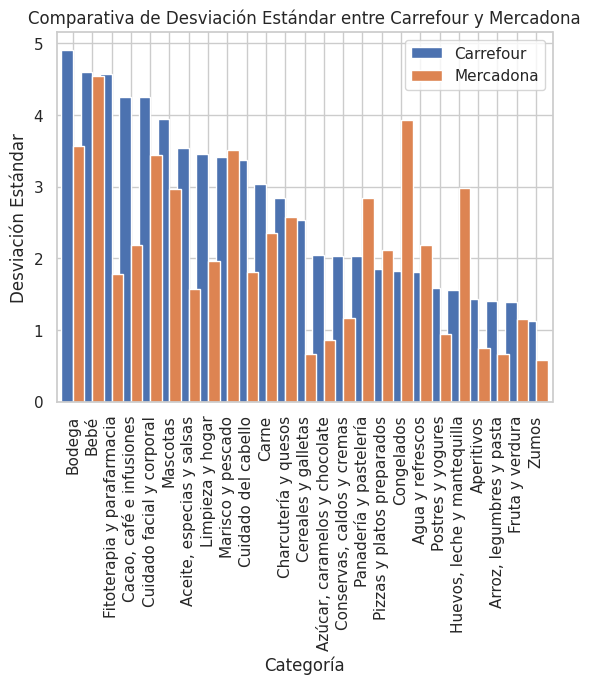

Las que tienen más de 1.5 de diferencia sen la desviación tçipica son: 


Categoria  std_Carrefour  std_Mercadona  Difference
2   Fitoterapia y parafarmacia       4.577513       1.788412    2.789101
3     Cacao, café e infusiones       4.250087       2.192684    2.057403
6    Aceite, especias y salsas       3.538791       1.568986    1.969805
9          Cuidado del cabello       3.374849       1.812152    1.562696
12         Cereales y galletas       2.539629       0.668269    1.871360
17                  Congelados       1.826479       3.933254   -2.106775

In [ ]:
#Hacemos un merge para unir los dos dataframes
camparacion = pd.merge(carrefour_std_new, mercadona_std_new, on='Categoria', suffixes=('_Carrefour', '_Mercadona'))

camparacion['Difference'] = camparacion['std_Carrefour'] - camparacion['std_Mercadona']


plt.figure(figsize=(30, 30))
camparacion.set_index('Categoria')[['std_Carrefour', 'std_Mercadona']].plot(kind='bar', width=1.2)
plt.xlabel('Categoría')
plt.ylabel('Desviación Estándar')
plt.title('Comparativa de Desviación Estándar entre Carrefour y Mercadona')
plt.xticks(rotation=90)
plt.legend(['Carrefour', 'Mercadona'])
plt.show()
print("Las que tienen más de 1.5 de diferencia sen la desviación tçipica son: ")
filtrados = camparacion[abs(camparacion['Difference']) > 1.5]
filtrados

<Figure size 1400x1000 with 0 Axes>

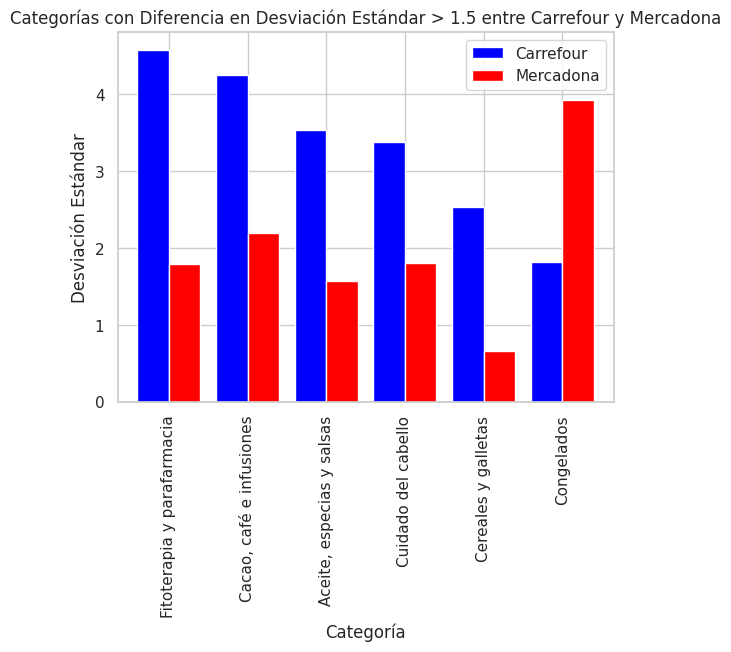

In [ ]:
plt.figure(figsize=(14, 10))
filtrados.set_index('Categoria')[['std_Carrefour', 'std_Mercadona']].plot(kind='bar', color=['blue', 'red'], width=0.8)
plt.xlabel('Categoría')
plt.ylabel('Desviación Estándar')
plt.title('Categorías con Diferencia en Desviación Estándar > 1.5 entre Carrefour y Mercadona')
plt.xticks(rotation=90)
plt.legend(['Carrefour', 'Mercadona'])
plt.show()

De normal los productos de mercadona son más bajos, excepto en la categoria de congelados

In [ ]:
file_path = '/content/Supermercado_final_17072024.xlsx'
data = pd.read_excel(file_path)

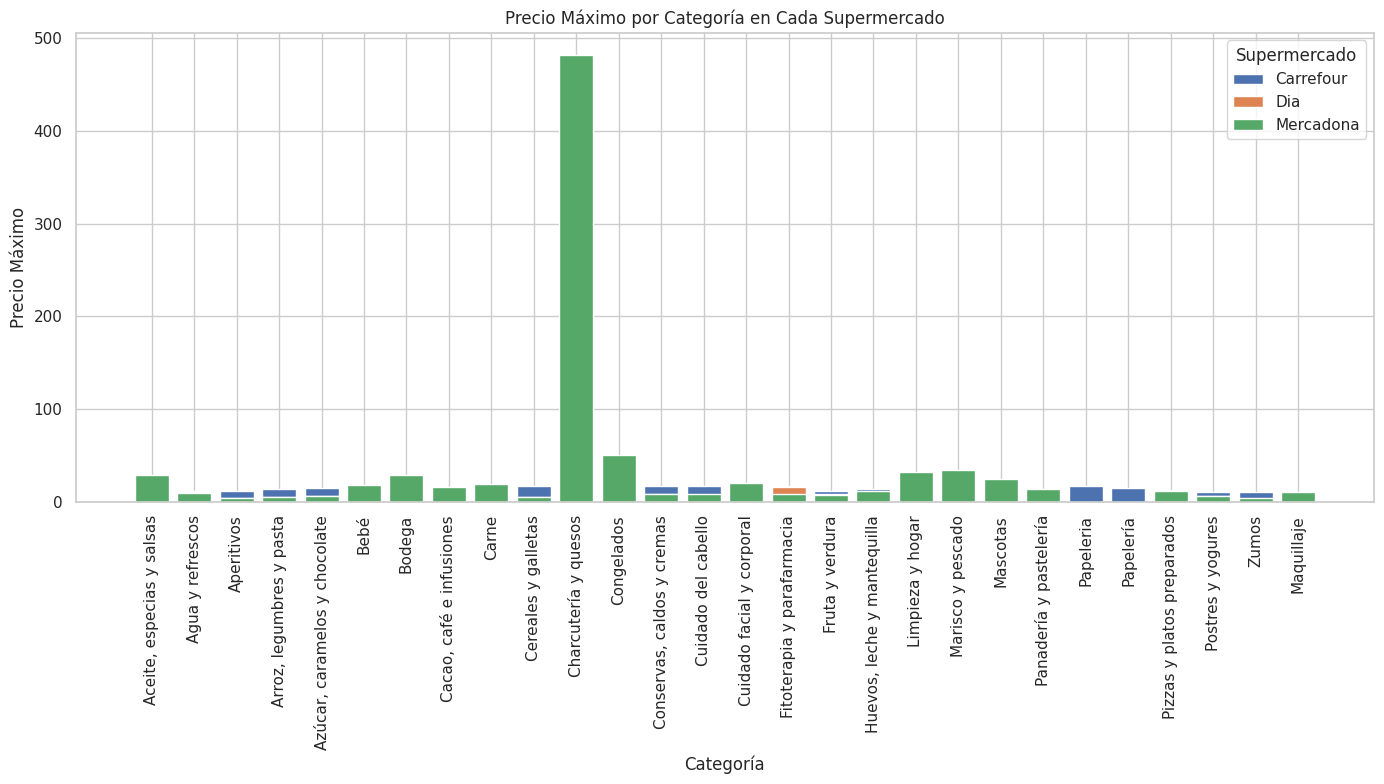

In [ ]:
# Agrupar por 'Supermercado' y 'Categoria' y obtener el valor máximo para 'Precio'
max_price_per_category = data.groupby(['Supermercado', 'Categoria'])['Precio'].max().reset_index()

# Código para generar el gráfico
plt.figure(figsize=(14, 8))

# Iterar a través de cada supermercado y graficar los datos
for supermarket in max_price_per_category['Supermercado'].unique():
    subset = max_price_per_category[max_price_per_category['Supermercado'] == supermarket]
    plt.bar(subset['Categoria'], subset['Precio'], label=supermarket)

# Configurar etiquetas y título del gráfico
plt.xlabel('Categoría')
plt.ylabel('Precio Máximo')
plt.title('Precio Máximo por Categoría en Cada Supermercado')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(title='Supermercado')  # Agregar leyenda con título
plt.tight_layout()  # Ajustar el diseño del gráfico para que no se corten las etiquetas

# Mostrar el gráfico
plt.show()

Si utilizamos el gráfico con los outlayers, podemos observar que el valor que sobresale es el Jamon de Bellota, que ya sabiamos

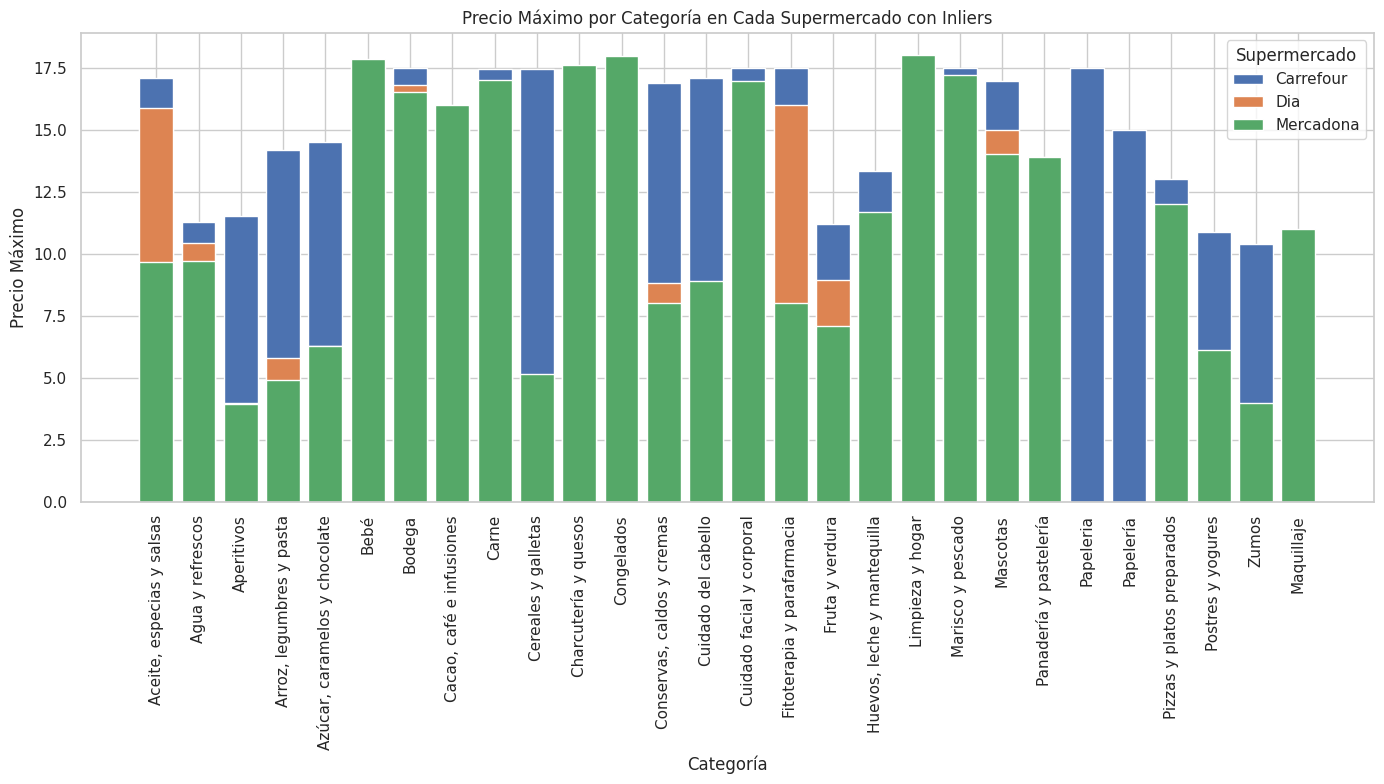

In [ ]:
max_price_per_category = df_inliers.groupby(['Supermercado', 'Categoria'])['Precio'].max().reset_index()

plt.figure(figsize=(14, 8))

# Iterar a través de cada supermercado y graficar los datos
for supermarket in max_price_per_category['Supermercado'].unique():
    subset = max_price_per_category[max_price_per_category['Supermercado'] == supermarket]
    plt.bar(subset['Categoria'], subset['Precio'], label=supermarket)

plt.xlabel('Categoría')
plt.ylabel('Precio Máximo')
plt.title('Precio Máximo por Categoría en Cada Supermercado con Inliers')
plt.xticks(rotation=90)
plt.legend(title='Supermercado')
plt.tight_layout()


plt.show()

Si filtramos por los inliers, nos salen dos

In [ ]:
max_diff = boxplot_stats_supermercado.groupby('Categoria')['mean'].max() - boxplot_stats_supermercado.groupby('Categoria')['mean'].min()
significant_diffs = max_diff[max_diff > max_diff.mean()]
print(significant_diffs)

Categoria
Aceite, especias y salsas     2.167361
Bebé                          2.271390
Bodega                        2.944562
Cacao, café e infusiones      3.293505
Cereales y galletas           2.067493
Charcutería y quesos          1.900066
Congelados                    2.212251
Cuidado del cabello           2.135104
Cuidado facial y corporal     2.620824
Fitoterapia y parafarmacia    5.199880
Limpieza y hogar              2.200224
Marisco y pescado             2.745090
Mascotas                      2.322650
Name: mean, dtype: float64


In [ ]:
significant_diffs_sorted = significant_diffs.sort_values(ascending=False)
significant_diffs_sorted

Categoria
Fitoterapia y parafarmacia    5.199880
Cacao, café e infusiones      3.293505
Bodega                        2.944562
Marisco y pescado             2.745090
Cuidado facial y corporal     2.620824
Mascotas                      2.322650
Bebé                          2.271390
Congelados                    2.212251
Limpieza y hogar              2.200224
Aceite, especias y salsas     2.167361
Cuidado del cabello           2.135104
Cereales y galletas           2.067493
Charcutería y quesos          1.900066
Name: mean, dtype: float64

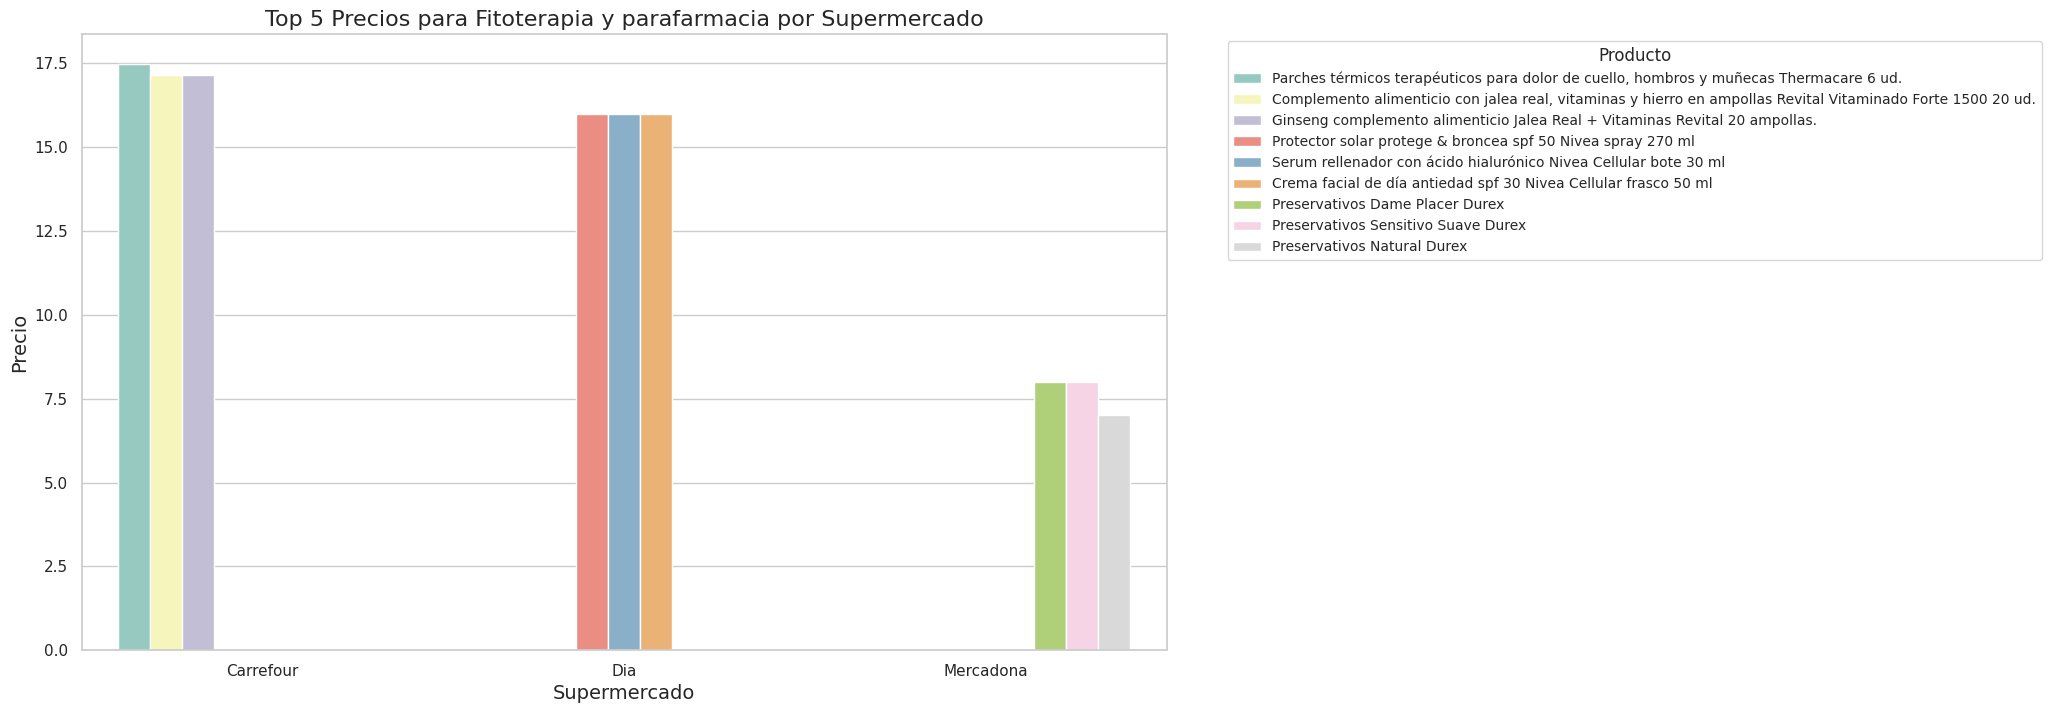

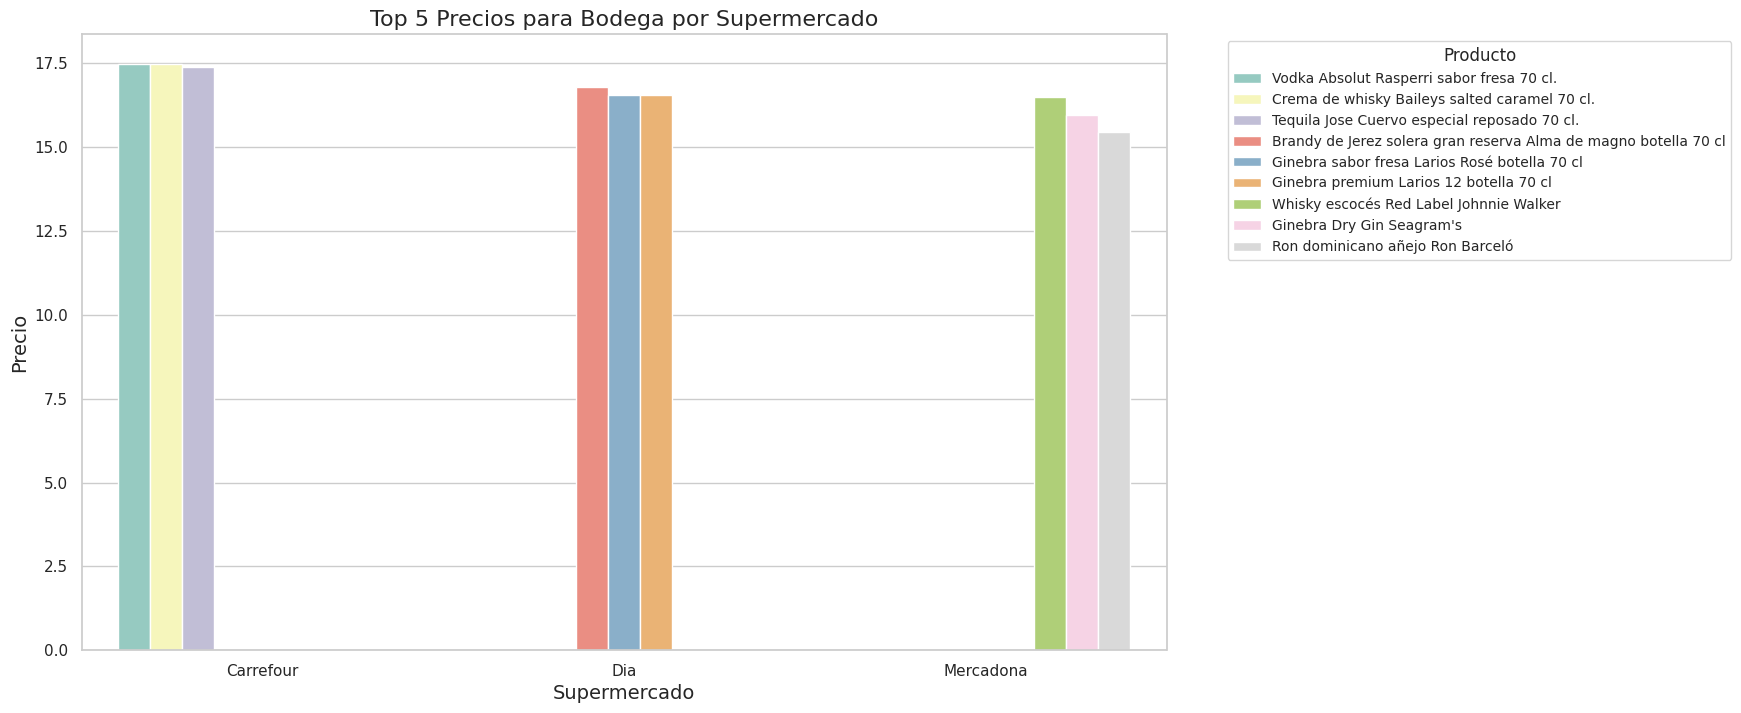

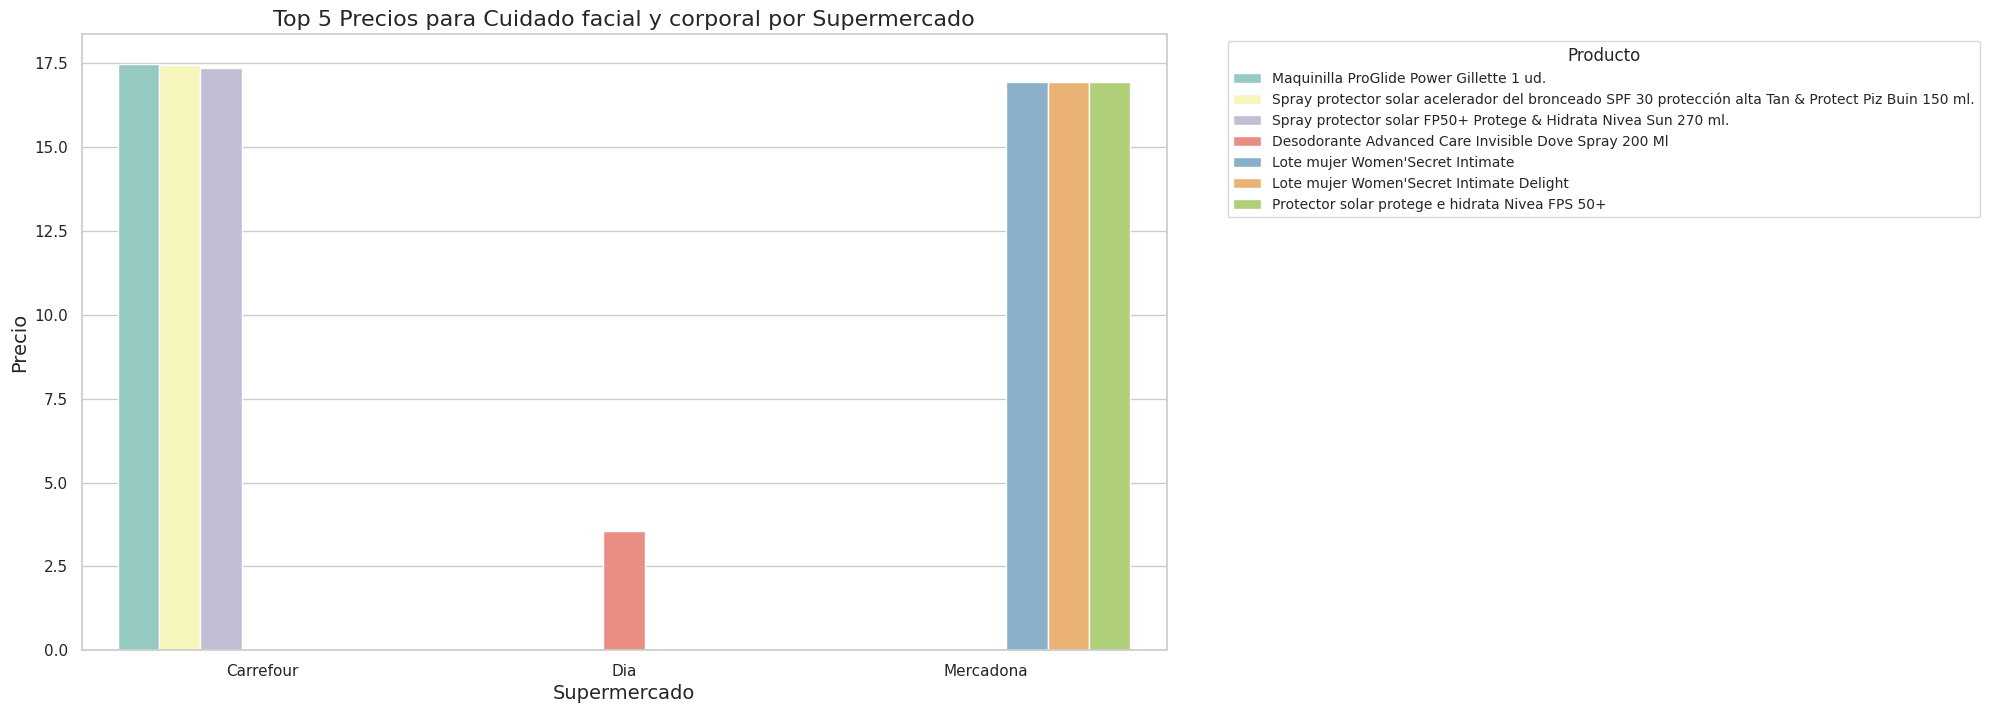

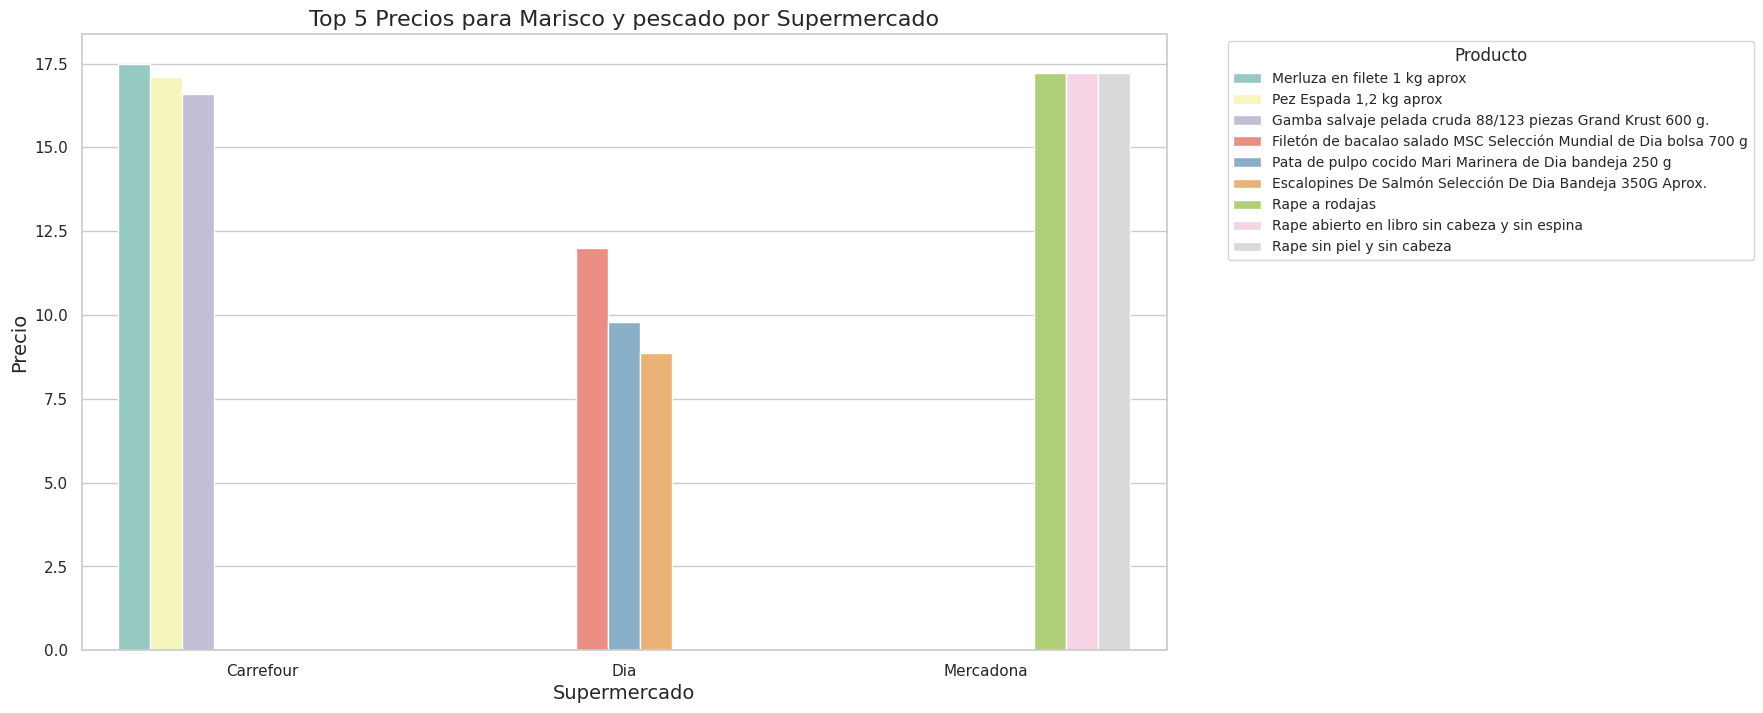

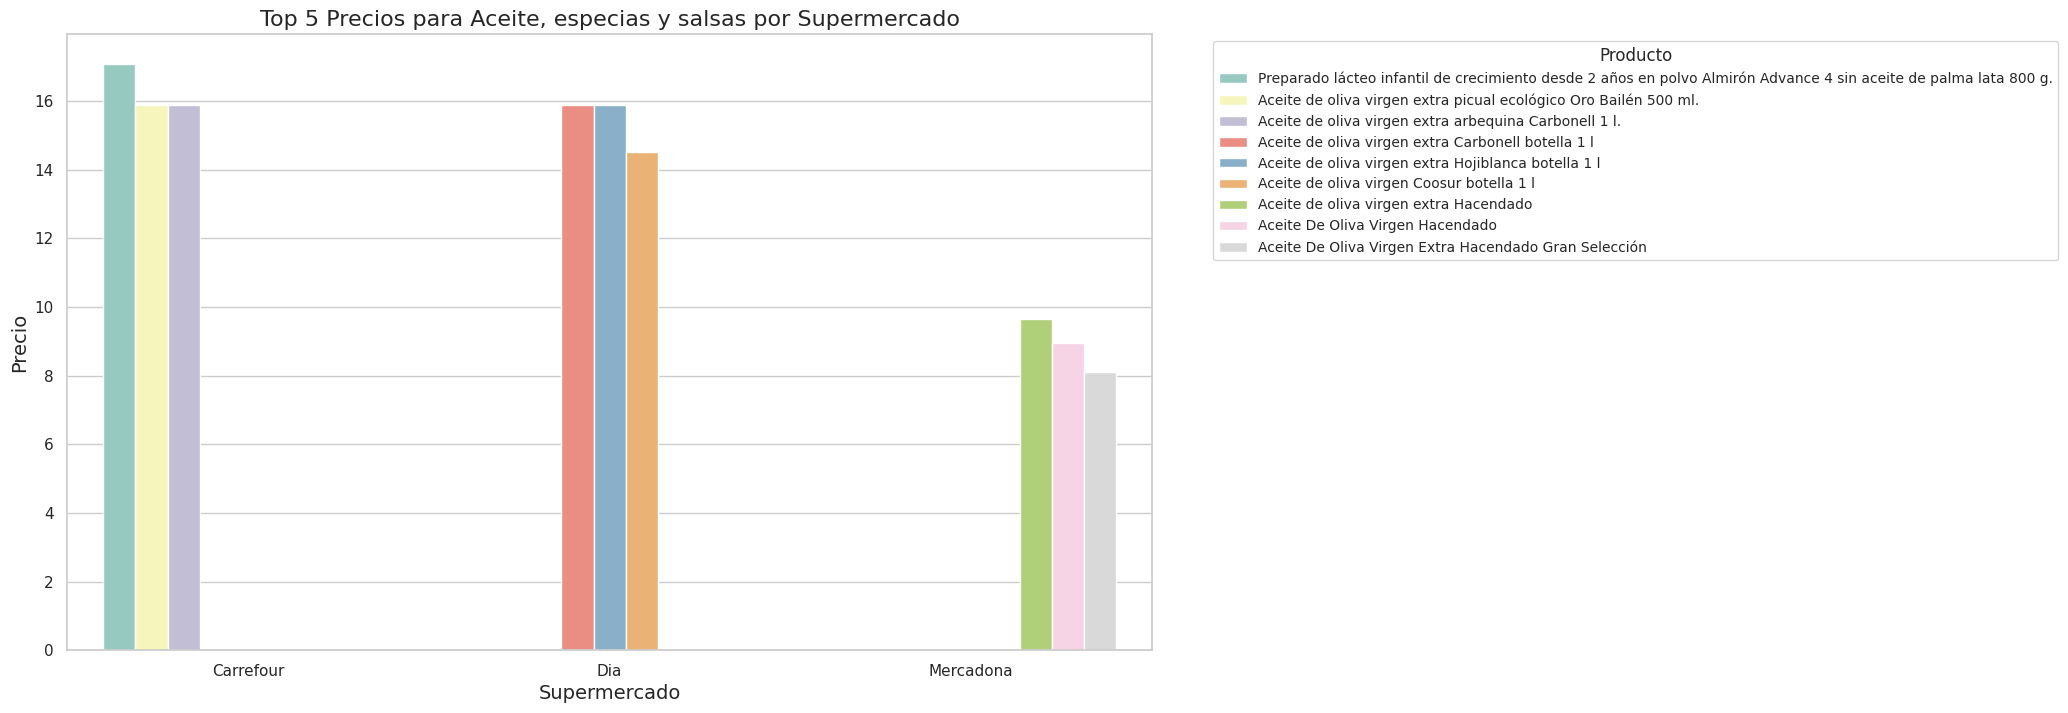

In [ ]:
def top5_by_category(df, category):
    category_df = df[df['Categoria'] == category]
    top3 = category_df.groupby('Supermercado').apply(lambda x: x.nlargest(3, 'Precio')).reset_index(drop=True)
    return top3

categories = ['Fitoterapia y parafarmacia','Bodega', 'Cuidado facial y corporal', 'Marisco y pescado', 'Aceite, especias y salsas']

top5_dfs = {category: top5_by_category(df_inliers, category) for category in categories}

sns.set(style="whitegrid")

for category, top5_df in top5_dfs.items():
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Supermercado', y='Precio', hue='Nombre', data=top5_df, dodge=True, palette='Set3')
    plt.title(f'Top 5 Precios para {category} por Supermercado', fontsize=16)
    plt.xlabel('Supermercado', fontsize=14)
    plt.ylabel('Precio', fontsize=14)
    plt.legend(title='Producto', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

En este caso hemos utilizado la media que no es represetativa.

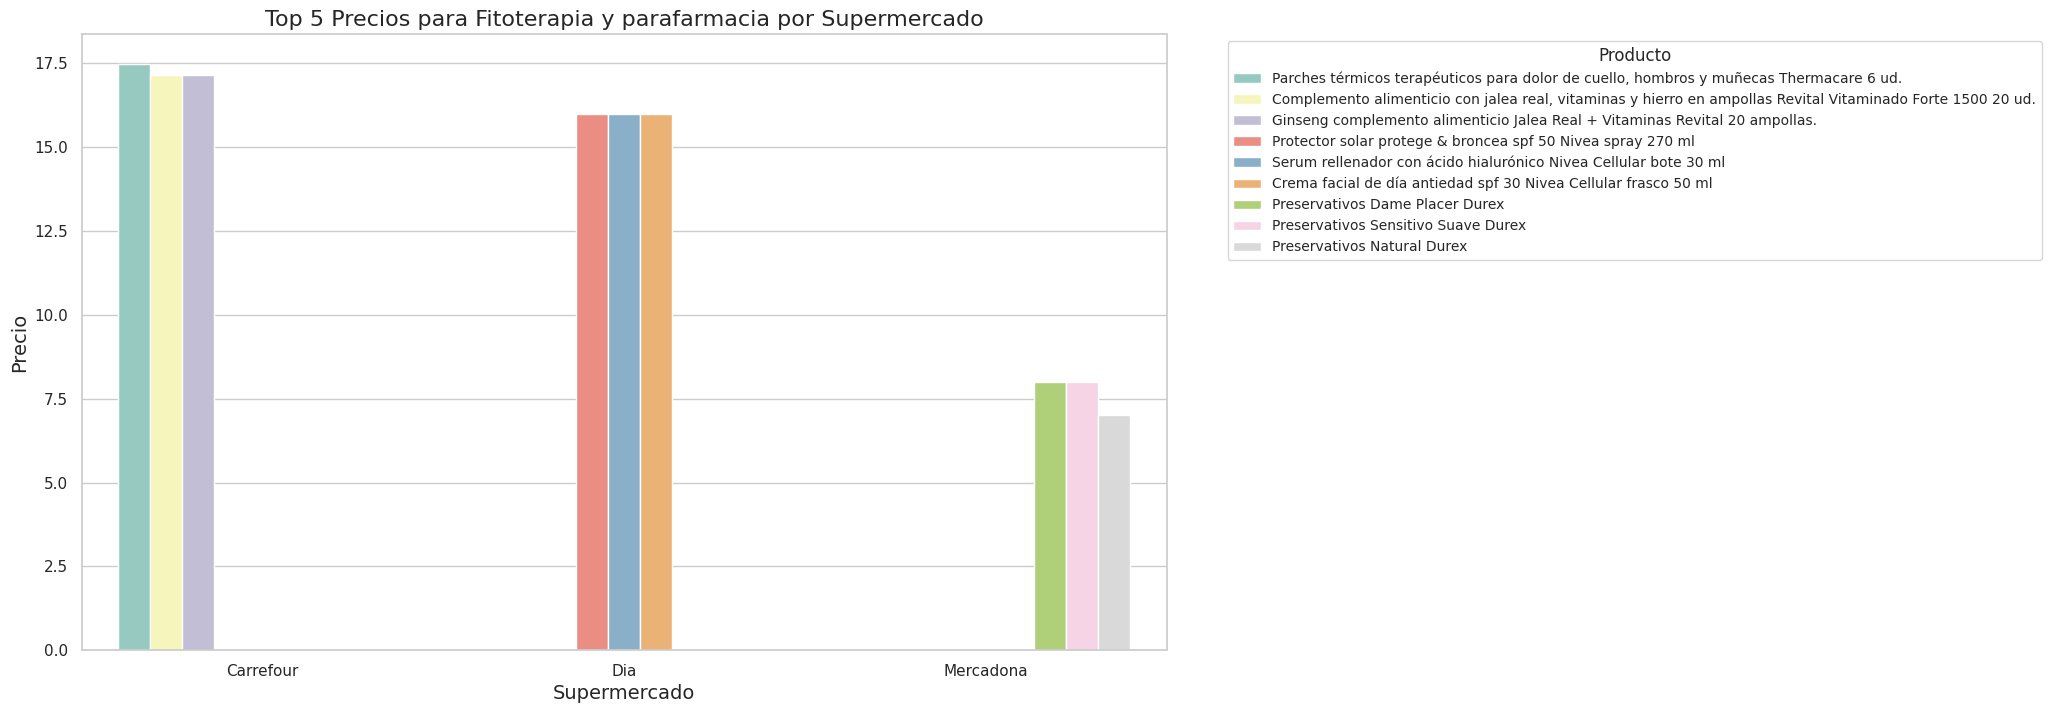

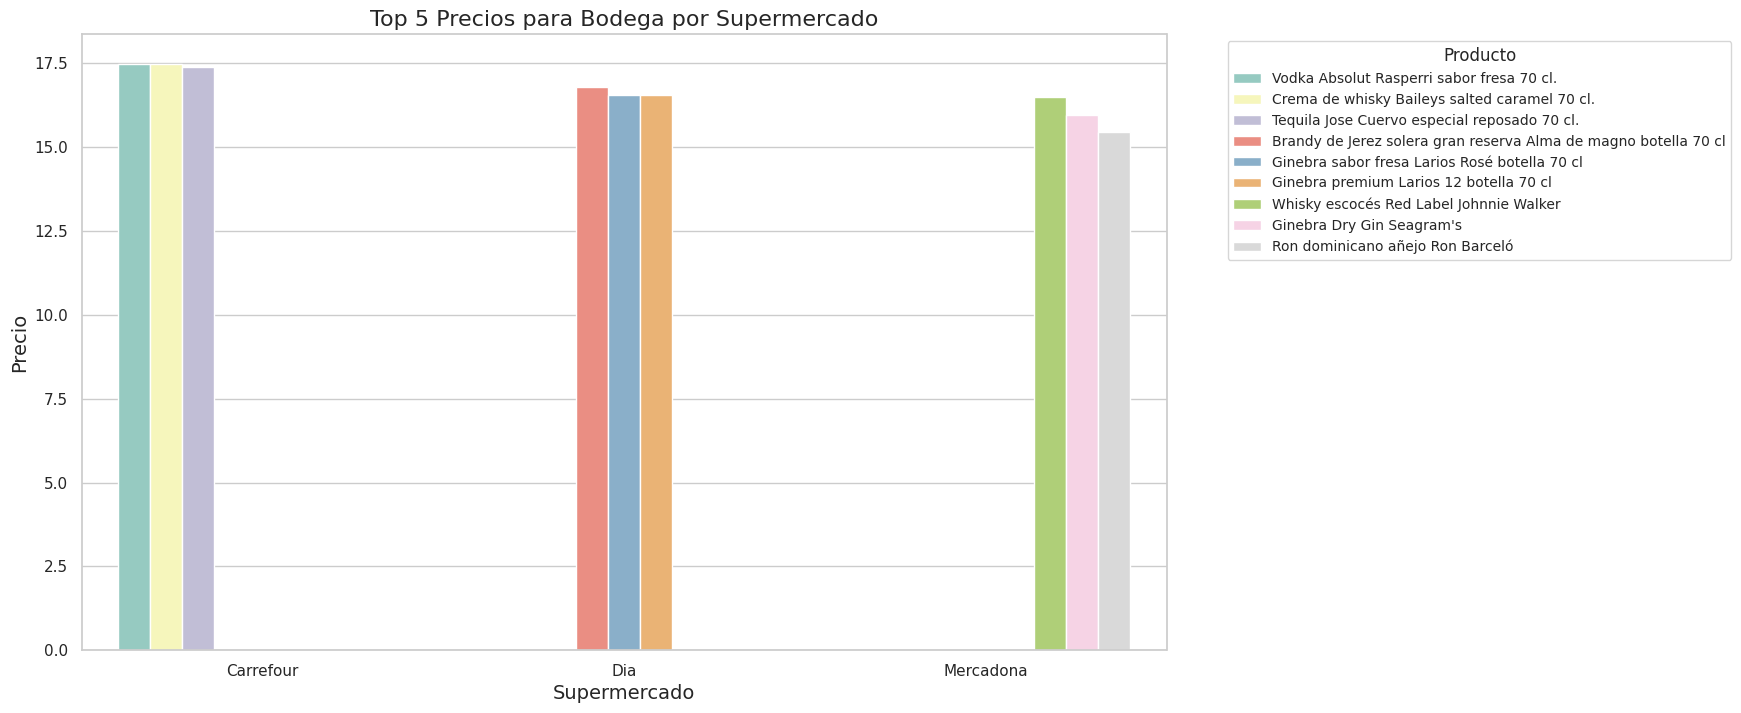

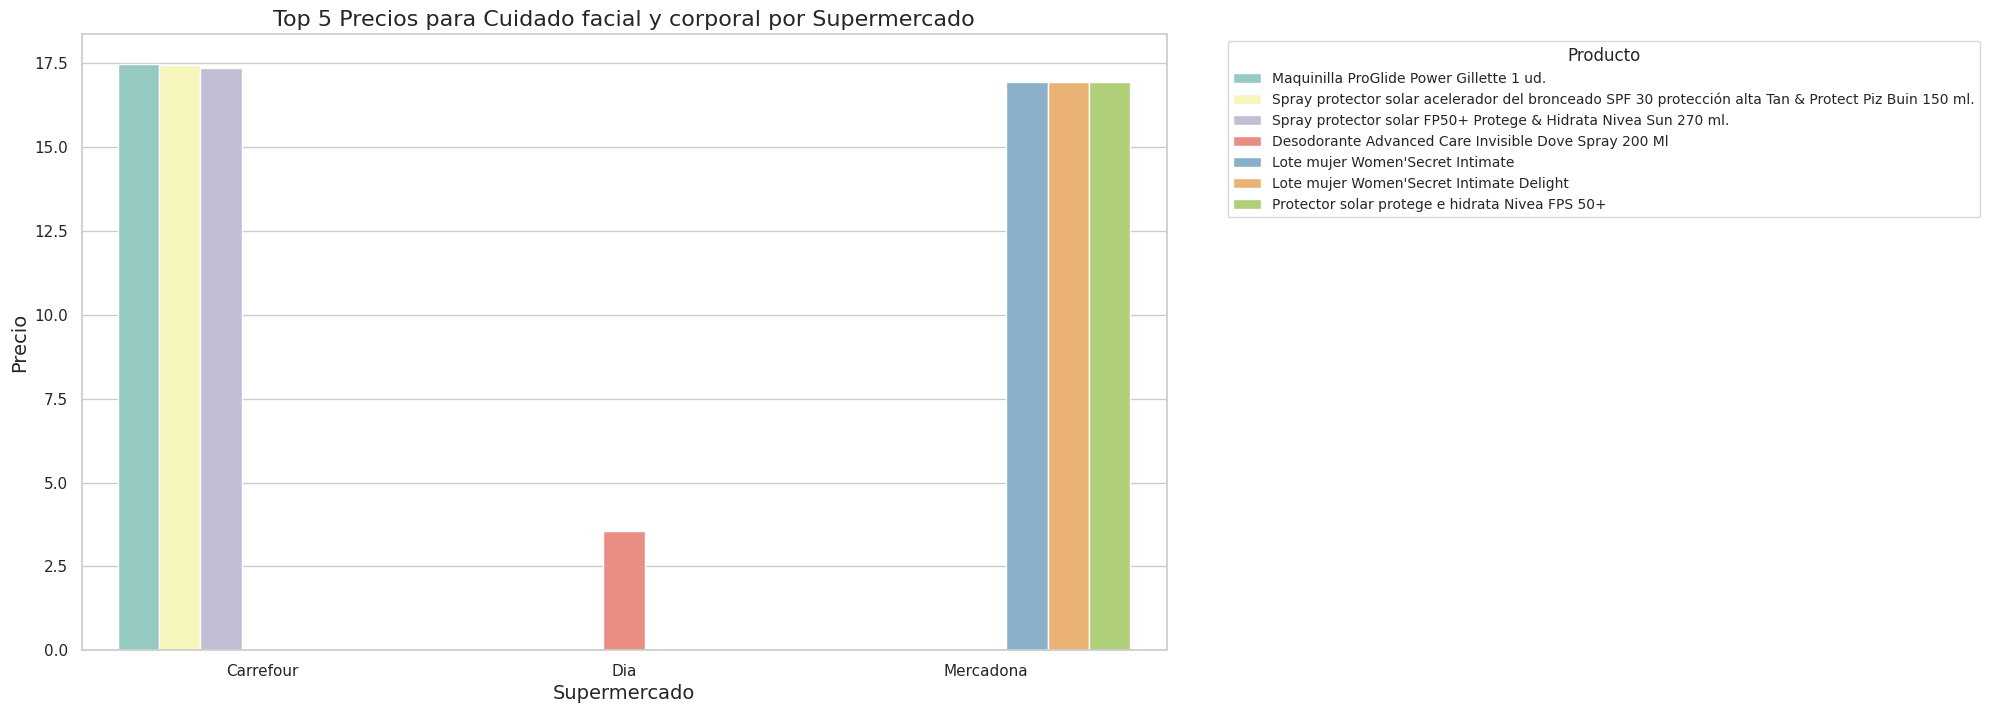

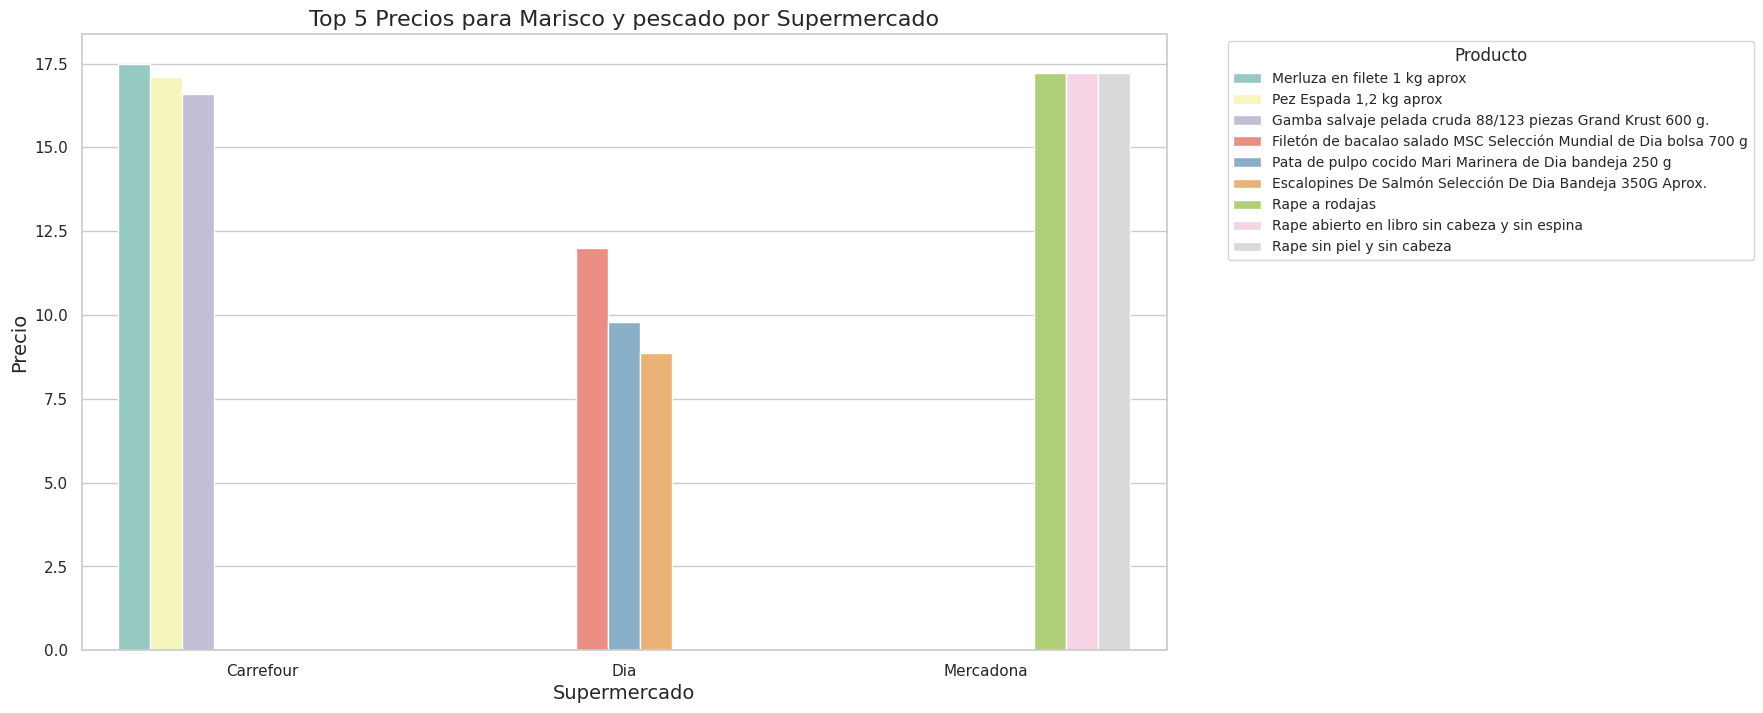

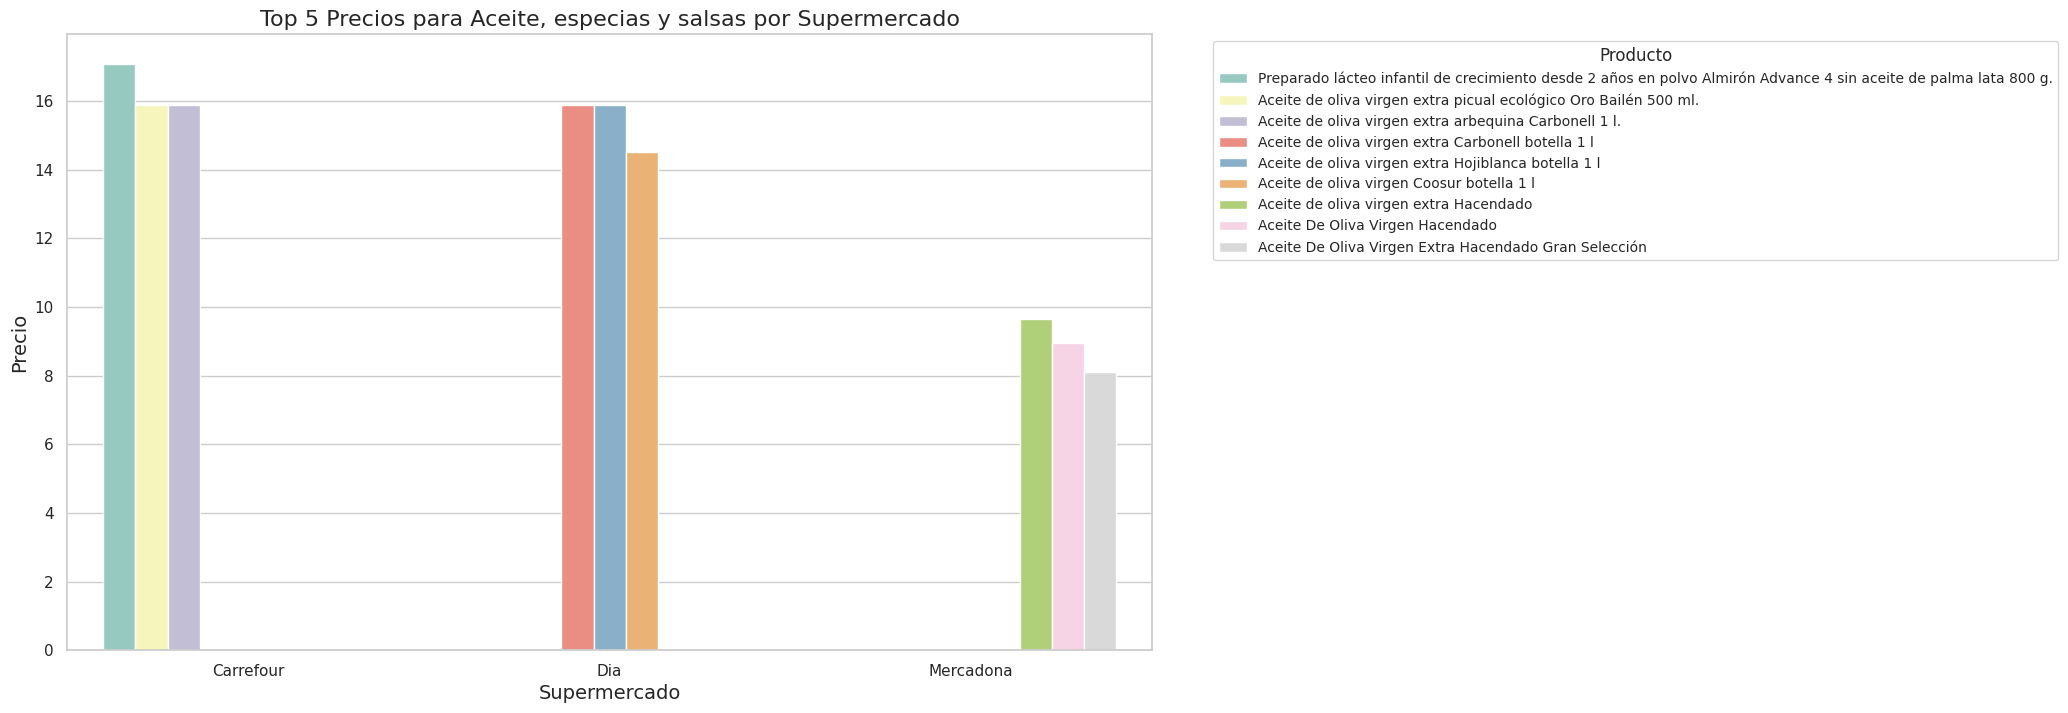

In [ ]:
def top5_by_category(df, category):
    category_df = df[df['Categoria'] == category]
    top3 = category_df.groupby('Supermercado').apply(lambda x: x.nlargest(3, 'Precio')).reset_index(drop=True)
    return top3

categories = ['Fitoterapia y parafarmacia','Bodega', 'Cuidado facial y corporal', 'Marisco y pescado', 'Aceite, especias y salsas']

top5_dfs = {category: top5_by_category(df_inliers, category) for category in categories}

sns.set(style="whitegrid")

for category, top5_df in top5_dfs.items():
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Supermercado', y='Precio', hue='Nombre', data=top5_df, dodge=True, palette='Set3')
    plt.title(f'Top 5 Precios para {category} por Supermercado', fontsize=16)
    plt.xlabel('Supermercado', fontsize=14)
    plt.ylabel('Precio', fontsize=14)
    plt.legend(title='Producto', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

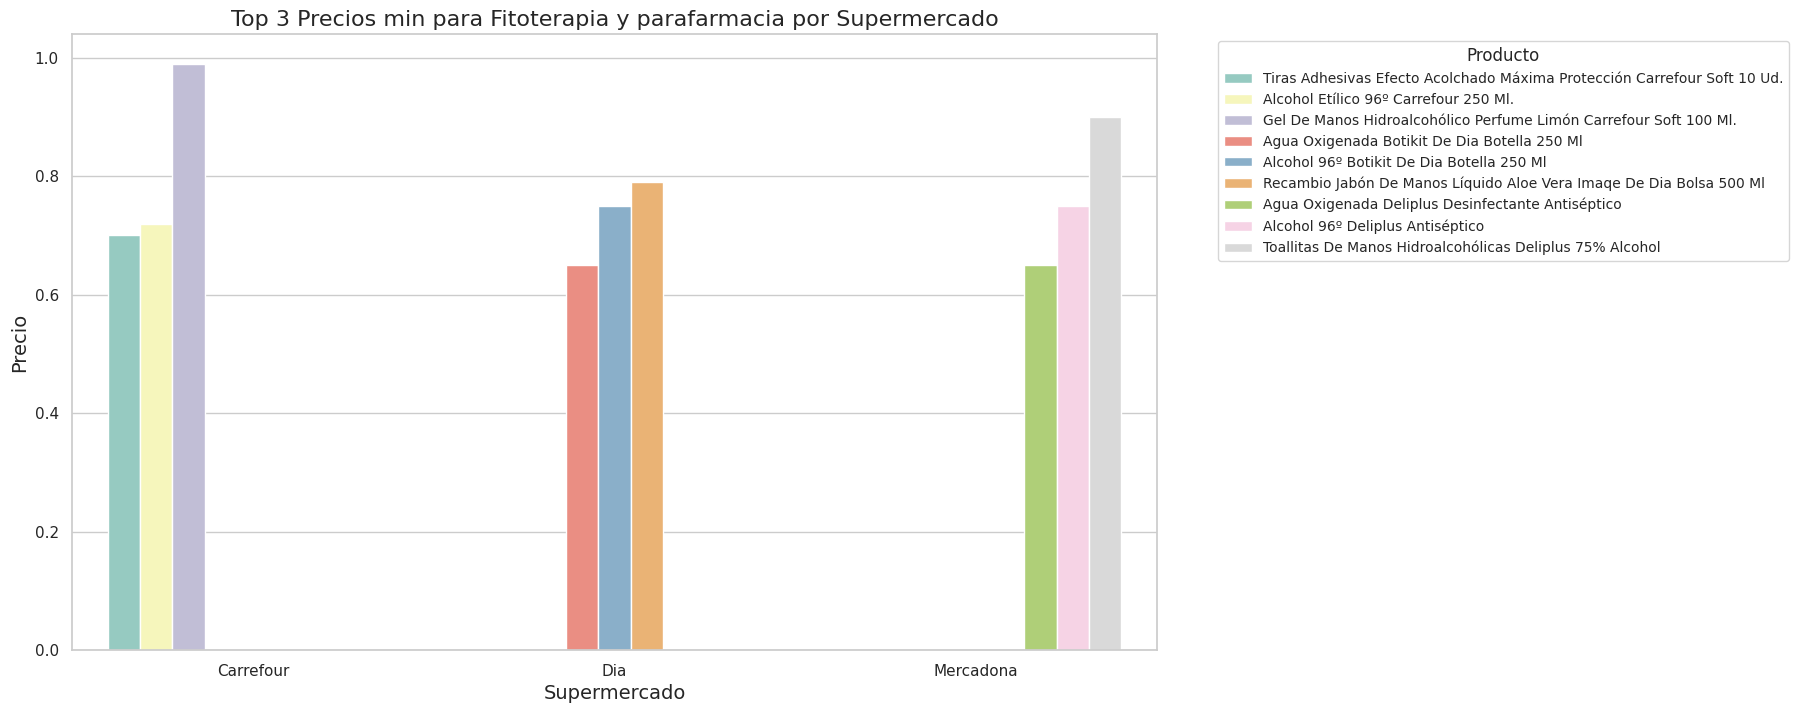

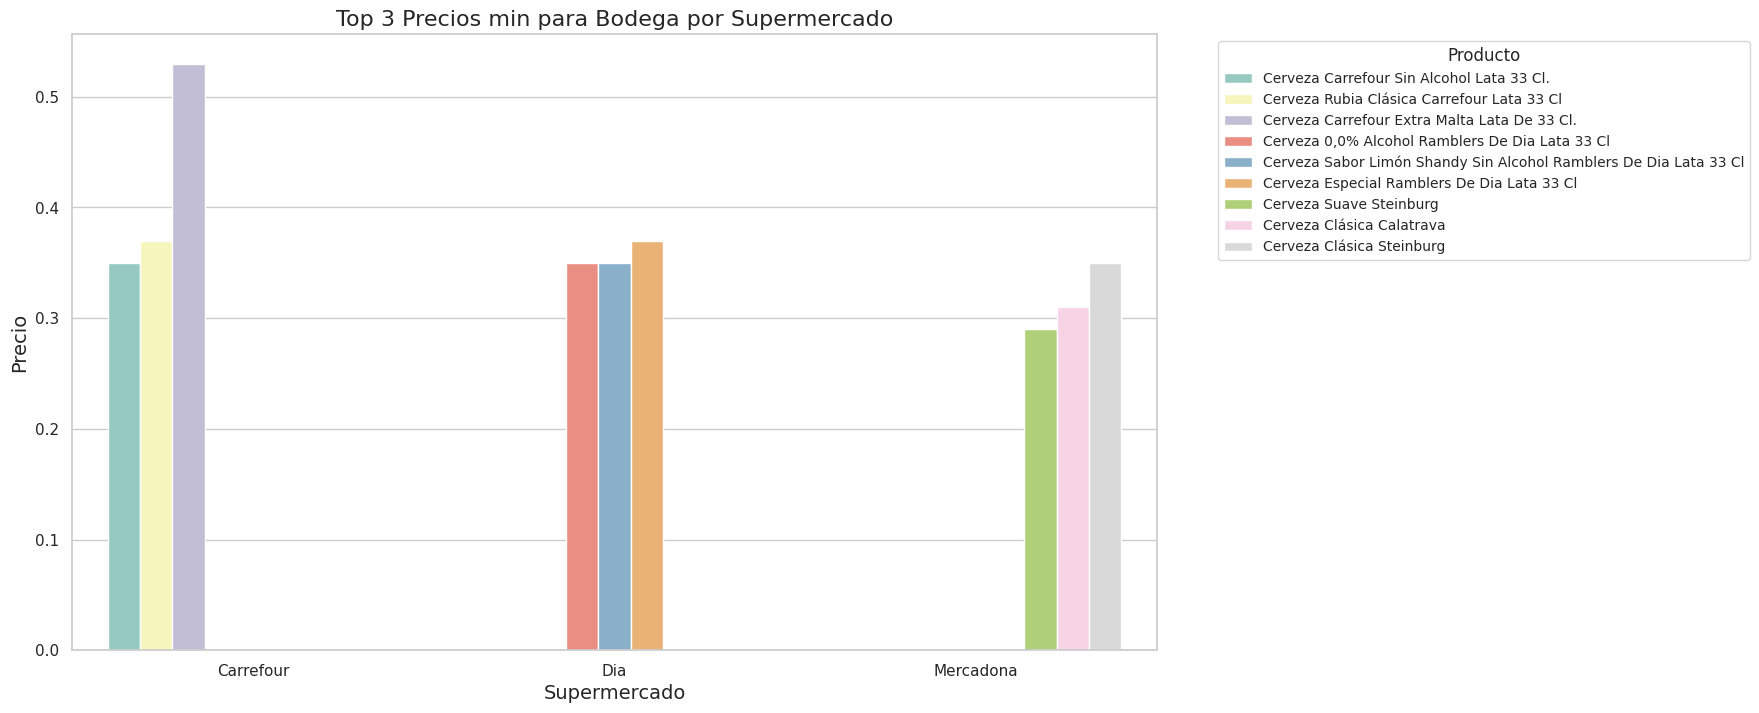

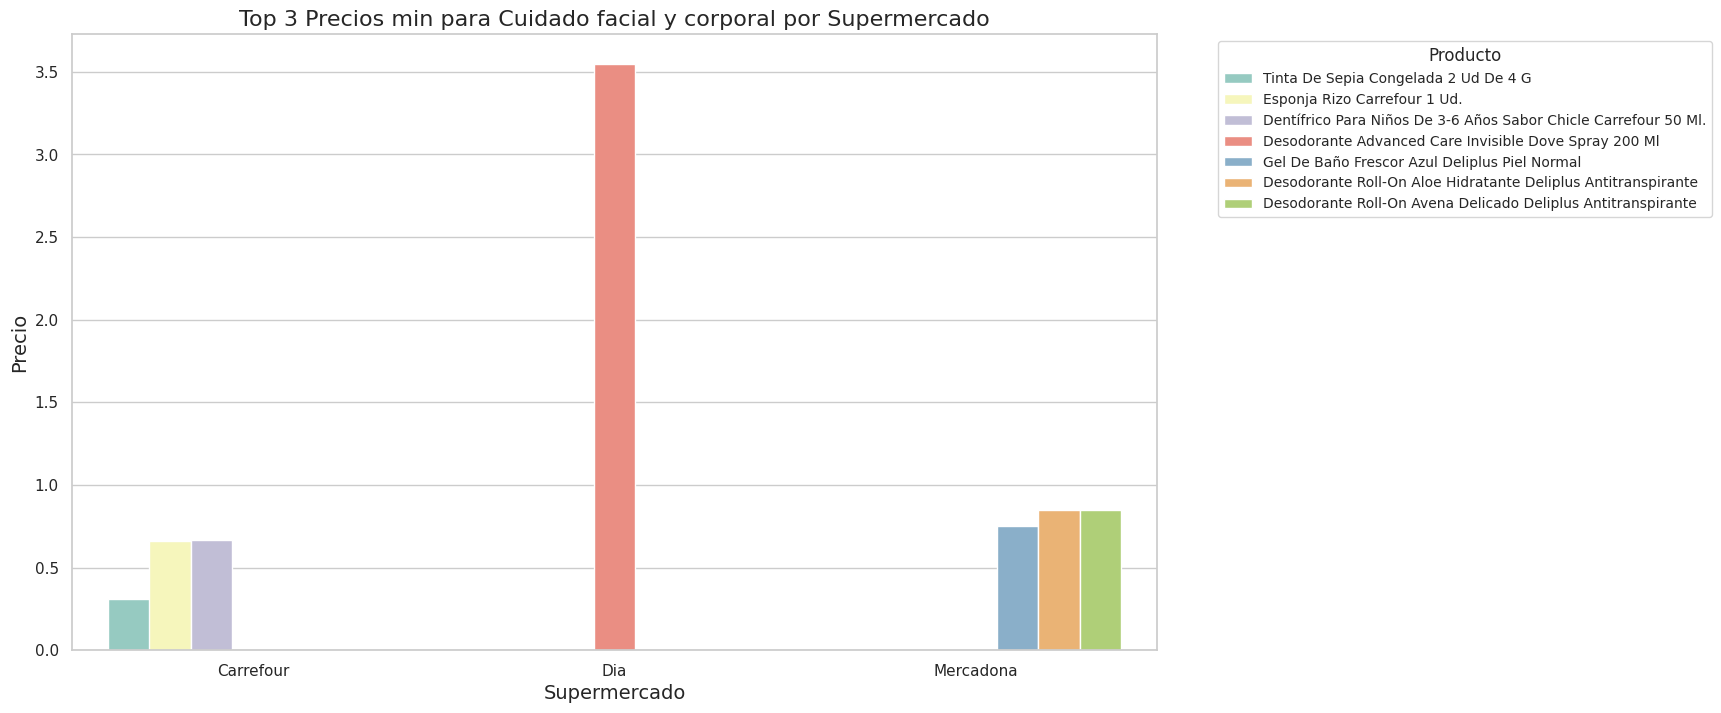

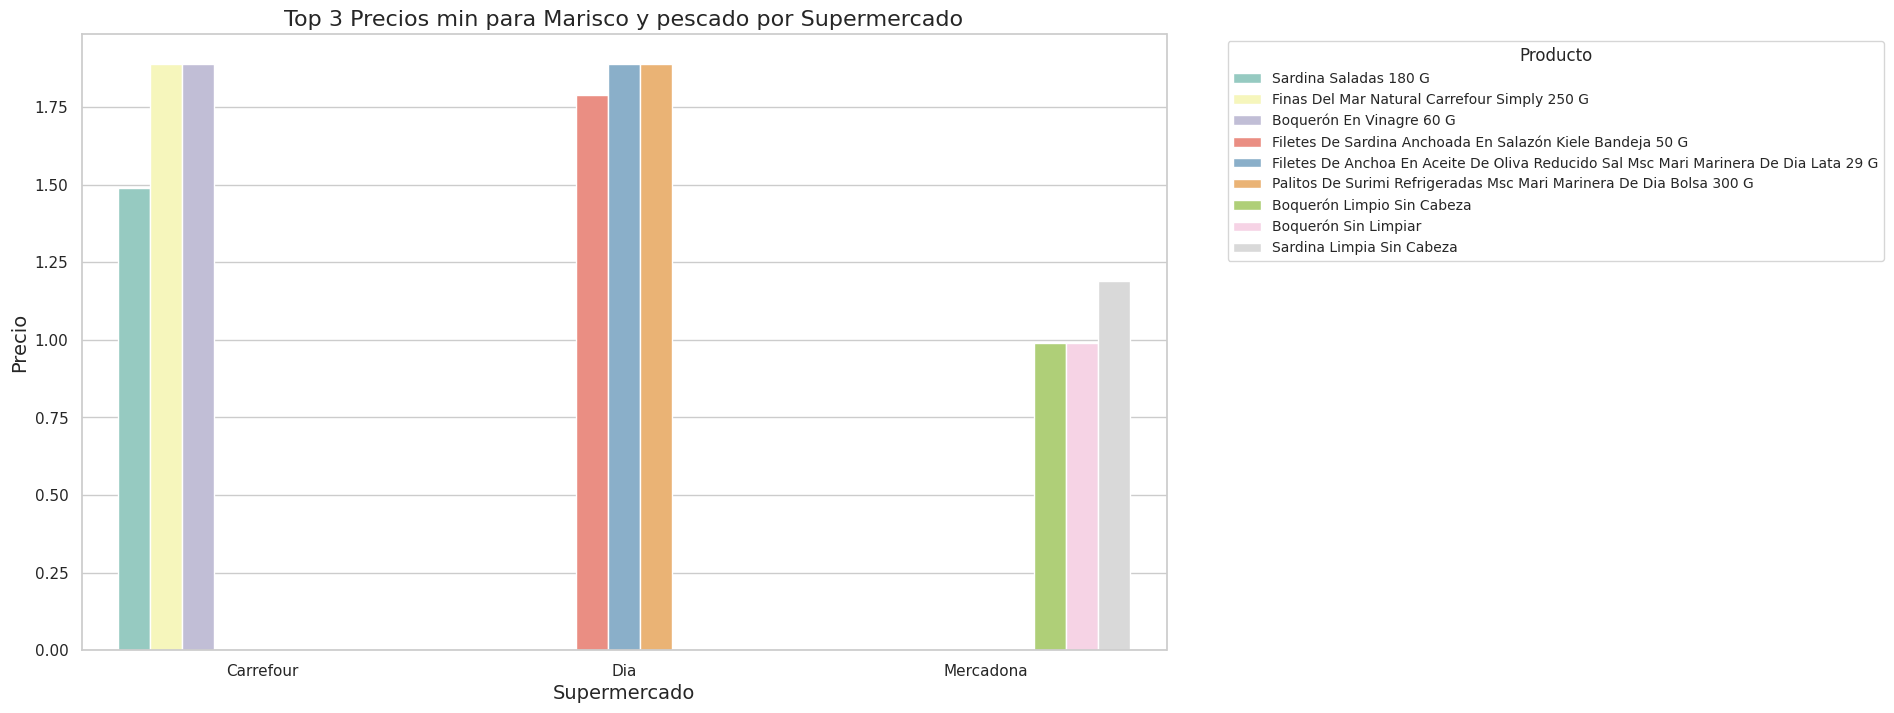

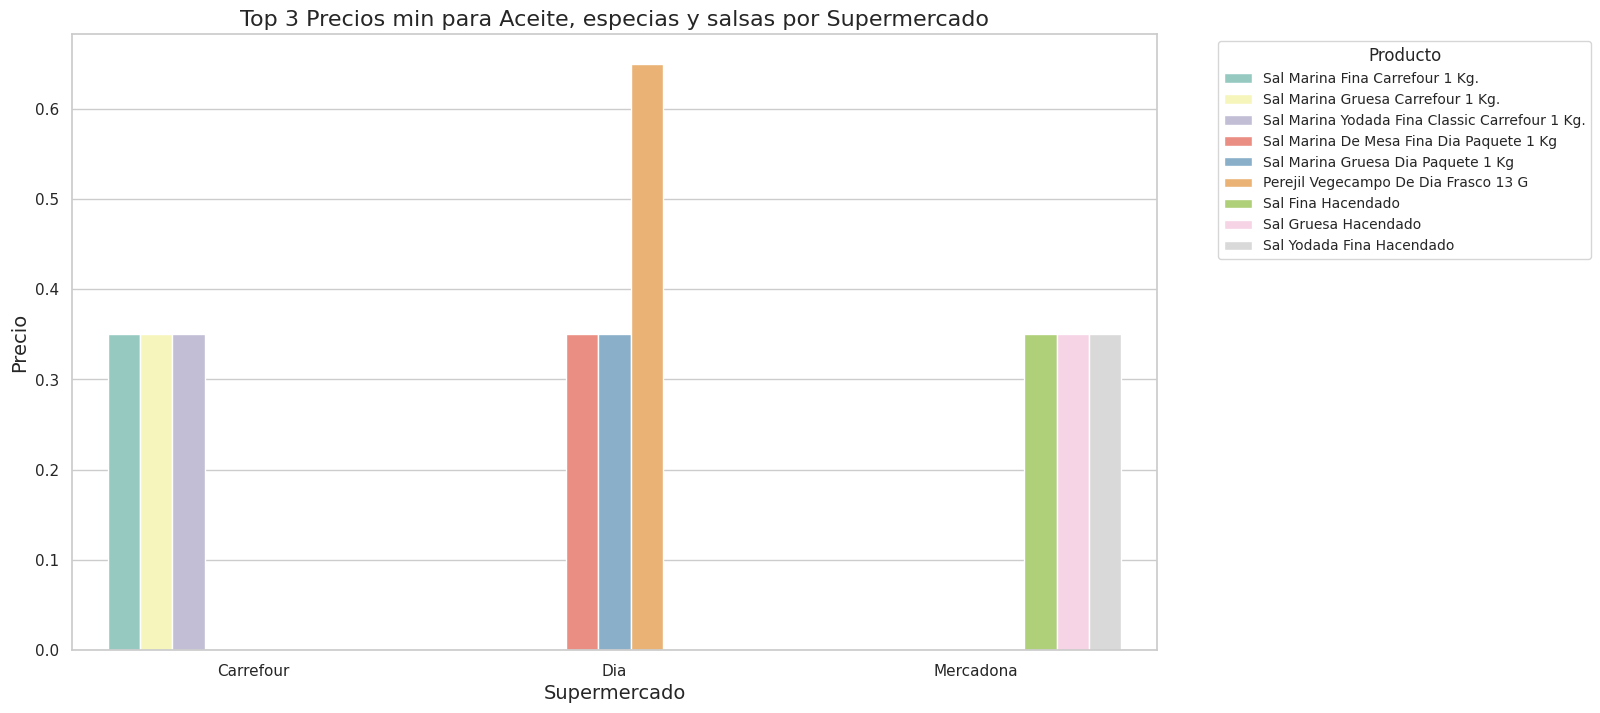

In [ ]:
def top3_by_category(df, category):
    category_df = df[df['Categoria'] == category]
    top3 = category_df.groupby('Supermercado').apply(lambda x: x.nsmallest(3, 'Precio')).reset_index(drop=True)
    return top3

categories = ['Fitoterapia y parafarmacia','Bodega', 'Cuidado facial y corporal', 'Marisco y pescado', 'Aceite, especias y salsas']

top3_dfs = {category: top3_by_category(df_inliers, category) for category in categories}

sns.set(style="whitegrid")

for category, top3_df in top3_dfs.items():
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Supermercado', y='Precio', hue='Nombre', data=top3_df, dodge=True, palette='Set3')
    plt.title(f'Top 3 Precios min para {category} por Supermercado', fontsize=16)
    plt.xlabel('Supermercado', fontsize=14)
    plt.ylabel('Precio', fontsize=14)
    plt.legend(title='Producto', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

7.	¿Cuántas marcas blancas tiene mi competencia? ¿Estamos mejor o peor posicionados según precio y variedad?

In [ ]:
# Filtramos el DataFrame para obtener solo las filas donde "Tipo de Marca" es "BLANCA"
df_filtro_marcas_blancas = Supermercados_sin_outliers.loc[df_supermercados["Tipo de Marca"] == "BLANCA"]

# Obtenemos las marcas únicas dentro del DataFrame filtrado
nombre_marcas_blancas = df_filtro_marcas_blancas["Marca"].unique()
nombre_marcas_blancas

array(['Hacendado', 'Dia', 'Dia Selección Mundial', 'Deliplus',
       'Carrefour', 'Nuestra Tierra Carrefour', 'Ecocesta Carrefour',
       'Mi Menú Carrefour', 'Compy', 'Dia Nuestra Alacena',
       'Bosque Verde', 'Listo Para Comer', 'Dia Galleteca', 'Mercadona'],
      dtype=object)

In [ ]:
# Creamos el Dataframe que nos calcule la cantidad de marcas blancas que hay por categoria en cada supermercado
df_comparacion_marcas_blancas = df_filtro_marcas_blancas.groupby(['Supermercado', 'Categoria']).agg(
    Cantidad_marcas_blancas=('Marca', 'nunique')
).round(2).reset_index()
df_comparacion_marcas_blancas

Supermercado                      Categoria  Cantidad_marcas_blancas
0     Carrefour      Aceite, especias y salsas                        3
1     Carrefour               Agua y refrescos                        1
2     Carrefour                     Aperitivos                        3
3     Carrefour       Arroz, legumbres y pasta                        4
4     Carrefour  Azúcar, caramelos y chocolate                        2
..          ...                            ...                      ...
71    Mercadona                       Mascotas                        1
72    Mercadona         Panadería y pastelería                        1
73    Mercadona     Pizzas y platos preparados                        2
74    Mercadona              Postres y yogures                        1
75    Mercadona                          Zumos                        1

[76 rows x 3 columns]

In [ ]:
# Creamos el gráfico de barras agrupadas
fig_num_marcas_blancas = px.bar(df_comparacion_marcas_blancas, x="Categoria", y="Cantidad_marcas_blancas", color="Supermercado",
                                    barmode="group", hover_data={"Cantidad_marcas_blancas": True})

# Personalizamos el gráfico
fig_num_marcas_blancas.update_layout(
    title="Número de Marcas Blancas por Categoria en cada Supermercado",
    xaxis_title="Categoría",
    yaxis_title="Cantidad_marcas_blancas",
)

# Mostramos el gráfico
fig_num_marcas_blancas.show()


El gráfico de barras nos muestra la cantidad de marcas blancas que tiene cada supermercado en las diferentes categorias. Se puede apreciar que Mercadona utiliza practicamente una marca blanca por categoria para darle renombre y reconocimiento en el mercado. Mientras que Carrefour opta por usar dos o tres marcas blancas más por categoria, exponiendo de esta manera su gran cantidad de variedad de productos.

In [ ]:
df_filtro_marcas_blancas

Nombre  Precio  \
4                 Aceite de oliva virgen extra Hacendado    9.65   
5                       Aceite De Oliva Virgen Hacendado    8.95   
6      Aceite De Oliva Virgen Extra Hacendado Gran Se...    8.10   
7                         Aceite De Oliva 0,4º Hacendado    8.00   
8                           Aceite De Oliva 1º Hacendado    8.00   
...                                                  ...     ...   
21465                            Petit Sabores Hacendado    1.35   
21468  Postre Lácteo Infantil De Cereales Y Miel +12 ...    0.85   
21469  Postre Lácteo Infantil De Fresa Y Plátano Hace...    0.85   
21470  Postre Lácteo Infantil De Galleta Hacendado +8...    0.85   
21471  Postre Lácteo Infantil De Pera Hacendado +8 Meses    0.85   

       Precio_unidad                  Categoria                  Subcategoria  \
4               9.65  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
5               8.95  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
6              10.80  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
7               8.00  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
8               8.00  Aceite, especias y salsas         Aceite, Vinagre Y Sal   
...              ...                        ...                           ...   
21465           1.88          Postres y yogures  Yogures Y Postres Infantiles   
21468           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21469           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21470           8.50          Postres y yogures  Yogures Y Postres Infantiles   
21471           8.50          Postres y yogures  Yogures Y Postres Infantiles   

           Marca Tipo de Marca Unidad Medida Supermercado Precio_Estatus  
4      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
5      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
6      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
7      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
8      Hacendado        BLANCA         LITRO    Mercadona         Inlier  
...          ...           ...           ...          ...            ...  
21465  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21468  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21469  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21470  Hacendado        BLANCA          KILO    Mercadona         Inlier  
21471  Hacendado        BLANCA          KILO    Mercadona         Inlier  

[9074 rows x 10 columns]

In [ ]:
# En cuanto al posicionamiento en precios de las marcas blancas, creamos un dataframe para mostrar el precio medio por marcas blancas en las diferentes categorias y or supermercado.

df_precio_promedio_marcas_blancas = df_filtro_marcas_blancas.groupby(['Supermercado', 'Categoria']).agg(
    Cantidad_marcas_blancas=('Marca', 'nunique'),
    precio_und_promedio=('Precio', 'mean')
).round(2).reset_index()

In [ ]:
df_precio_promedio_marcas_blancas

Supermercado                      Categoria  Cantidad_marcas_blancas  \
0     Carrefour      Aceite, especias y salsas                        3   
1     Carrefour               Agua y refrescos                        1   
2     Carrefour                     Aperitivos                        3   
3     Carrefour       Arroz, legumbres y pasta                        4   
4     Carrefour  Azúcar, caramelos y chocolate                        2   
..          ...                            ...                      ...   
71    Mercadona                       Mascotas                        1   
72    Mercadona         Panadería y pastelería                        1   
73    Mercadona     Pizzas y platos preparados                        2   
74    Mercadona              Postres y yogures                        1   
75    Mercadona                          Zumos                        1   

    precio_und_promedio  
0                  2.81  
1                  1.01  
2                  2.58  
3                  1.85  
4                  2.54  
..                  ...  
71                 4.73  
72                 2.41  
73                 3.26  
74                 1.94  
75                 1.42  

[76 rows x 4 columns]

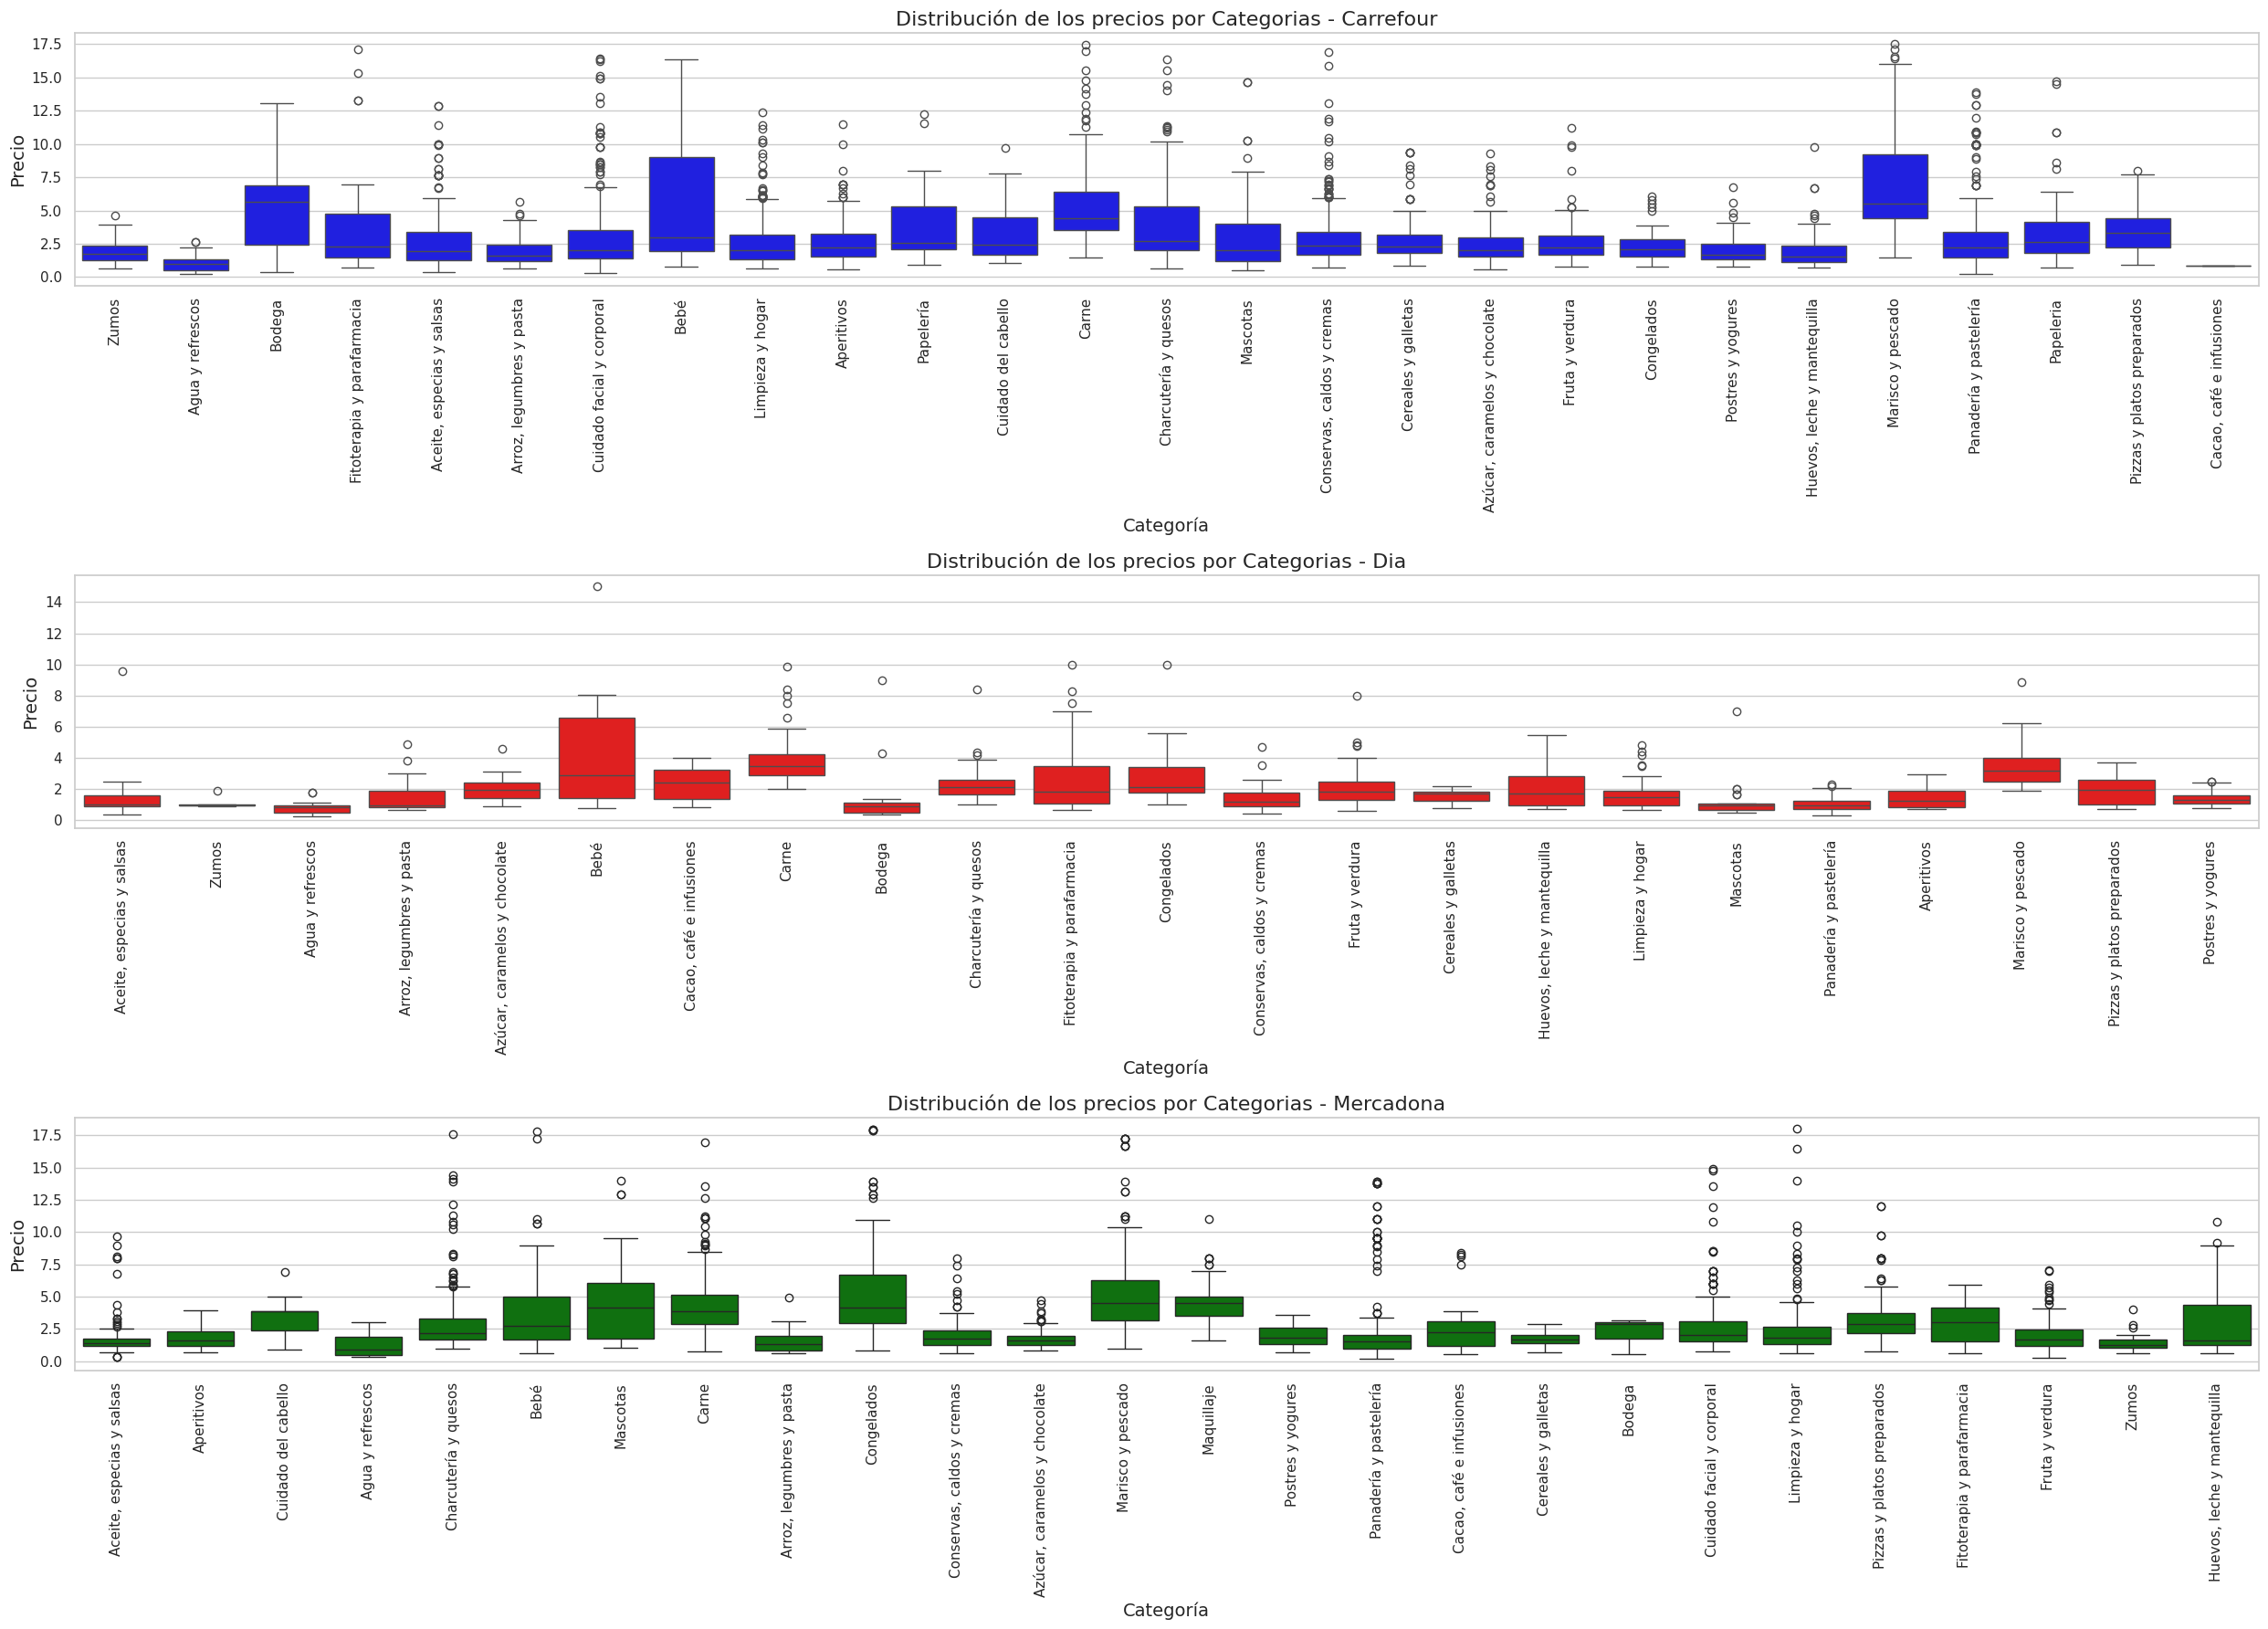

In [ ]:
# Configuramos la gráfica y los ejes con mayor ancho
fig_precio_promedio_marcas_blancas, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 18))

# Crear el boxplot para Carrefour en azul
sns.boxplot(ax=axes[0], x='Categoria', y='Precio', data=df_filtro_marcas_blancas[df_filtro_marcas_blancas['Supermercado'] == "Carrefour"], color='blue')
axes[0].set_title('Distribución de los precios por Categorias - Carrefour', fontsize=16)
axes[0].set_xlabel('Categoría', fontsize=14)
axes[0].set_ylabel('Precio', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# Crear el boxplot para Dia en rojo
sns.boxplot(ax=axes[1], x='Categoria', y='Precio', data=df_filtro_marcas_blancas[df_filtro_marcas_blancas['Supermercado'] == "Dia"], color='red')
axes[1].set_title('Distribución de los precios por Categorias - Dia', fontsize=16)
axes[1].set_xlabel('Categoría', fontsize=14)
axes[1].set_ylabel('Precio', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Crear el boxplot para Mercadona en verde
sns.boxplot(ax=axes[2], x='Categoria', y='Precio', data=df_filtro_marcas_blancas[df_filtro_marcas_blancas['Supermercado'] == "Mercadona"], color='green')
axes[2].set_title('Distribución de los precios por Categorias - Mercadona', fontsize=16)
axes[2].set_xlabel('Categoría', fontsize=14)
axes[2].set_ylabel('Precio', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Una vez mostrados los diferentes gráficos de caja, que representan la variedad de precios de las **marcas blancas** en diferentes categorías, podemos determinar que:

**Mercadona** mantiene por lo general unos precios competitivos teniendo la gran mayroia de sus ofertas por por categorias por debajo de los 5€, siguiendo la tendencia de DIA, de precios competitivos pero con mayor variedad de ofertas lo que se aprecia también los diferentes valores atipicos que se aprecian en la mayoria de categorias, apreciandose de esta manera que dentro de sus marcas blancas también se aprecian unos precios más altos de ciertos productos que se alejan de la media de precios.

**DIA:** Al igual que Mercadona, DIA también sigue una estrategia de distribución de precios uniforme, sin embargo, no presenta tantos productos que se salgan de los cuartiles como Mercadona. Esto podría indicar una menor dispersión de precios en DIA.

**Carrefour:** Carrefour, por otro lado, parece tener una mayor variabilidad en sus precios, con varios valores atípicos, reflejando tanto su media de precios altos como su gran variedad de productos en general en todas las categorias, apreciandose de esta manera que también dispone de gran cantidad de productos en sus marcas blancas al tener también más marcas blancas por lo general por categoria que ambos dos competidores.


8. Hay alguna categoria que quitarias y añadirias

In [ ]:
categoria_supermercado_count = df_inliers.groupby('Categoria')['Supermercado'].nunique().reset_index()

categorias_mas_de_un_supermercado = categoria_supermercado_count[categoria_supermercado_count['Supermercado'] >= 1]

categorias_mas_de_un_supermercado

Categoria  Supermercado
0       Aceite, especias y salsas             3
1                Agua y refrescos             3
2                      Aperitivos             3
3        Arroz, legumbres y pasta             3
4   Azúcar, caramelos y chocolate             3
5                            Bebé             3
6                          Bodega             3
7        Cacao, café e infusiones             3
8                           Carne             3
9             Cereales y galletas             3
10           Charcutería y quesos             3
11                     Congelados             3
12     Conservas, caldos y cremas             3
13            Cuidado del cabello             2
14      Cuidado facial y corporal             3
15     Fitoterapia y parafarmacia             3
16                Fruta y verdura             3
17    Huevos, leche y mantequilla             3
18               Limpieza y hogar             3
19                     Maquillaje             1
20              Marisco y pescado             3
21                       Mascotas             3
22         Panadería y pastelería             3
23                      Papeleria             1
24                      Papelería             1
25     Pizzas y platos preparados             3
26              Postres y yogures             3
27                          Zumos             3

La categoria botiquin,maquillaje,papeleria las quitariamos porque no hay donde comparar

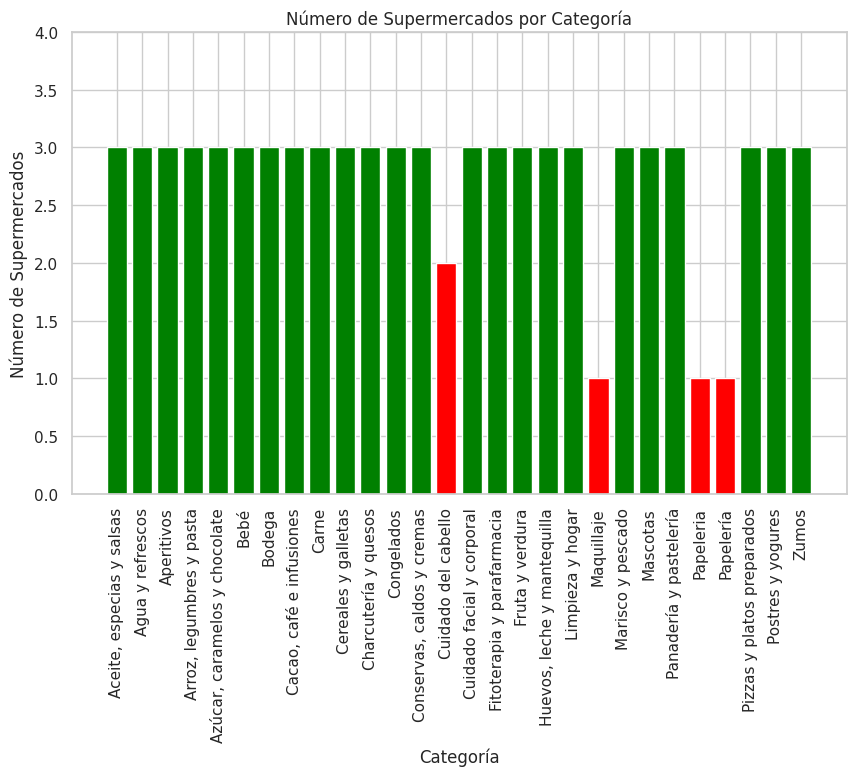

In [ ]:
colors = categorias_mas_de_un_supermercado['Supermercado'].apply(lambda x: 'green' if x > 2 else 'red')
plt.figure(figsize=(10, 6))
plt.bar(categorias_mas_de_un_supermercado['Categoria'], categorias_mas_de_un_supermercado['Supermercado'], color=colors)
plt.xlabel('Categoría')
plt.ylabel('Número de Supermercados')
plt.title('Número de Supermercados por Categoría')
plt.ylim(0, 4)
plt.xticks(rotation=90)
plt.show()

9.	Estamos pensando en abrir una nueva vertical llamada Mercadona eat&go. Su objetivo es que la gente pueda comprar y comer los productos en una sala acondicionada dentro de nuestro establecimiento, Te compartimos un csv con las compras de algunos usuarios en verano. ¿Qué tipo de alimentos recomendarías y por qué?

In [ ]:
# Filtramos primero los meses de verano para ver que productos se venden en verano, tanto de un supermercado como de otro.
df_verano = df_compras[(df_compras['fecha_compra'].dt.month >= 6) & (df_compras['fecha_compra'].dt.month <= 8)]

# Calculamos las ventas de esos productos en los meses de verano
df_max_ventas_productos_verano = df_verano.groupby(['category', 'name']).agg(
    Cantidad_total_vendida=('id_producto', 'count')
).reset_index()

# Realizamos una un nuevo dataframe con la columna Cantidad_total_vendida en orden descendente
df_max_ventas_productos_verano = df_max_ventas_productos_verano.sort_values('Cantidad_total_vendida', ascending=False)

# Seleccionamos los 10 productos más vendidos
top_10_prd_max_ventas = df_max_ventas_productos_verano.head(20)

top_10_prd_max_ventas

category  \
15                   agua_y_refrescos_refresco_de_cola   
17                   agua_y_refrescos_refresco_de_cola   
18                   agua_y_refrescos_refresco_de_cola   
16                   agua_y_refrescos_refresco_de_cola   
0              agua_y_refrescos_isotonico_y_energetico   
13             agua_y_refrescos_isotonico_y_energetico   
12             agua_y_refrescos_isotonico_y_energetico   
10             agua_y_refrescos_isotonico_y_energetico   
19                   agua_y_refrescos_refresco_de_cola   
20                   agua_y_refrescos_refresco_de_cola   
9              agua_y_refrescos_isotonico_y_energetico   
1              agua_y_refrescos_isotonico_y_energetico   
3              agua_y_refrescos_isotonico_y_energetico   
7              agua_y_refrescos_isotonico_y_energetico   
2              agua_y_refrescos_isotonico_y_energetico   
5              agua_y_refrescos_isotonico_y_energetico   
6              agua_y_refrescos_isotonico_y_energetico   
30   alimentacion_caldos_sopas_y_pures_caldo_concen...   
131      desayuno_dulces_y_pan_infusiones_terapeuticas   
117                desayuno_dulces_y_pan_infusiones_te   

                                                name  Cantidad_total_vendida  
15                                Refresco Coca-Cola                    1625  
17                    Refresco Coca-Cola Zero azúcar                    1405  
18                           Refresco cola Hacendado                    1188  
16                      Refresco Coca-Cola Zero Zero                     987  
0                     Bebida energética Energy Drink                     869  
13   Bebida para deportistas sabor cítrico Hacendado                     709  
12                 Bebida isotónica naranja Aquarius                     708  
10             Bebida isotónica de naranja Iso drink                     705  
19               Refresco cola Hacendado Zero azúcar                     689  
20                               Refresco cola Pepsi                     684  
9                    Bebida isotónica blue Iso drink                     493  
1                         Bebida energética Red Bull                     479  
3             Bebida energética energy ultra Monster                     462  
7       Bebida energética sabor guaraná Energy Drink                     447  
2                   Bebida energética energy Monster                     442  
5                    Bebida energética original Burn                     436  
6        Bebida energética sabor cereza Energy Drink                     412  
30   KNORR doble caldo de carne estuche 18 pastillas                     279  
131           HORNIMANS infudren estuche 20 bolsitas                     275  
117       DIA té negro earl grey estuche 25 bolsitas                     265

In [ ]:
import plotly.express as px

fig_ventas_verano = px.bar(top_10_prd_max_ventas.sort_values('Cantidad_total_vendida', ascending=True),
                         y="name", x="Cantidad_total_vendida", orientation='h',
                         title='Cantidad de Productos Vendidos en Verano',
                         labels={'name': 'Nombre del Producto', 'Cantidad_total_vendida': 'Cantidad Vendida'},
                          color_discrete_sequence=['purple'])
fig_ventas_verano.show()

Para la nueva vertical Mercadona eat&go, donde los clientes pueden comprar y consumir productos en un área designada dentro de su establecimiento, sería recomendable ofrecer una variedad de bebidas como refrescos, cervezas y bebidas energéticas, ya que estos son los productos más vendidos durante el verano. Además, sería beneficioso ofrecer aperitivos que se complementen bien con estas bebidas para mejorar la experiencia eat&go.

Es importante tener en cuenta que estos productos son opciones populares durante los meses de verano, por lo que podrían ser bien recibidos por los clientes que buscan refrescos y comidas o aperitivos rápidos. Sin embargo, también sería útil considerar la oferta de productos que son populares durante otras estaciones del año para asegurar una experiencia eat&go atractiva durante todo el año.

Por último, dado que Mercadona eat&go es un concepto donde los clientes consumen los productos dentro del establecimiento, sería recomendable considerar la inclusión de productos que normalmente no se consumen “sobre la marcha”, como platos preparados o productos frescos que se pueden consumir inmediatamente después de la compra. Esto podría diferenciar a Mercadona eat&go de otras ofertas de supermercados y atraer a los clientes que buscan una experiencia de compra y consumo más conveniente y agradable.